In [158]:
import pandas as pd
import numpy as np
import random
# change code cells width
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import seaborn as sns

In [159]:
pd.set_option('display.max_columns', None)

In [160]:
df = pd.read_csv("../data/train.csv")
df

id  id_sreality       street         district  \
0          0    211172956      Konžská         Vokovice   
1          1    211680348  Koperníkova         Židenice   
2          2    221724252     Pekařská           Frýdek   
3          3    216161372   U Mlékárny              NaN   
4          4    216358492    Na křečku  Horní Měcholupy   
...      ...          ...          ...              ...   
48658  48658   4285537372  Horoušanská              NaN   
48659  48659   4285582940    Smetanova              NaN   
48660  48660   4287508060      Pražská              NaN   
48661  48661   4287560796     Filipova           Bystrc   
48662  48662   4291357788    28. října              NaN   

                      county                                address  \
0                    Praha 6            Konžská, Praha 6 - Vokovice   
1                       Brno           Koperníkova, Brno - Židenice   
2              Frýdek-Místek       Pekařská, Frýdek-Místek - Frýdek   
3      Bystřice pod Hostýnem      U Mlékárny, Bystřice pod Hostýnem   
4                   Praha 10  Na křečku, Praha 10 - Horní Měcholupy   
...                      ...                                    ...   
48658               Nehvizdy                  Horoušanská, Nehvizdy   
48659                   Zlín                        Smetanova, Zlín   
48660                 Znojmo                        Pražská, Znojmo   
48661                   Brno                Filipova, Brno - Bystrc   
48662                 Hlučín                      28. října, Hlučín   

      disposition                                        description  \
0             2+1  AKCE =   Stát slíbil, že se nebude platit 4% d...   
1            2+kk  Novostavba luxusního bytu 2+kk s terasou, nová...   
2             3+1  Prodej bytu 3+1 v os. vl., 76 m2, 1.NP, na ul....   
3             3+1  Naše společnost Vám zprostředkuje Nabízíme Vám...   
4             3+1  Ul. Na Křečku, klidné místo sídliště Horní Měc...   
...           ...                                                ...   
48658        1+kk  Prodej malého bytu v Nehvizdech (Praha-Východ)...   
48659        3+kk  Poslední volný byt s vlastní zahradou, včetně ...   
48660         3+1  Nabízíme k prodeji byt  3+1  ve čtvrtém  nadze...   
48661         3+1  Brněnská přehrada je oblíbenou lokalitou pro v...   
48662         3+1  Nabízíme Vám ke koupi byt 3+1 v os. vl. v žáda...   

           price currency        download_date  \
0      5460000.0       Kč  2020-05-21 00:00:00   
1      6740000.0       Kč  2020-10-30 00:00:00   
2      1590000.0       Kč  2020-03-30 00:00:00   
3      2590000.0       Kč  2020-12-27 00:00:00   
4      4790000.0       Kč  2020-06-19 00:00:00   
...          ...      ...                  ...   
48658  1290000.0       Kč  2020-11-27 00:00:00   
48659  4998500.0       Kč  2020-06-08 00:00:00   
48660  2400000.0       Kč  2020-05-31 00:00:00   
48661  4450000.0       Kč  2020-10-30 00:00:00   
48662  2580000.0       Kč  2020-11-11 00:00:00   

                                              price_note structure  \
0      AKCE  garance neplacení daně z nabytí nemovitosti  Panelová   
1                                                    NaN   Cihlová   
2                                                    NaN  Panelová   
3                                         včetně provize   Cihlová   
4                     Přímý majitel-neplatíte provizi RK  Panelová   
...                                                  ...       ...   
48658                                                NaN  Panelová   
48659  za standardní vybavení na klíč, včetně sklepa,...   Cihlová   
48660  včetně poplatků, + provize RK, včetně právního...  Panelová   
48661  Majitel si vyhrazuje právo, prodat nemovitost ...  Panelová   
48662                                                NaN  Panelová   

          building_state ownership  floor  area  area_floor  \
0        Po rekonstrukci    Osobní      5    54        54.0   
1             N

In [161]:
df.isnull().sum()

id                        0
id_sreality               0
street                  723
district              18155
county                    0
address                   0
disposition               0
description               0
price                     0
currency                  0
download_date             0
price_note            24279
structure                 0
building_state            0
ownership                 0
floor                     0
area                      0
area_floor            17116
energy_performance     6307
balcony_exist         35591
balcony               41322
elevator              14704
cellar_exist          16511
cellar                31167
furnished             23932
barrier_free          35157
lodge_exist           37194
lodge                 43349
terace_exist          44737
terace                45788
area_built_up         47862
area_garden           47733
garage_exist          44360
garage                44360
starting_price        48663
flat_type           

In [162]:
def nunique_null_sum(df):
    print(f'Unique valuse {df.unique()}')
    print(f'Unique valuse {df.nunique()}')
    print(f'How many values {df.count()}')
    print(f'How many null {df.isnull().sum()}')

## Czyszczenie danych 

### Badanie


In [163]:
nunique_null_sum(df['id'])


Unique valuse [    0     1     2 ... 48660 48661 48662]
Unique valuse 48663
How many values 48663
How many null 0


In [164]:
nunique_null_sum(df['download_date'])

Unique valuse ['2020-05-21 00:00:00' '2020-10-30 00:00:00' '2020-03-30 00:00:00'
 '2020-12-27 00:00:00' '2020-06-19 00:00:00' '2020-09-02 00:00:00'
 '2020-09-18 00:00:00' '2020-12-22 00:00:00' '2020-04-29 00:00:00'
 '2020-11-27 00:00:00' '2020-06-09 00:00:00' '2020-05-18 00:00:00'
 '2020-04-30 00:00:00' '2020-06-02 00:00:00' '2020-07-08 00:00:00'
 '2020-05-30 00:00:00' '2020-05-08 00:00:00' '2020-05-17 00:00:00'
 '2020-09-15 00:00:00' '2020-11-17 00:00:00' '2020-11-30 00:00:00'
 '2020-08-31 00:00:00' '2020-04-17 00:00:00' '2020-04-27 00:00:00'
 '2020-07-17 00:00:00' '2020-05-28 00:00:00' '2020-07-02 00:00:00'
 '2020-03-25 00:00:00' '2020-12-14 00:00:00' '2020-08-06 00:00:00'
 '2020-06-15 00:00:00' '2020-09-16 00:00:00' '2020-09-10 00:00:00'
 '2020-05-11 00:00:00' '2020-09-14 00:00:00' '2020-06-30 00:00:00'
 '2020-07-28 00:00:00' '2020-12-25 00:00:00' '2020-11-24 00:00:00'
 '2020-09-22 00:00:00' '2020-08-07 00:00:00' '2020-10-05 00:00:00'
 '2020-10-13 00:00:00' '2020-11-12 00:00:00' '20

In [165]:
nunique_null_sum(df['id_sreality'])

Unique valuse [ 211172956  211680348  221724252 ... 4287508060 4287560796 4291357788]
Unique valuse 48663
How many values 48663
How many null 0


In [166]:
nunique_null_sum(df['furnished'])

Unique valuse [nan 'true' 'false' 'Částečně']
Unique valuse 3
How many values 24731
How many null 23932


In [167]:
furnished = {'true': 1,
             'false': 0,
             np.NaN: 0,
             'Částečně': 0.5}

df['furnished'] = df['furnished'].map(furnished)

In [168]:
nunique_null_sum(df['currency'])

Unique valuse ['Kč']
Unique valuse 1
How many values 48663
How many null 0


In [169]:
nunique_null_sum(df['description'])

Unique valuse ['AKCE =   Stát slíbil, že se nebude platit 4% daň z koupě nemovitosti staršího bytu a my to vítáme. Nicméně ještě musí vládní návrh schválit parlament, senát, prezident a úředníci musí připravit metodiku. Kdyby se to kdekoliv zaseklo a daň se nezrušila, my vám garantujeme, že pokud koupíte byt od nás během května  června /podepsaná Rezervační smlouva/, tak za Vás daň uhradíme formou slevy na ceně bytu.\r\n\r\nNabízíme k prodeji cihlový byt 2+1, na ulici Koňžská 4, který bude po kompletní rekonstrukci a připravený k předání dne 4.6.2020. Při rekonstrukci používáme kvalitní materiály. Kompletní seznam vybavení a použitých materiálů Vám rádi zašleme  na e-mail. Vizualizace jsou ilustrační znázornění budoucího vzhledu jednotky. Změny jsou vyhrazeny.\r\n\r\nPodlahová plocha bytu činí 54m2. \r\n\r\n\r\nNachází se v 5. nadzemním podlaží s výtahem a orientací na západní stranu. K bytu náleží balkon, který je situován v mezipatře domu.\r\n\r\nByt se nabízí bez nábytku. Bude zde n

In [170]:
nunique_null_sum(df['street'])

Unique valuse ['Konžská' 'Koperníkova' 'Pekařská' ... 'V Jamce' 'V Parku' 'U Náspu']
Unique valuse 6904
How many values 47940
How many null 723


In [171]:
nunique_null_sum(df['district']) 

Unique valuse ['Vokovice' 'Židenice' 'Frýdek' nan 'Horní Měcholupy' 'Holešovice'
 'Michle' 'Rýnovice' 'Žižkov' 'Košíře' 'Podolí' 'Moravské Předměstí'
 'Libeň' 'Dejvice' 'Doubí' 'Kudlov' 'Zbraslav' 'Vršovice' 'Beroun-Město'
 'Záběhlice' 'Staré Město' 'Kobylisy' 'Jižní Předměstí'
 'České Budějovice 2' 'Děčín XXVII-Březiny' 'Vinohrady' 'Hloubětín'
 'Příbram VII' 'Nové Město' 'Karlín' 'Moravská Ostrava' 'Ráj' 'Božkov'
 'Liberec XX-Ostašov' 'Nusle' 'Předměstí' 'Mojžíř' 'Pitkovice' 'Krč'
 'Borovina' 'Vyškov-Předměstí' 'Radošovice' 'Vysočany' 'Letňany'
 'Žabovřesky' 'Smíchov' 'Liberec VI-Rochlice' 'Strašnice' 'Ďáblice'
 'Husovice' 'Chodov' 'Brno-město' 'Rybáře' 'Příbram IV' 'Zelené Předměstí'
 'České Budějovice 3' 'Hlubočepy' 'Brandýs nad Labem'
 'Budějovické Předměstí' 'Šumbark' 'Bohatice' 'Klatovy III' 'Háje'
 'Praha 5' 'Malešice' 'Přerov I-Město' 'Chomoutov' 'Nový Hradec Králové'
 'Modřany' 'Čakovice' 'Lesná' 'Janov' 'Soběslav II' 'Lutyně' 'Poruba'
 'Bílé Předměstí' 'Výškovice' 'Záblatí' '

In [172]:
nunique_null_sum(df['price_note'])

Unique valuse ['AKCE  garance neplacení daně z nabytí nemovitosti' nan 'včetně provize'
 ...
 'vč. sklepa a vč. garážvého parkovacího stání, + provize RK, cena bez daně z nabytí'
 'za standardní vybavení na klíč, včetně sklepa, venkovního parkovacího stání a zahrady'
 'Majitel si vyhrazuje právo, prodat nemovitost nejvyšší možné nabídce, včetně DPH, včetně poplatků, včetně provize, včetně právního servisu']
Unique valuse 6461
How many values 24384
How many null 24279


In [173]:
nunique_null_sum(df['starting_price'])

Unique valuse [nan]
Unique valuse 0
How many values 0
How many null 48663


In [174]:
nunique_null_sum(df['address'])

Unique valuse ['Konžská, Praha 6 - Vokovice' 'Koperníkova, Brno - Židenice'
 'Pekařská, Frýdek-Místek - Frýdek' ... 'V Parku, Načeradec'
 'Chodská, Trutnov - Horní Předměstí'
 'U Náspu, Liberec - Liberec I-Staré Město']
Unique valuse 13040
How many values 48663
How many null 0


In [175]:
nunique_null_sum(df['county'])

Unique valuse ['Praha 6' 'Brno' 'Frýdek-Místek' 'Bystřice pod Hostýnem' 'Praha 10'
 'Praha 7' 'Praha 4' 'Jablonec nad Nisou' 'Praha 3' 'Fryšták' 'Praha 5'
 'Žatec' 'Vsetín' 'Hradec Králové' 'Praha 8' 'Olomouc' 'Zlín'
 'Karlovy Vary' 'Praha' 'Náchod' 'Grygov' 'Beroun' 'Milovice' 'Praha 1'
 'Plzeň' 'Třemošnice' 'okres Praha-východ' 'okres Beroun'
 'České Budějovice' 'Děčín' 'Chomutov' 'Příbram' 'Ostrava' 'Karviná'
 'Nové Město na Moravě' 'Klášterec nad Ohří' 'Liberec' 'Opava' 'Ostrov'
 'Ústí nad Labem' 'Adamov' 'okres Cheb' 'Třebíč' 'okres Břeclav' 'Most'
 'Vyškov' 'Říčany' 'Šternberk' 'Praha 9' 'Hrušovany u Brna'
 'okres Český Krumlov' 'Praha 2' 'Jeseník' 'okres Tábor'
 'okres Plzeň-město' 'okres Karviná' 'Slaný' 'Pardubice' 'okres Písek'
 'Kladno' 'Brandýs nad Labem-Stará Boleslav' 'okres Strakonice'
 'okres Zlín' 'Havlíčkův Brod' 'okres České Budějovice' 'okres Nymburk'
 'Písek' 'Havířov' 'Teplice' 'Nupaky' 'Klatovy' 'okres Opava' 'Letovice'
 'Přerov' 'Prostějov' 'okres Ostrava-město'

In [176]:
nunique_null_sum(df['disposition'])

Unique valuse ['2+1' '2+kk' '3+1' '4+kk' '1+1' '3+kk' '1+kk' '5+kk' '4+1' 'Atypický'
 '5+1' '6 a více']
Unique valuse 12
How many values 48663
How many null 0


In [177]:
disposition = {'2+1':3,
               '2+kk': 3,
               '3+1': 4,
               '4+kk': 5,
               '1+1': 2,
               '3+kk': 4,
               '1+kk': 2,
               '5+kk': 6,
               '4+1': 5,
               'Atypický': -1,
               '5+1': 6,
               '6 a více': 7}

df['disposition'] = df['disposition'].map(disposition)

In [178]:
nunique_null_sum(df['building_state'])


Unique valuse ['Po rekonstrukci' 'Novostavba' 'Velmi dobrý' 'Projekt'
 'Před rekonstrukcí' 'Dobrý' 'Ve výstavbě' 'Špatný' 'K demolici']
Unique valuse 9
How many values 48663
How many null 0


In [179]:
building_state = {'Novostavba':9,
        'Velmi dobrý':8,
        'Po rekonstrukci':7,
        'Dobrý':6,
        'Před rekonstrukcí':5,
        'Ve výstavbě':4,
        'Špatný':3,
        'K demolici':2,
        'Projekt':1}
df['building_state'] = df['building_state'].map(building_state)

In [180]:
nunique_null_sum(df['energy_performance'])

Unique valuse ['Třída G - Mimořádně nehospodárná č. 78/2013 Sb. podle vyhlášky'
 'Třída A - Mimořádně úsporná' nan 'Třída G - Mimořádně nehospodárná'
 'Třída B - Velmi úsporná'
 'Třída D - Méně úsporná č. 78/2013 Sb. podle vyhlášky'
 'Třída G - Mimořádně nehospodárná č. 148/2007 Sb. podle vyhlášky'
 'Třída B - Velmi úsporná č. 78/2013 Sb. podle vyhlášky'
 'Třída D - Méně úsporná' 'Třída C - Úsporná'
 'Třída C - Úsporná č. 78/2013 Sb. podle vyhlášky'
 'Třída B - Velmi úsporná č. 148/2007 Sb. podle vyhlášky'
 'Třída E - Nehospodárná'
 'Třída A - Mimořádně úsporná č. 78/2013 Sb. podle vyhlášky'
 'Třída C - Úsporná č. 148/2007 Sb. podle vyhlášky'
 'Třída E - Nehospodárná č. 78/2013 Sb. podle vyhlášky'
 'Třída D - Méně úsporná č. 148/2007 Sb. podle vyhlášky'
 'Třída E - Nehospodárná č. 148/2007 Sb. podle vyhlášky'
 'Třída F - Velmi nehospodárná č. 78/2013 Sb. podle vyhlášky'
 'Třída F - Velmi nehospodárná'
 'Třída F - Velmi nehospodárná č. 148/2007 Sb. podle vyhlášky'
 'Třída A - Mimořádně 

In [181]:
energy_performance = {
       'Třída G - Mimořádně nehospodárná č. 78/2013 Sb. podle vyhlášky': 7,
       'Třída A - Mimořádně úsporná': 1, np.NaN: 8,
       'Třída G - Mimořádně nehospodárná':7, 
       'Třída B - Velmi úsporná': 2,
       'Třída D - Méně úsporná č. 78/2013 Sb. podle vyhlášky':4,
       'Třída G - Mimořádně nehospodárná č. 148/2007 Sb. podle vyhlášky':1,
       'Třída B - Velmi úsporná č. 78/2013 Sb. podle vyhlášky':2,
       'Třída D - Méně úsporná':4,
       'Třída C - Úsporná':3,
       'Třída C - Úsporná č. 78/2013 Sb. podle vyhlášky':3,
       'Třída B - Velmi úsporná č. 148/2007 Sb. podle vyhlášky':2,
       'Třída E - Nehospodárná':5,
       'Třída A - Mimořádně úsporná č. 78/2013 Sb. podle vyhlášky':1,
       'Třída C - Úsporná č. 148/2007 Sb. podle vyhlášky':3,
       'Třída E - Nehospodárná č. 78/2013 Sb. podle vyhlášky':5,
       'Třída D - Méně úsporná č. 148/2007 Sb. podle vyhlášky':4,
       'Třída E - Nehospodárná č. 148/2007 Sb. podle vyhlášky':5,
       'Třída F - Velmi nehospodárná č. 78/2013 Sb. podle vyhlášky':6,
       'Třída F - Velmi nehospodárná':6,
       'Třída F - Velmi nehospodárná č. 148/2007 Sb. podle vyhlášky':6,
       'Třída A - Mimořádně úsporná č. 148/2007 Sb. podle vyhlášky':1,
       'Třída D - Méně úsporná č. 264/2020 Sb. podle vyhlášky':4,
       'Třída B - Velmi úsporná č. 264/2020 Sb. podle vyhlášky':2,}

df['energy_performance'] = df['energy_performance'].map(energy_performance)

In [182]:
nunique_null_sum(df['flat_type'])

Unique valuse [nan 'Mezonet' 'Podkrovní' 'Loft']
Unique valuse 3
How many values 659
How many null 48004


In [183]:
nunique_null_sum(df['floor'])

Unique valuse [  5   4   1   3   2   8   6   7   0  12  -1   9  13  11  10  99  15  32
  19  18  -2  16  14  17  20  21  24  -3  23 127  78  86  56]
Unique valuse 33
How many values 48663
How many null 0


In [184]:
nunique_null_sum(df['area'])

Unique valuse [  54   76   80   78  113   34  109   77   45   30   72   29  135   38
   50   35   93   58   37   75   85  150   82   91   57  155   60   86
   63   66   83   44   71   61  132   79   65   89   68   32   22   96
   67   31   23   41   33   70   39  116   19   56  120   64  106   74
  110   51  143   46   40   49   55  159  130  138   92  178   95   53
   36   42   27  156  149  102  160   90   73   43  103   52   59   28
  198   62   69  112   25  105   47   81   15  101  114   97  208   94
   48   20  104  117  118   98  820   18  119  100   87  108  133  129
   84   26  205   88  111  122  251  163  291  188  115  123  125  126
  140   24  302   99  196  148   17  121   21  170   16  376  373  184
  131  165  145  180  152  202  107  142  136  204  193  124  127  186
  194  284  157  182  222  128  151  167  162  174  211  166  144  176
  161  197  146  227  185  229  190  641  158  147  175  139  268  141
  134  173  154  225  164  220  191  335  294  418  200  179  1

In [185]:
nunique_null_sum(df['area_floor'])

Unique valuse [ 5.4000e+01  6.7000e+01         nan  8.0000e+01  7.1000e+01  1.1300e+02
  1.0900e+02  7.7000e+01  4.5000e+01  3.0000e+01  7.2000e+01  2.7000e+01
  3.8000e+01  9.3000e+01  5.8000e+01  7.5000e+01  8.5000e+01  1.5000e+02
  8.2000e+01  8.3000e+01  5.3000e+01  3.4000e+01  6.0000e+01  6.6000e+01
  4.4000e+01  7.9000e+01  5.0000e+01  3.2000e+01  2.2000e+01  5.7000e+01
  9.6000e+01  3.1000e+01  7.8000e+01  4.1000e+01  3.9000e+01  5.6000e+01
  7.3000e+01  6.2000e+01  3.3000e+01  1.1600e+02  7.4000e+01  1.1000e+02
  5.1000e+01  1.4300e+02  7.6000e+01  4.8000e+01  4.9000e+01  5.5000e+01
  7.0000e+01  1.5900e+02  3.5000e+01  1.3900e+02  9.2000e+01  1.1700e+02
  8.4000e+01  5.2000e+01  3.6000e+01  4.2000e+01  1.5600e+02  1.4900e+02
  9.5000e+01  8.6000e+01  1.6000e+02  9.0000e+01  6.5000e+01  4.3000e+01
  1.0300e+02  2.8000e+01  1.7600e+02  4.7000e+01  2.5000e+01  6.8000e+01
  1.0500e+02  4.6000e+01  4.0000e+01  1.5000e+01  1.1400e+02  5.9000e+01
  6.9000e+01  6.3000e+01  8.7000e+01 

In [186]:
nunique_null_sum(df['latitude'])

Unique valuse [50.09615528 49.20174652 49.67878019 ... 50.11733574 49.2196927
 49.89172963]
Unique valuse 26916
How many values 48663
How many null 0


In [187]:
nunique_null_sum(df['longitude'])

Unique valuse [14.35123362 16.63787346 18.3588911  ... 14.73227364 16.52594739
 18.19355679]
Unique valuse 26537
How many values 48663
How many null 0


In [188]:
df.drop(['street', 'district', 'address',
         'price_note', 'starting_price',
         'id', 'id_sreality', 'description',
         'download_date', 'currency', 'area_floor',
         ],
        axis=1, inplace=True)

### Wypełnianie nan

In [189]:
df['balcony_exist'] = df['balcony_exist'].fillna(0)
df['balcony'] = df['balcony'].fillna(0)
df['elevator'] = df['elevator'].fillna(0)
df['cellar_exist'] = df['cellar_exist'].fillna(0)
df['cellar'] = df['cellar'].fillna(0)
df['lodge_exist'] = df['lodge_exist'].fillna(0)
df['lodge'] = df['lodge'].fillna(0)
df['barrier_free'] = df['barrier_free'].fillna(0)
df['terace_exist'] = df['terace_exist'].fillna(0)
df['terace'] = df['terace'].fillna(0)
df['area_built_up'] = df['area_built_up'].fillna(0)
df['area_garden'] = df['area_garden'].fillna(0)
df['garage_exist'] = df['garage_exist'].fillna(0)
df['garage'] = df['garage'].fillna(0)
df['flat_type'] = df['flat_type'].fillna(0)

### Dodanie log price

In [190]:
df['price_log'] = np.log(df['price'])

In [191]:
df.head(21)

county  disposition       price structure  building_state  \
0                 Praha 6            3   5460000.0  Panelová               7   
1                    Brno            3   6740000.0   Cihlová               9   
2           Frýdek-Místek            4   1590000.0  Panelová               7   
3   Bystřice pod Hostýnem            4   2590000.0   Cihlová               8   
4                Praha 10            4   4790000.0  Panelová               8   
5                Praha 10            5   9290000.0   Cihlová               1   
6                 Praha 7            3   3990000.0   Cihlová               9   
7                 Praha 4            5   9190000.0  Panelová               8   
8      Jablonec nad Nisou            4   2200000.0  Panelová               8   
9                 Praha 3            3   4460000.0   Cihlová               5   
10                Fryšták            2   1350000.0  Panelová               8   
11                Praha 4            4   6949200.0   Cihlová               1   
12                Praha 5            2   3872050.0   Smíšená               9   
13                Praha 4            5  13900000.0   Cihlová               8   
14                  Žatec            2    850000.0  Panelová               6   
15                 Vsetín            3   1250000.0  Panelová               5   
16         Hradec Králové            2   2100000.0  Panelová               6   
17                Praha 8            4   8790000.0   Cihlová               8   
18                Olomouc            3   3250679.0   Cihlová               1   
19                   Zlín            3   2840000.0   Cihlová               9   
20                Praha 6            4   6950000.0   Cihlová               8   

     ownership  floor  area  energy_performance  balcony_exist  balcony  \
0       Osobní      5    54                   7            0.0      0.0   
1       Osobní      4    76                   1            0.0      0.0   
2       Osobní      1    76                   8            0.0      0.0   
3       Osobní      3    80                   7            1.0      0.0   
4       Osobní      2    78                   8            0.0      0.0   
5       Osobní      8   113                   2            1.0     13.0   
6       Osobní      3    34                   4            0.0      0.0   
7   Družstevní      6   109                   8            0.0      0.0   
8       Osobní      1    77                   1            0.0      0.0   
9       Osobní      4    45                   7            1.0      5.0   
10      Osobní      3    30                   7            0.0      0.0   
11      Osobní      3    72                   2            1.0      0.0   
12      Osobní      4    29                   2            1.0      4.0   
13      Osobní      3   135                   4            1.0     10.0   
14      Osobní      8    38                   1            0.0      0.0   
15      Osobní      2    50                   7            0.0      0.0   
16      Osobní      6    35                   8            0.0      0.0   
17      Osobní      2    93                   3            0.0      0.0   
18      Osobní      6    58                   2            0.0      0.0   
19      Osobní      3    37                   8            0.0      0.0   
20      Osobní      3    75                   7            0.0      0.0   

    elevator  cellar_exist  cellar  furnished  barrier_free  lodge_exist  \
0        1.0           1.0     0.0        0.0           0.0          0.0   
1        1.0           0.0     0.0        1.0           0.0          0.0   
2        1.0           1.0     6.0        0.0           0.0          0.0   
3        0.0           1.0     0.0        0.0           0.0          0.0   
4        1.0           0.0     0.0        0.0           0.0          1.0   
5        0.0           0.0     0.0        0.0           0.0          0.0   
6        1.0           0.0     0.0        0.0           0.0          0.0   

In [192]:
def agg_data_simple(data, agg_feat, feat):
    tmp = data.groupby(agg_feat).agg(
        min_=(feat, min),
        perc_5=(feat, lambda x: np.percentile(x, 5)),
        perc_25=(feat, lambda x: np.percentile(x, 25)),
        perc_50=(feat, lambda x: np.percentile(x, 50)),
        mean=(feat, "mean"),
        perc_75=(feat, lambda x: np.percentile(x, 75)),
        perc_95=(feat, lambda x: np.percentile(x, 95)),
        max_=(feat, max),
        _n_=(feat, "count"),
    )
    return tmp

In [193]:
df=df[df['area'] < 1000] 
df = df[df['price'] < 40000000.0] 
df = df[df['floor'] < 25] 
df = df[df['cellar'] < 100]  
df = df[df['terace'] < 190] 
df = df[df['area_garden'] < 1200] 


county


count        48589
unique         849
top       Praha 10
freq          2926
Name: county, dtype: object

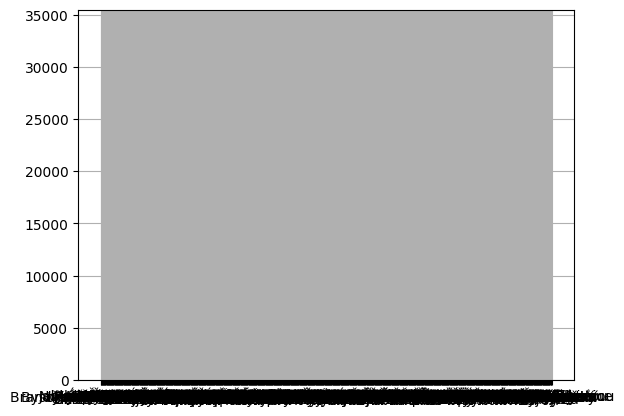

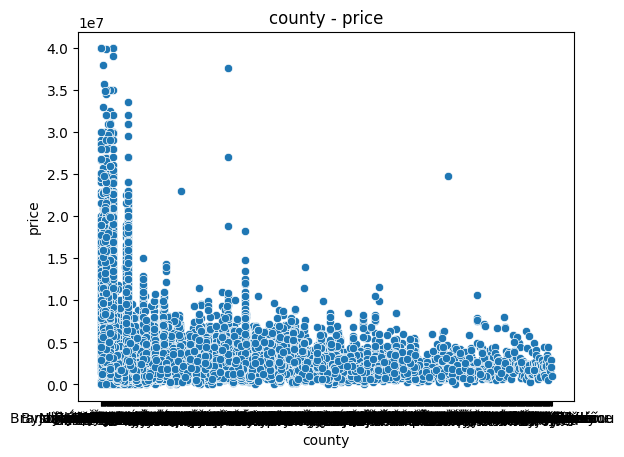

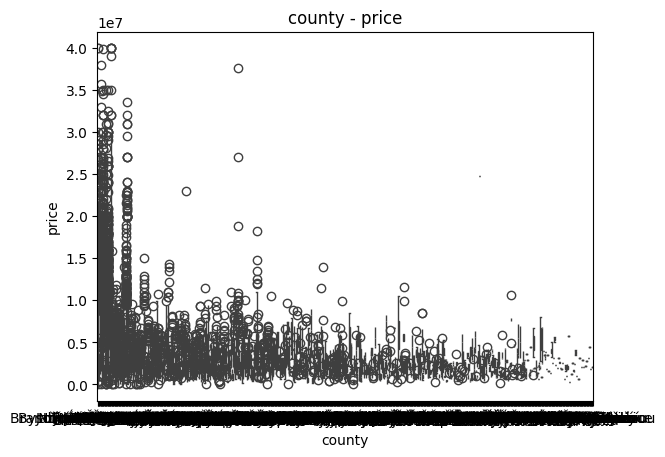

C:\Users\gracj\AppData\Local\Temp\ipykernel_12000\132873727.py:2: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  tmp = data.groupby(agg_feat).agg(


                        min_      perc_5    perc_25    perc_50          mean  \
county                                                                         
Abertamy           1290000.0  1333600.00  1890000.0  3200000.0  2.924000e+06   
Adamov              690826.0   702103.75   917566.0  1306139.5  1.628257e+06   
Albrechtice        3500000.0  3500000.00  3500000.0  3500000.0  3.500000e+06   
Aš                  360000.0   513000.00   735000.0  1050000.0  1.057744e+06   
Bakov nad Jizerou  1700000.0  1760000.00  2000000.0  2300000.0  2.330000e+06   
...                      ...         ...        ...        ...           ...   
Železný Brod        750000.0   750000.00   757500.0  1299500.0  1.486125e+06   
Želešice           3695000.0  3826950.00  4354750.0  5014500.0  5.014500e+06   
Židlochovice        560000.0  1214500.00  2137500.0  3270000.0  2.971667e+06   
Žlutice             400000.0   429250.00   546250.0   622500.0  6.162500e+05   
Žďár nad Sázavou   1300000.0  1472000.00

C:\Users\gracj\AppData\Local\Temp\ipykernel_12000\132873727.py:2: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  tmp = data.groupby(agg_feat).agg(


count    48589.000000
mean         3.384758
std          0.950577
min         -1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          7.000000
Name: disposition, dtype: float64

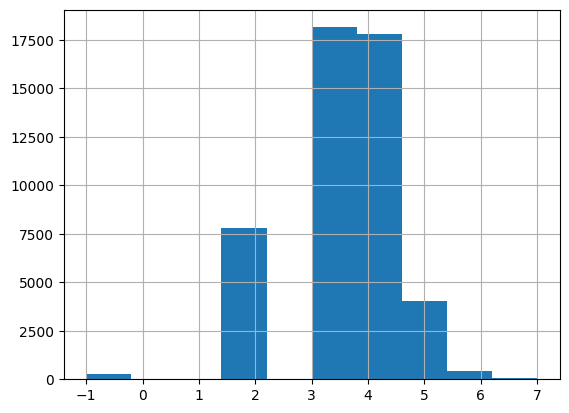

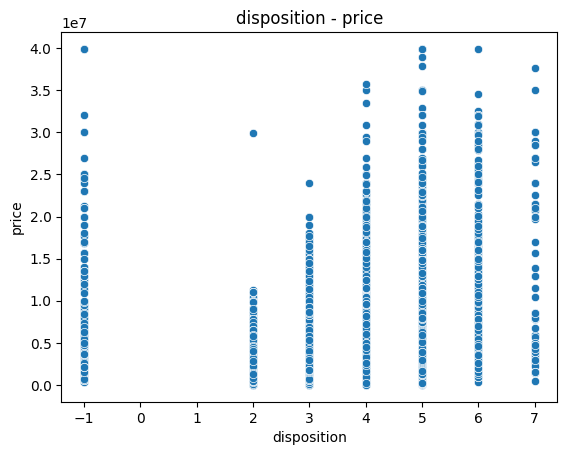

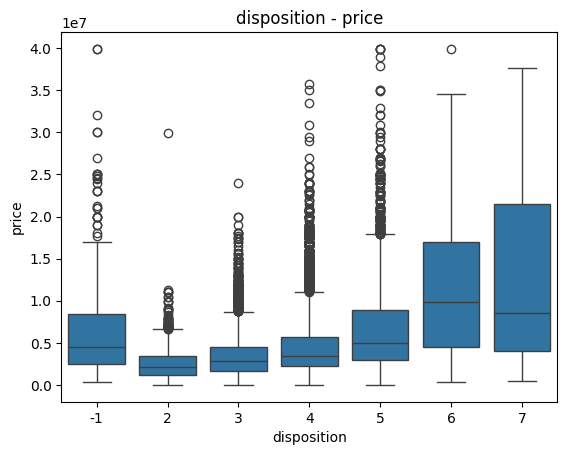

                 min_     perc_5    perc_25    perc_50          mean  \
disposition                                                            
-1           330000.0   850000.0  2520000.0  4490000.0  7.007054e+06   
 2             4400.0   498200.0  1240000.0  2100000.0  2.362565e+06   
 3             6500.0   690000.0  1690000.0  2800000.0  3.280048e+06   
 4             9700.0   940000.0  2250000.0  3490000.0  4.425469e+06   
 5            15000.0  1049970.0  2952500.0  4997345.0  6.543376e+06   
 6           399000.0  1999400.0  4490000.0  9900000.0  1.148190e+07   
 7           449000.0  1928200.0  4067250.0  8500000.0  1.343486e+07   

                perc_75     perc_95        max_    _n_  
disposition                                             
-1            8419000.0  23099900.0  39900000.0    259  
 2            3400000.0   4598850.0  29950000.0   7797  
 3            4500000.0   6898850.0  24000000.0  18154  
 4            5750000.0  10106442.0  35695000.0  17823  
 5       

C:\Users\gracj\AppData\Local\Temp\ipykernel_12000\132873727.py:2: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  tmp = data.groupby(agg_feat).agg(
C:\Users\gracj\AppData\Local\Temp\ipykernel_12000\132873727.py:2: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  tmp = data.groupby(agg_feat).agg(


count    4.858900e+04
mean     3.934678e+06
std      3.287508e+06
min      4.400000e+03
25%      1.849000e+06
50%      3.100000e+06
75%      4.990000e+06
max      3.990000e+07
Name: price, dtype: float64

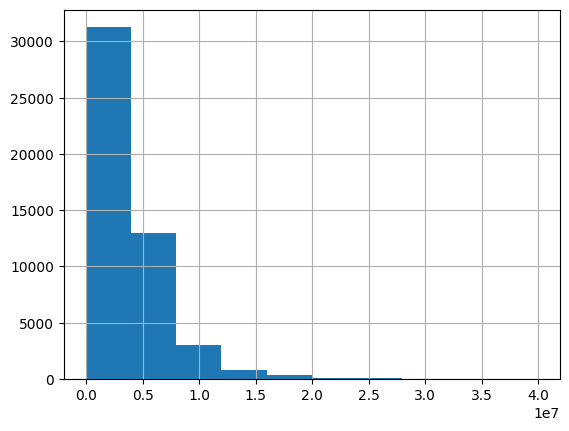

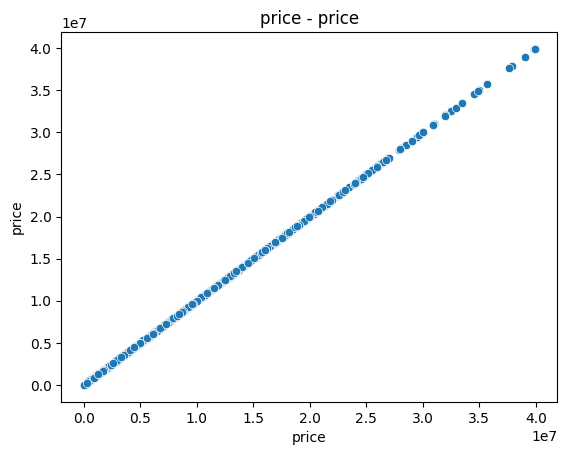

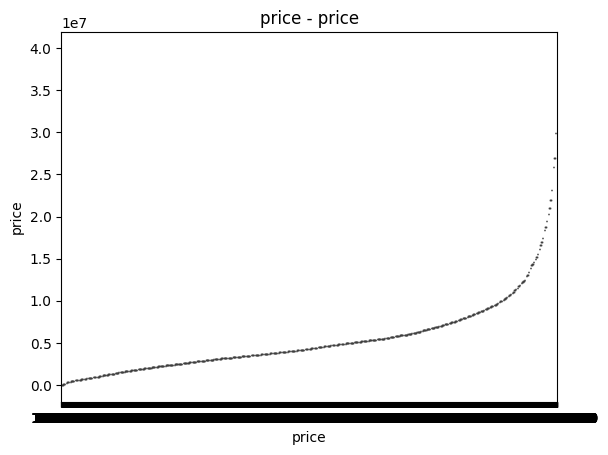

C:\Users\gracj\AppData\Local\Temp\ipykernel_12000\132873727.py:2: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  tmp = data.groupby(agg_feat).agg(


                  min_      perc_5     perc_25     perc_50        mean  \
price                                                                    
4400.0          4400.0      4400.0      4400.0      4400.0      4400.0   
6500.0          6500.0      6500.0      6500.0      6500.0      6500.0   
6800.0          6800.0      6800.0      6800.0      6800.0      6800.0   
7000.0          7000.0      7000.0      7000.0      7000.0      7000.0   
8000.0          8000.0      8000.0      8000.0      8000.0      8000.0   
...                ...         ...         ...         ...         ...   
37610000.0  37610000.0  37610000.0  37610000.0  37610000.0  37610000.0   
37900000.0  37900000.0  37900000.0  37900000.0  37900000.0  37900000.0   
39000000.0  39000000.0  39000000.0  39000000.0  39000000.0  39000000.0   
39843000.0  39843000.0  39843000.0  39843000.0  39843000.0  39843000.0   
39900000.0  39900000.0  39900000.0  39900000.0  39900000.0  39900000.0   

               perc_75     perc_95   

C:\Users\gracj\AppData\Local\Temp\ipykernel_12000\132873727.py:2: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  tmp = data.groupby(agg_feat).agg(


count       48589
unique          7
top       Cihlová
freq        23995
Name: structure, dtype: object

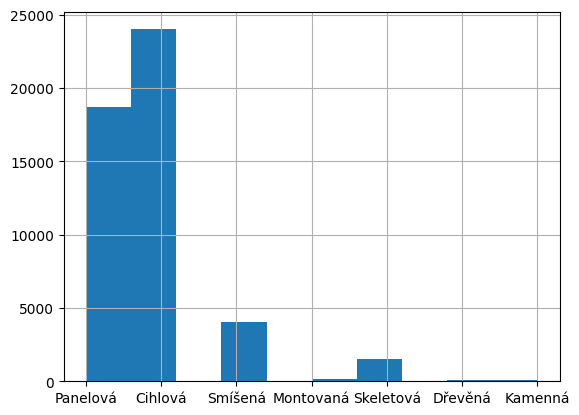

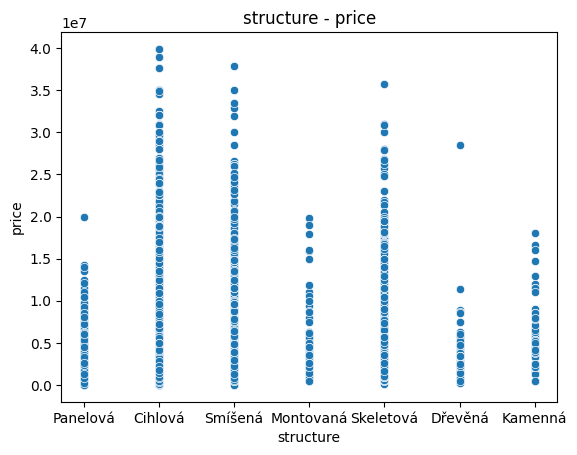

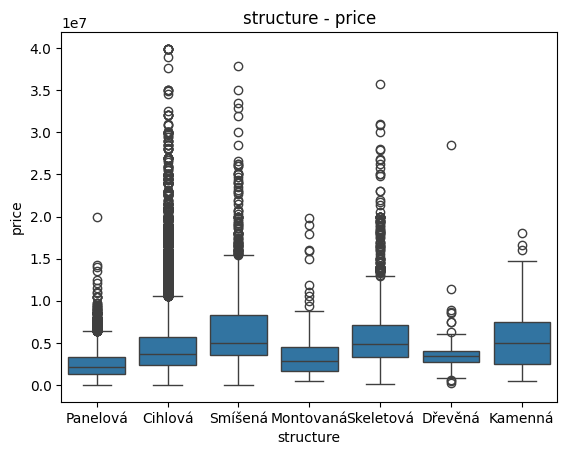

               min_     perc_5    perc_25    perc_50          mean    perc_75  \
structure                                                                       
Cihlová      6500.0  1060000.0  2350000.0  3650000.0  4.599534e+06  5640000.0   
Dřevěná    270000.0  1464000.0  2690000.0  3400000.0  3.772935e+06  4069000.0   
Kamenná    460000.0  1350000.0  2500000.0  4990000.0  5.643308e+06  7485000.0   
Montovaná  420000.0   758500.0  1612500.0  2890000.0  3.920612e+06  4490000.0   
Panelová     4400.0   570000.0  1290000.0  2170000.0  2.496438e+06  3340000.0   
Skeletová  150000.0  1409000.0  3290000.0  4817925.0  5.875012e+06  7153000.0   
Smíšená      6500.0  1300000.0  3553050.0  4999000.0  5.897515e+06  8290000.0   

              perc_95        max_    _n_  
structure                                 
Cihlová    11355009.1  39900000.0  23995  
Dřevěná     7477200.0  28500000.0    117  
Kamenná    14830000.0  18000000.0     59  
Montovaná  11302000.0  19800000.0    134  
Panelová    

C:\Users\gracj\AppData\Local\Temp\ipykernel_12000\132873727.py:2: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  tmp = data.groupby(agg_feat).agg(
C:\Users\gracj\AppData\Local\Temp\ipykernel_12000\132873727.py:2: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  tmp = data.groupby(agg_feat).agg(


count    48589.000000
mean         7.199551
std          1.518384
min          1.000000
25%          6.000000
50%          8.000000
75%          8.000000
max          9.000000
Name: building_state, dtype: float64

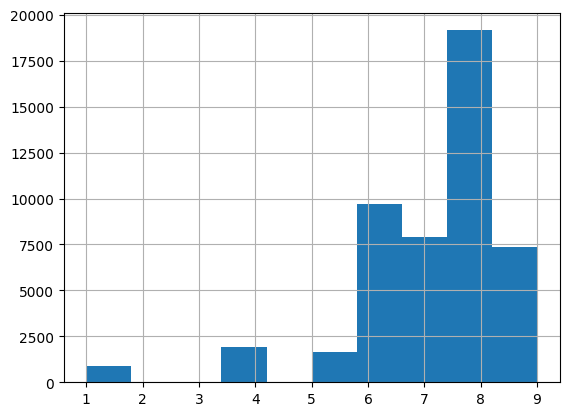

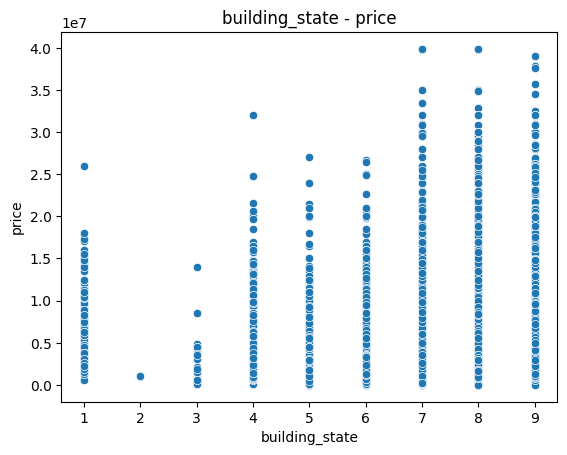

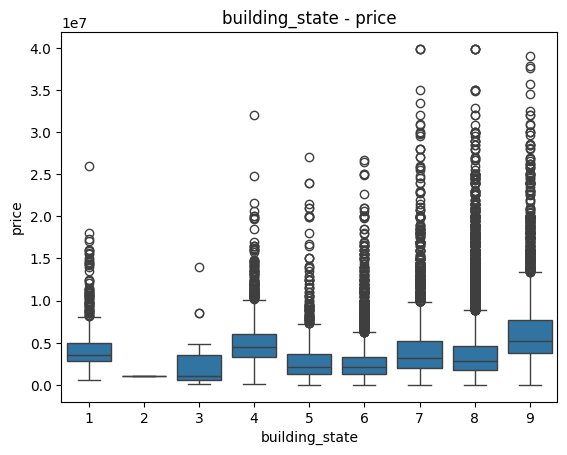

                     min_     perc_5    perc_25    perc_50          mean  \
building_state                                                             
1                525000.0  1843540.0  2790000.0  3484711.0  4.328800e+06   
2               1000000.0  1000000.0  1000000.0  1000000.0  1.000000e+06   
3                 90000.0   236750.0   590000.0  1020000.0  2.440156e+06   
4                120000.0  1749471.3  3249750.0  4500000.0  5.108446e+06   
5                 37500.0   559550.0  1300000.0  2100000.0  2.865519e+06   
6                  6500.0   549000.0  1290000.0  2090000.0  2.618405e+06   
7                  7000.0   799000.0  1990000.0  3200000.0  3.959062e+06   
8                  4400.0   735000.0  1750000.0  2880000.0  3.723575e+06   
9                  9000.0  2190000.0  3797000.0  5143663.0  6.090993e+06   

                  perc_75      perc_95        max_    _n_  
building_state                                             
1               4927500.0   9840244.95  259

C:\Users\gracj\AppData\Local\Temp\ipykernel_12000\132873727.py:2: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  tmp = data.groupby(agg_feat).agg(
C:\Users\gracj\AppData\Local\Temp\ipykernel_12000\132873727.py:2: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  tmp = data.groupby(agg_feat).agg(


count      48589
unique         3
top       Osobní
freq       41563
Name: ownership, dtype: object

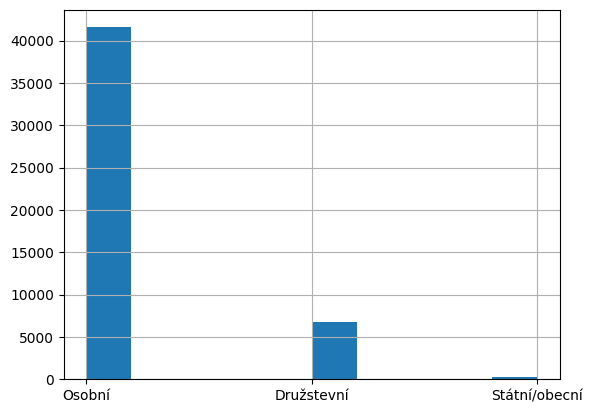

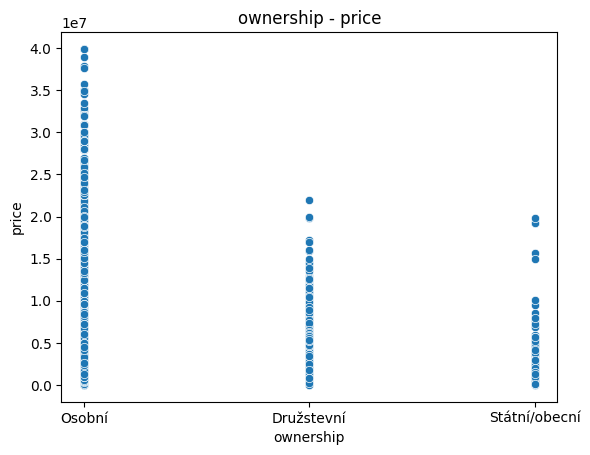

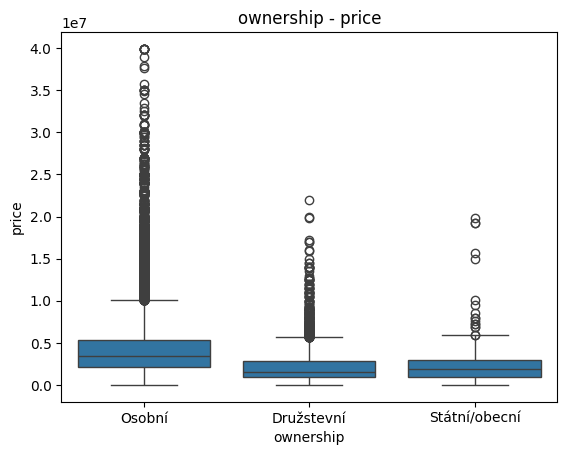

                  min_    perc_5    perc_25    perc_50          mean  \
ownership                                                              
Družstevní     10800.0  489000.0   899000.0  1590000.0  2.165967e+06   
Osobní          4400.0  890000.0  2100000.0  3390000.0  4.231184e+06   
Státní/obecní  14000.0  295000.0   992500.0  1850000.0  2.655497e+06   

                 perc_75     perc_95        max_    _n_  
ownership                                                
Družstevní     2800000.0   5561500.0  22000000.0   6815  
Osobní         5290000.0  10118850.0  39900000.0  41563  
Státní/obecní  2984800.0   7400000.0  19880000.0    211  
-------------------------------------------

floor


C:\Users\gracj\AppData\Local\Temp\ipykernel_12000\132873727.py:2: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  tmp = data.groupby(agg_feat).agg(
C:\Users\gracj\AppData\Local\Temp\ipykernel_12000\132873727.py:2: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  tmp = data.groupby(agg_feat).agg(


count    48589.000000
mean         3.446171
std          2.343972
min         -3.000000
25%          2.000000
50%          3.000000
75%          5.000000
max         24.000000
Name: floor, dtype: float64

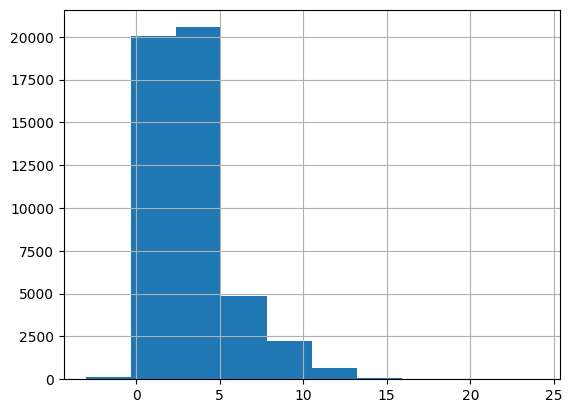

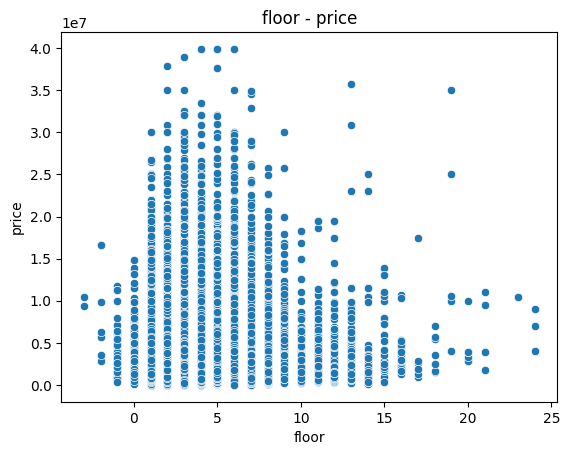

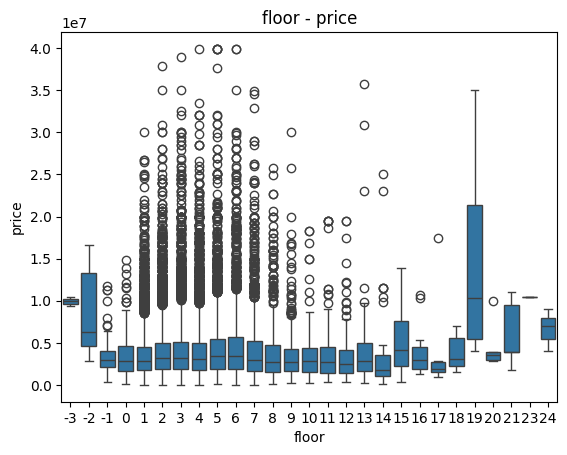

             min_       perc_5      perc_25     perc_50          mean  \
floor                                                                   
-3      9349080.0   9406626.00   9636810.00   9924540.0  9.924540e+06   
-2      2800000.0   3027700.00   4629500.00   6246638.0  8.765959e+06   
-1       350000.0    966500.00   2190000.00   2990000.0  3.431044e+06   
 0       150000.0    598200.00   1690000.00   2890000.0  3.429217e+06   
 1         6500.0    770000.00   1790000.00   2900000.0  3.537630e+06   
 2         6500.0    790000.00   1950000.00   3195000.0  3.901212e+06   
 3         4400.0    750000.00   1890000.00   3200000.0  4.019375e+06   
 4         6800.0    699000.00   1799000.00   3050000.0  3.947660e+06   
 5       100000.0    650000.00   1850000.00   3490000.0  4.388217e+06   
 6         8000.0    690000.00   1880000.00   3430000.0  4.599875e+06   
 7         9700.0    650000.00   1697350.00   2990000.0  4.199834e+06   
 8       140000.0    596300.00   1544000.00   26900

C:\Users\gracj\AppData\Local\Temp\ipykernel_12000\132873727.py:2: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  tmp = data.groupby(agg_feat).agg(
C:\Users\gracj\AppData\Local\Temp\ipykernel_12000\132873727.py:2: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  tmp = data.groupby(agg_feat).agg(


count    48589.000000
mean        67.361502
std         32.350657
min          2.000000
25%         50.000000
50%         63.000000
75%         78.000000
max        966.000000
Name: area, dtype: float64

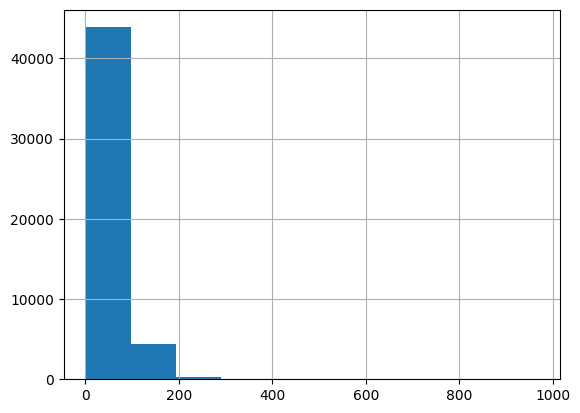

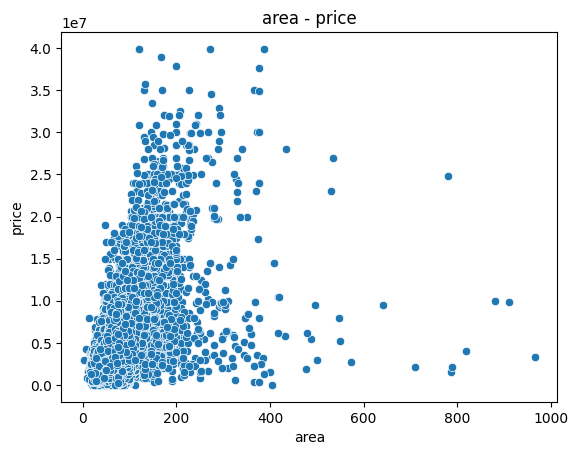

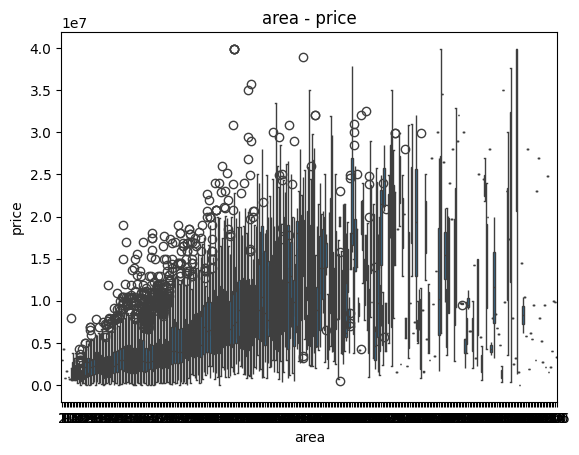

C:\Users\gracj\AppData\Local\Temp\ipykernel_12000\132873727.py:2: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  tmp = data.groupby(agg_feat).agg(


           min_     perc_5    perc_25    perc_50       mean    perc_75  \
area                                                                     
2     3000000.0  3000000.0  3000000.0  3000000.0  3000000.0  3000000.0   
7     4327350.0  4327350.0  4327350.0  4327350.0  4327350.0  4327350.0   
9      850000.0   850000.0   850000.0   850000.0   850000.0   850000.0   
10    1700000.0  1700000.0  1700000.0  1700000.0  1700000.0  1700000.0   
12     980000.0   980000.0   980000.0   980000.0   980000.0   980000.0   
...         ...        ...        ...        ...        ...        ...   
790   2100000.0  2100000.0  2100000.0  2100000.0  2100000.0  2100000.0   
820   3999000.0  3999000.0  3999000.0  3999000.0  3999000.0  3999000.0   
880   9990000.0  9990000.0  9990000.0  9990000.0  9990000.0  9990000.0   
910   9900000.0  9900000.0  9900000.0  9900000.0  9900000.0  9900000.0   
966   3350000.0  3350000.0  3350000.0  3350000.0  3350000.0  3350000.0   

        perc_95       max_  _n_  
are

C:\Users\gracj\AppData\Local\Temp\ipykernel_12000\132873727.py:2: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  tmp = data.groupby(agg_feat).agg(


count    48589.000000
mean         4.842475
std          2.495457
min          1.000000
25%          3.000000
50%          5.000000
75%          7.000000
max          8.000000
Name: energy_performance, dtype: float64

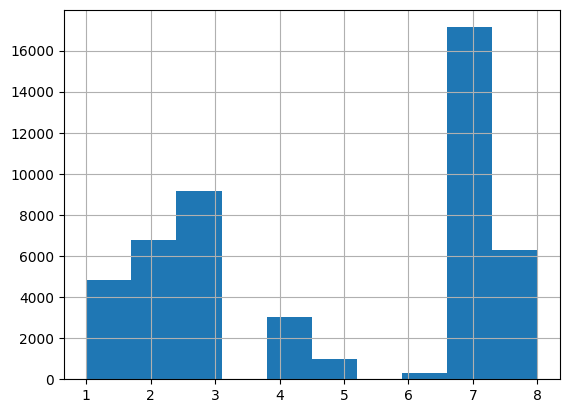

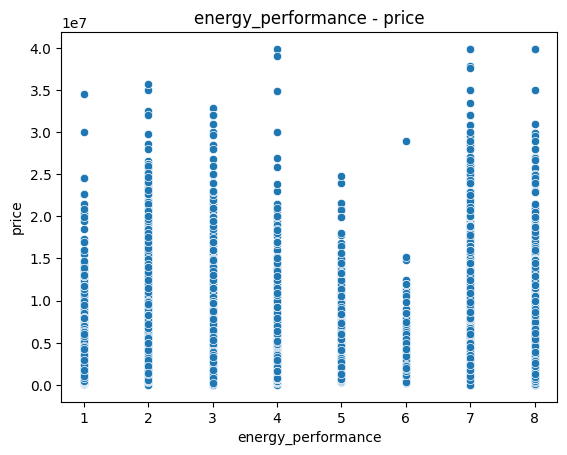

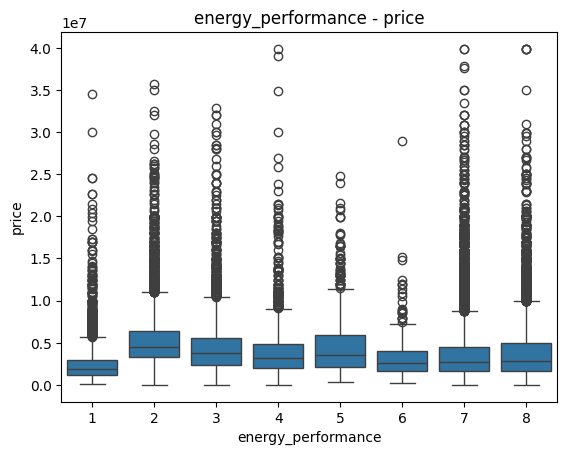

                        min_     perc_5    perc_25    perc_50          mean  \
energy_performance                                                            
1                   150000.0   570000.0  1199000.0  1900000.0  2.507013e+06   
2                    11000.0  1799000.0  3254680.0  4490000.0  5.307255e+06   
3                     8000.0   950000.0  2340000.0  3790000.0  4.409179e+06   
4                     7000.0   890000.0  1999000.0  3200000.0  3.880953e+06   
5                   300000.0   861330.0  2170000.0  3550000.0  4.609867e+06   
6                   229000.0   599000.0  1689500.0  2600000.0  3.351677e+06   
7                     4400.0   680000.0  1650000.0  2690000.0  3.521200e+06   
8                     6800.0   629410.0  1600000.0  2850000.0  3.928405e+06   

                      perc_75     perc_95        max_    _n_  
energy_performance                                            
1                   3000000.0   6200000.0  34500000.0   4830  
2                   

C:\Users\gracj\AppData\Local\Temp\ipykernel_12000\132873727.py:2: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  tmp = data.groupby(agg_feat).agg(
C:\Users\gracj\AppData\Local\Temp\ipykernel_12000\132873727.py:2: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  tmp = data.groupby(agg_feat).agg(


count    48589.000000
mean         0.268559
std          0.443214
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: balcony_exist, dtype: float64

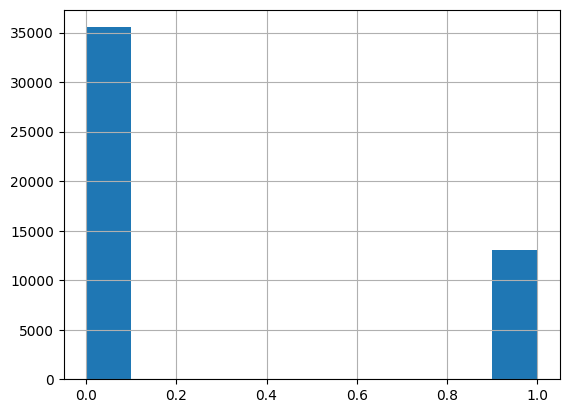

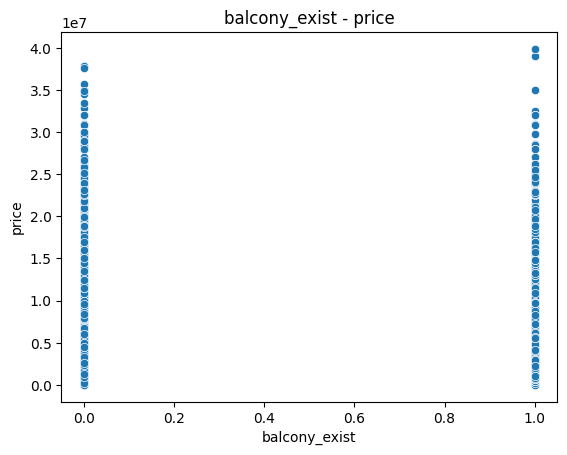

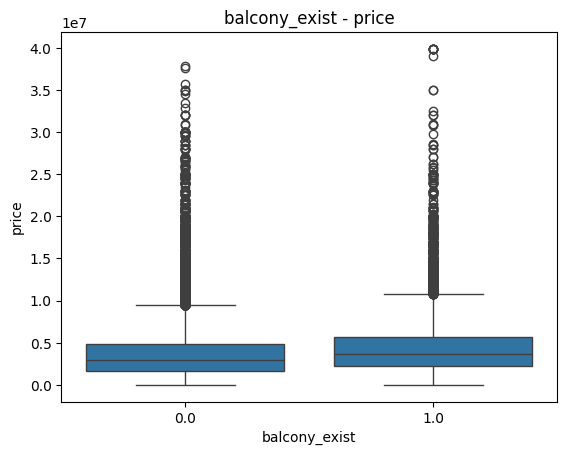

                 min_     perc_5    perc_25    perc_50          mean  \
balcony_exist                                                          
0.0            4400.0   680000.0  1699000.0  2950000.0  3.711896e+06   
1.0            9800.0  1050000.0  2250000.0  3600000.0  4.541443e+06   

                 perc_75     perc_95        max_    _n_  
balcony_exist                                            
0.0            4790000.0   9397150.0  37900000.0  35540  
1.0            5650000.0  10765000.0  39900000.0  13049  
-------------------------------------------

balcony


C:\Users\gracj\AppData\Local\Temp\ipykernel_12000\132873727.py:2: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  tmp = data.groupby(agg_feat).agg(
C:\Users\gracj\AppData\Local\Temp\ipykernel_12000\132873727.py:2: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  tmp = data.groupby(agg_feat).agg(


count    48589.000000
mean         0.841981
std          4.909732
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        891.000000
Name: balcony, dtype: float64

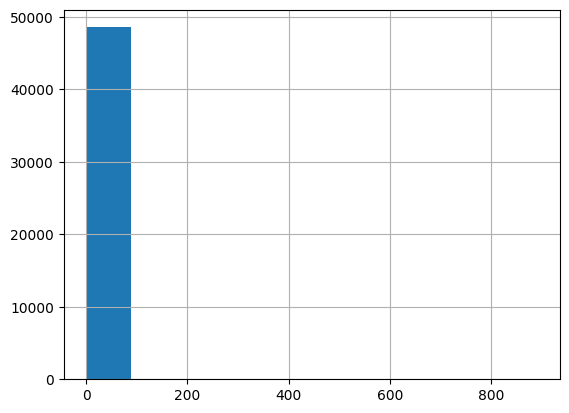

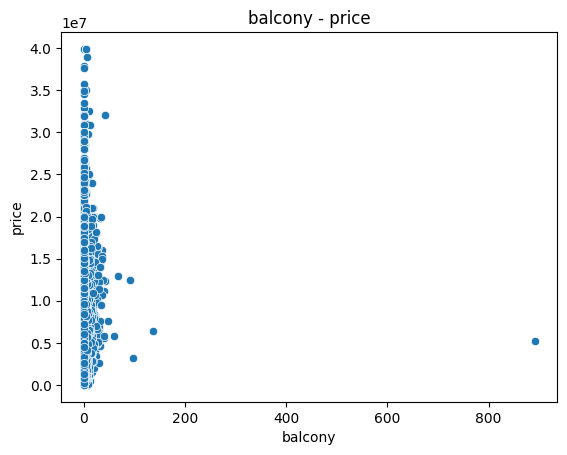

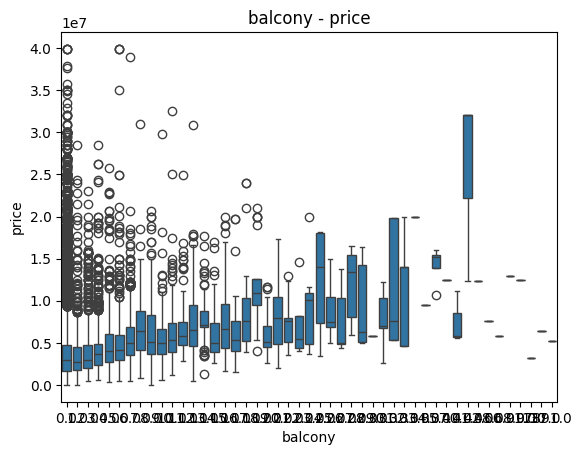

               min_       perc_5      perc_25     perc_50          mean  \
balcony                                                                   
0.0          4400.0    690000.00   1700000.00   2920000.0  3.717540e+06   
1.0          9800.0    789500.00   1749750.00   2700000.0  3.686848e+06   
2.0        415000.0   1050000.00   1990000.00   2950000.0  3.972784e+06   
3.0        599000.0   1436000.00   2350000.00   3640883.0  4.251866e+06   
4.0        370000.0   1500000.00   2700000.00   4010000.0  5.004986e+06   
5.0        420000.0   1690000.00   2987667.50   4200000.0  5.161256e+06   
6.0        449000.0   1794050.00   3542250.00   4950000.0  5.636659e+06   
7.0        779000.0   2508000.00   4205767.00   6367550.0  6.346875e+06   
8.0         10700.0   1882000.00   3630000.00   5150000.0  5.929595e+06   
9.0        610000.0   2022735.00   3700000.00   5000000.0  5.490273e+06   
10.0      1195000.0   2198766.60   3893471.50   5390000.0  6.155497e+06   
11.0      2816720.0   359

C:\Users\gracj\AppData\Local\Temp\ipykernel_12000\132873727.py:2: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  tmp = data.groupby(agg_feat).agg(
C:\Users\gracj\AppData\Local\Temp\ipykernel_12000\132873727.py:2: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  tmp = data.groupby(agg_feat).agg(


count    48589.000000
mean         0.490193
std          0.499909
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: elevator, dtype: float64

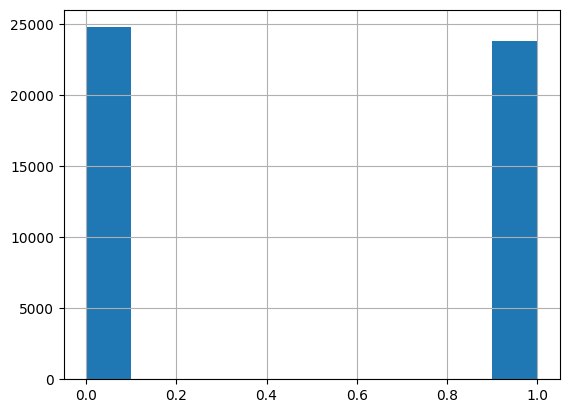

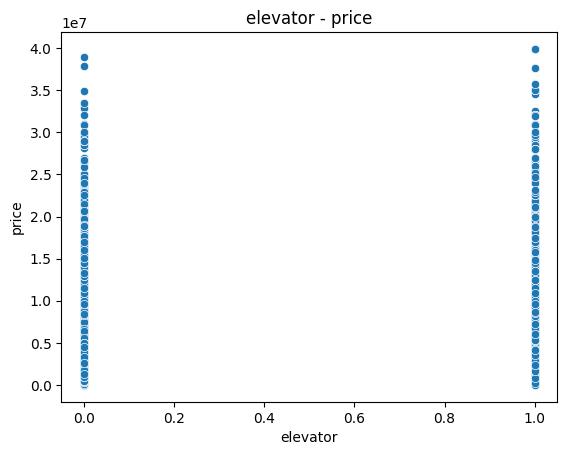

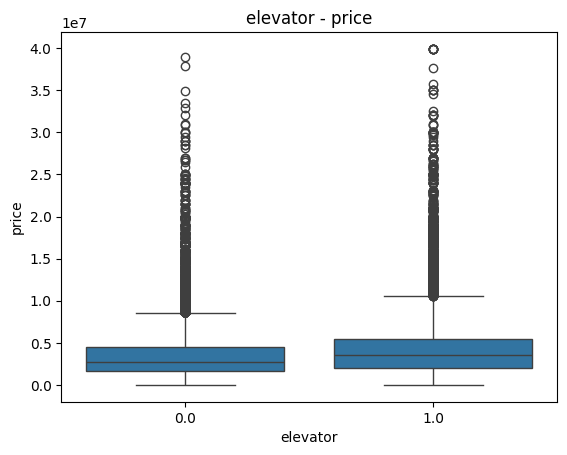

            min_     perc_5    perc_25    perc_50          mean    perc_75  \
elevator                                                                     
0.0       6500.0  749000.00  1699000.0  2780000.0  3.546127e+06  4460000.0   
1.0       4400.0  699984.15  2020000.0  3500000.0  4.338776e+06  5459873.5   

              perc_95        max_    _n_  
elevator                                  
0.0        8968850.00  39000000.0  24771  
1.0       10848078.55  39900000.0  23818  
-------------------------------------------

cellar_exist


C:\Users\gracj\AppData\Local\Temp\ipykernel_12000\132873727.py:2: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  tmp = data.groupby(agg_feat).agg(
C:\Users\gracj\AppData\Local\Temp\ipykernel_12000\132873727.py:2: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  tmp = data.groupby(agg_feat).agg(


count    48589.000000
mean         0.660643
std          0.473496
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: cellar_exist, dtype: float64

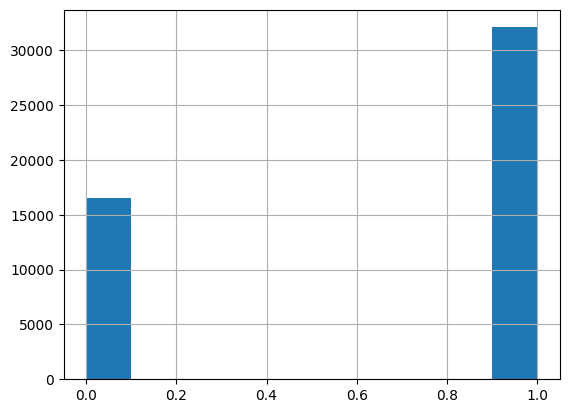

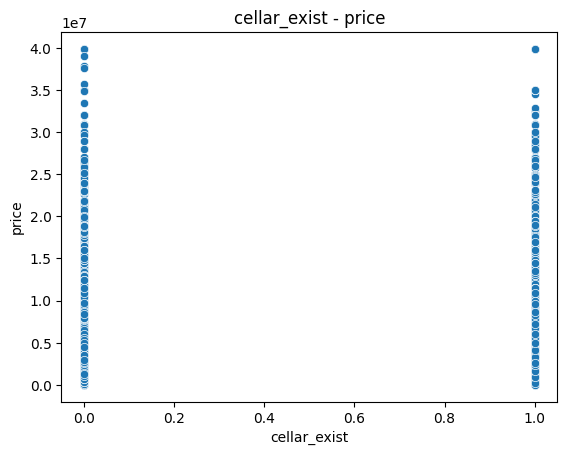

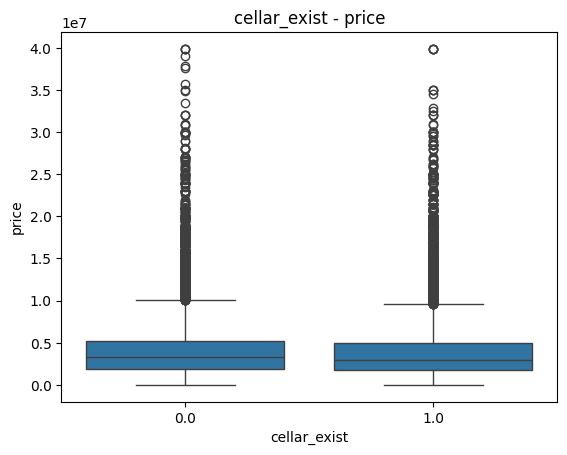

                min_    perc_5    perc_25    perc_50          mean    perc_75  \
cellar_exist                                                                    
0.0           6500.0  690000.0  1900000.0  3300000.0  4.106429e+06  5150000.0   
1.0           4400.0  750000.0  1799000.0  2990000.0  3.846454e+06  4920000.0   

                 perc_95        max_    _n_  
cellar_exist                                 
0.0           10295400.0  39900000.0  16489  
1.0            9658859.0  39900000.0  32100  
-------------------------------------------

cellar


C:\Users\gracj\AppData\Local\Temp\ipykernel_12000\132873727.py:2: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  tmp = data.groupby(agg_feat).agg(
C:\Users\gracj\AppData\Local\Temp\ipykernel_12000\132873727.py:2: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  tmp = data.groupby(agg_feat).agg(


count    48589.000000
mean         1.364445
std          3.423013
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max         86.000000
Name: cellar, dtype: float64

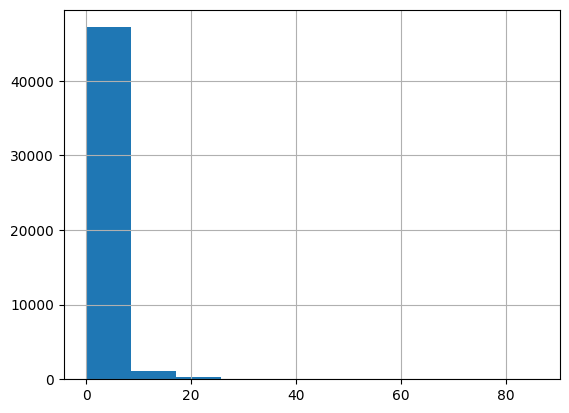

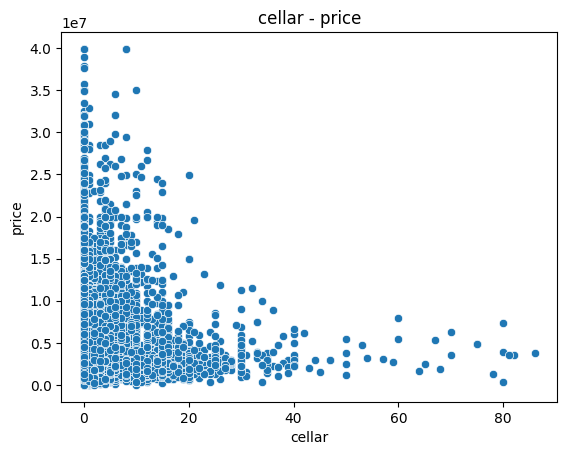

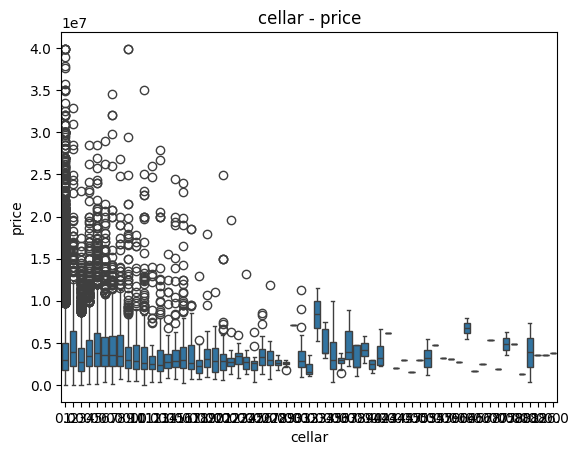

             min_     perc_5    perc_25    perc_50          mean     perc_75  \
cellar                                                                         
0.0        4400.0   690000.0  1771000.0  2999045.0  3.885414e+06  4970000.00   
1.0       14000.0   860000.0  2290000.0  3920000.0  4.490695e+06  6367550.00   
2.0       17500.0   659000.0  1600000.0  2750000.0  3.226405e+06  4400374.75   
3.0      150000.0  1050000.0  2250000.0  3490000.0  4.103001e+06  5292000.00   
4.0      120000.0  1044300.0  2300000.0  3850000.0  4.799879e+06  6150000.00   
...           ...        ...        ...        ...           ...         ...   
78.0    1350000.0  1350000.0  1350000.0  1350000.0  1.350000e+06  1350000.00   
80.0     360000.0   714000.0  2130000.0  3900000.0  3.870000e+06  5625000.00   
81.0    3599000.0  3599000.0  3599000.0  3599000.0  3.599000e+06  3599000.00   
82.0    3600000.0  3600000.0  3600000.0  3600000.0  3.600000e+06  3600000.00   
86.0    3740000.0  3740000.0  3740000.0 

C:\Users\gracj\AppData\Local\Temp\ipykernel_12000\132873727.py:2: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  tmp = data.groupby(agg_feat).agg(
C:\Users\gracj\AppData\Local\Temp\ipykernel_12000\132873727.py:2: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  tmp = data.groupby(agg_feat).agg(


count    48589.000000
mean         0.228632
std          0.350605
min          0.000000
25%          0.000000
50%          0.000000
75%          0.500000
max          1.000000
Name: furnished, dtype: float64

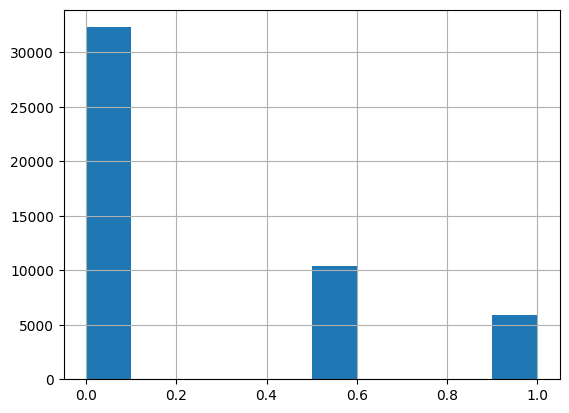

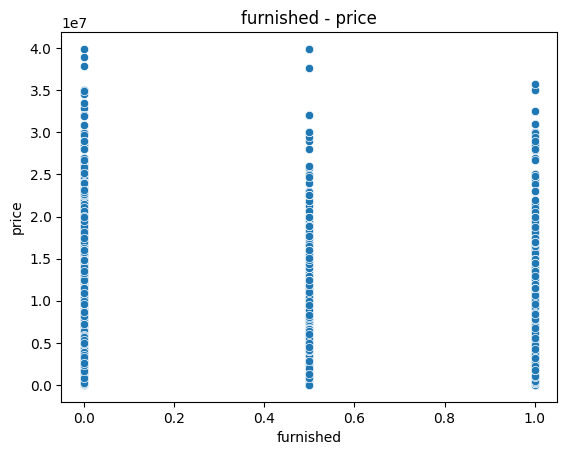

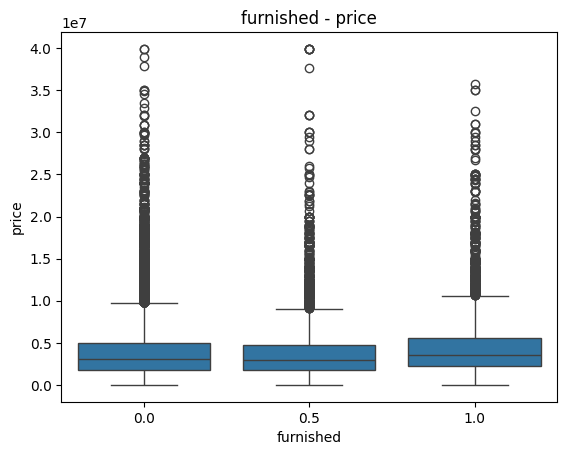

             min_    perc_5    perc_25    perc_50          mean    perc_75  \
furnished                                                                    
0.0        6800.0  699000.0  1790000.0  3099990.0  3.913202e+06  4990000.0   
0.5        4400.0  750000.0  1800000.0  2950000.0  3.658747e+06  4700000.0   
1.0        6500.0  840000.0  2200000.0  3500000.0  4.536303e+06  5599000.0   

              perc_95        max_    _n_  
furnished                                 
0.0         9800000.0  39900000.0  32287  
0.5         8500000.0  39900000.0  10386  
1.0        11890000.0  35695000.0   5916  
-------------------------------------------

barrier_free


C:\Users\gracj\AppData\Local\Temp\ipykernel_12000\132873727.py:2: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  tmp = data.groupby(agg_feat).agg(
C:\Users\gracj\AppData\Local\Temp\ipykernel_12000\132873727.py:2: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  tmp = data.groupby(agg_feat).agg(


count    48589.000000
mean         0.141925
std          0.348977
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: barrier_free, dtype: float64

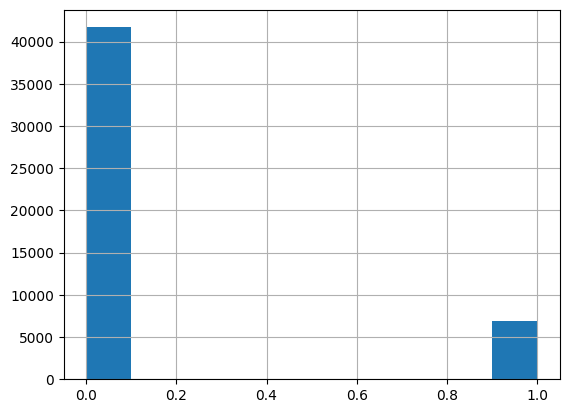

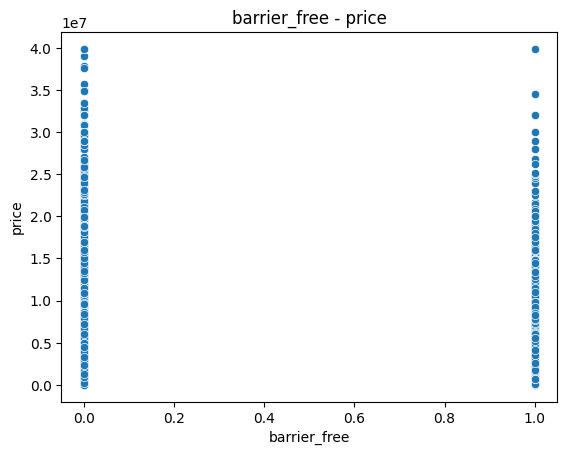

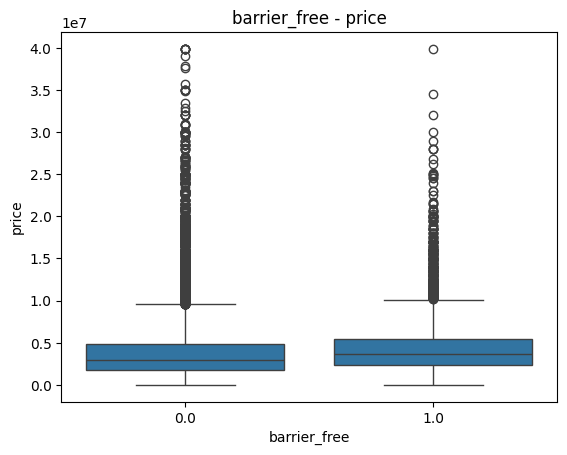

                 min_    perc_5    perc_25    perc_50          mean  \
barrier_free                                                          
0.0            4400.0  699000.0  1780000.0  2990000.0  3.847201e+06   
1.0           15000.0  939283.0  2390000.0  3690000.0  4.463565e+06   

                perc_75     perc_95        max_    _n_  
barrier_free                                            
0.0           4900000.0   9716350.0  39900000.0  41693  
1.0           5490000.0  10579568.0  39843000.0   6896  
-------------------------------------------

lodge_exist


C:\Users\gracj\AppData\Local\Temp\ipykernel_12000\132873727.py:2: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  tmp = data.groupby(agg_feat).agg(
C:\Users\gracj\AppData\Local\Temp\ipykernel_12000\132873727.py:2: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  tmp = data.groupby(agg_feat).agg(


count    48589.000000
mean         0.235897
std          0.424563
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: lodge_exist, dtype: float64

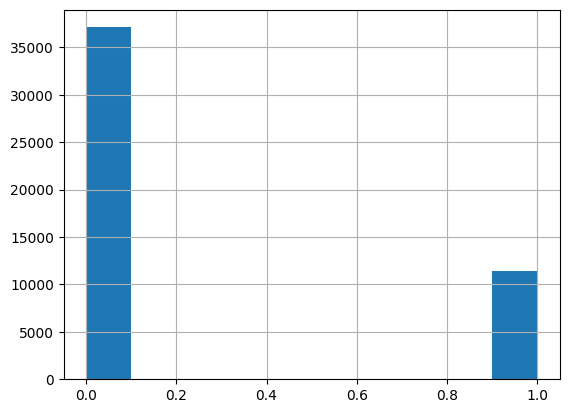

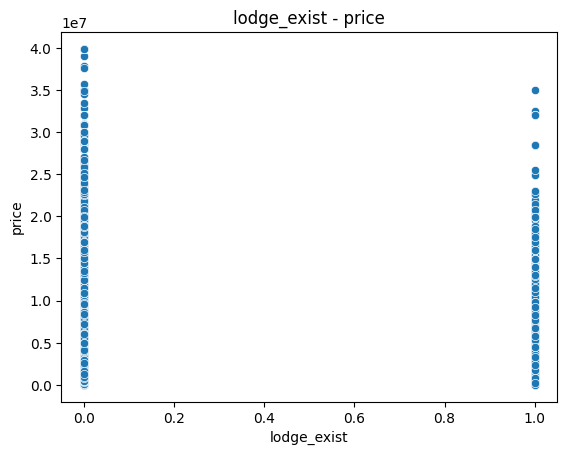

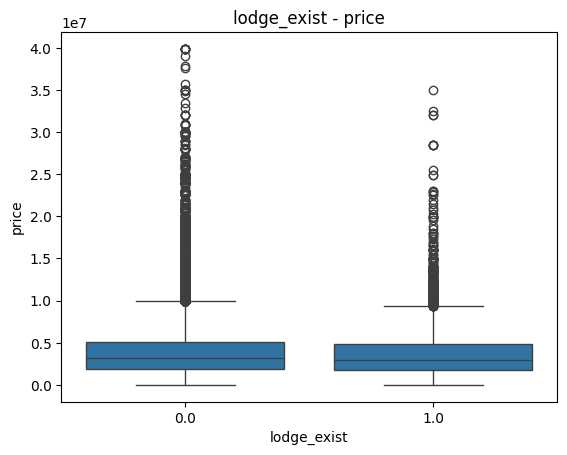

               min_    perc_5    perc_25    perc_50          mean    perc_75  \
lodge_exist                                                                    
0.0          4400.0  730000.0  1860000.0  3190000.0  4.071887e+06  5096185.0   
1.0          9700.0  720000.0  1778500.0  2900000.0  3.490241e+06  4790000.0   

                perc_95        max_    _n_  
lodge_exist                                 
0.0          10126655.0  39900000.0  37127  
1.0           7909500.0  35000000.0  11462  
-------------------------------------------

lodge


C:\Users\gracj\AppData\Local\Temp\ipykernel_12000\132873727.py:2: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  tmp = data.groupby(agg_feat).agg(
C:\Users\gracj\AppData\Local\Temp\ipykernel_12000\132873727.py:2: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  tmp = data.groupby(agg_feat).agg(


count    48589.000000
mean         0.566116
std          2.146133
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        111.000000
Name: lodge, dtype: float64

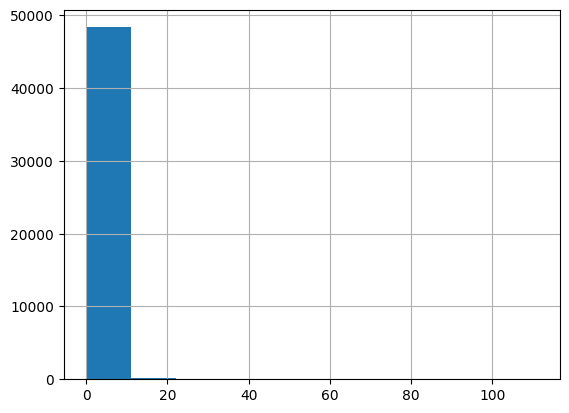

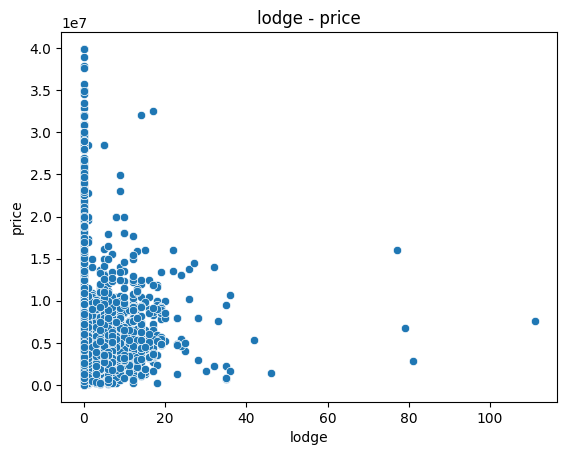

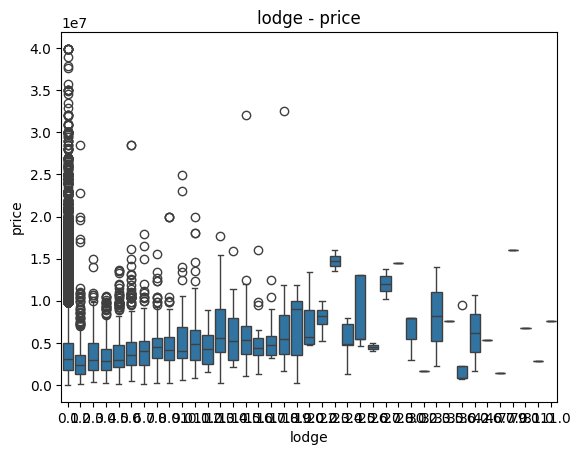

             min_      perc_5      perc_25     perc_50          mean  \
lodge                                                                  
0.0        4400.0    699900.0   1790000.00   3051000.0  3.933645e+06   
1.0      100000.0    650000.0   1324500.00   2376250.0  3.010638e+06   
2.0      370000.0    812500.0   1726750.00   2994500.0  3.531566e+06   
3.0      179000.0    849000.0   1799000.00   2800000.0  3.152480e+06   
4.0       95000.0   1047500.0   2100000.00   2995000.0  3.629733e+06   
5.0      480000.0   1360500.0   2425000.00   3570000.0  4.165138e+06   
6.0      120000.0    946950.0   2400000.00   3987150.0  4.023180e+06   
7.0      229000.0   1790000.0   3149500.00   4500000.0  4.536753e+06   
8.0      250000.0   1375000.0   2990000.00   4100000.0  4.684547e+06   
9.0      599000.0   1676400.0   3221750.00   4069045.0  5.391276e+06   
10.0     859000.0   1667400.0   2970000.00   4900000.0  5.673748e+06   
11.0    1596000.0   1666500.0   2493750.00   4324500.0  4.379882

C:\Users\gracj\AppData\Local\Temp\ipykernel_12000\132873727.py:2: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  tmp = data.groupby(agg_feat).agg(
C:\Users\gracj\AppData\Local\Temp\ipykernel_12000\132873727.py:2: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  tmp = data.groupby(agg_feat).agg(


count    48589.000000
mean         0.080121
std          0.271483
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: terace_exist, dtype: float64

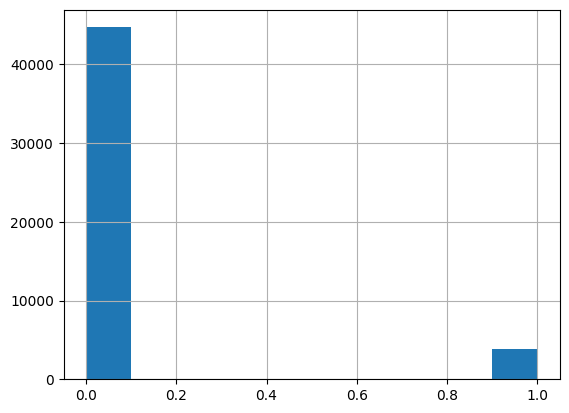

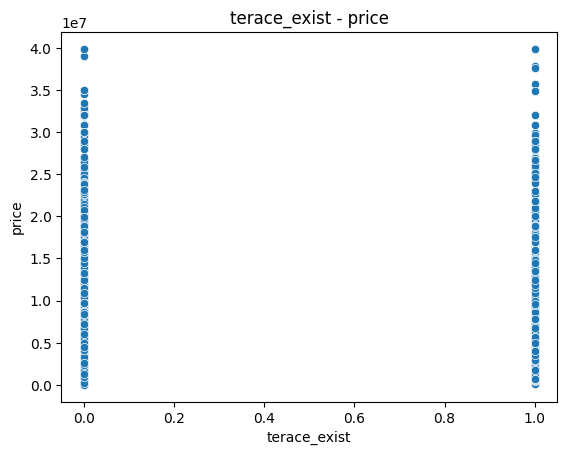

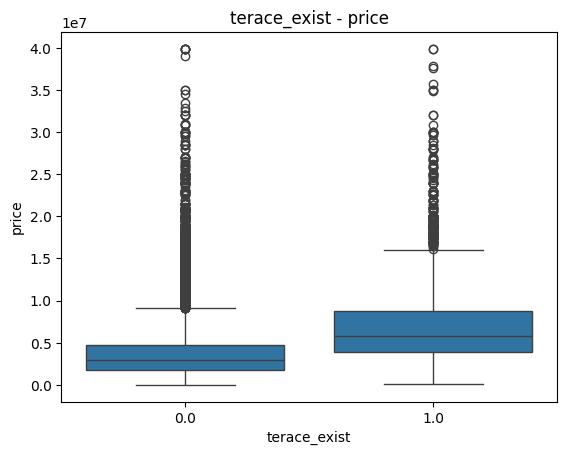

                  min_     perc_5    perc_25    perc_50          mean  \
terace_exist                                                            
0.0             4400.0   699000.0  1750000.0  2939803.5  3.655107e+06   
1.0           112000.0  2450000.0  3950000.0  5824640.0  7.144464e+06   

                perc_75     perc_95        max_    _n_  
terace_exist                                            
0.0           4700000.0   8979250.0  39900000.0  44696  
1.0           8790000.0  16900000.0  39900000.0   3893  
-------------------------------------------

terace


C:\Users\gracj\AppData\Local\Temp\ipykernel_12000\132873727.py:2: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  tmp = data.groupby(agg_feat).agg(
C:\Users\gracj\AppData\Local\Temp\ipykernel_12000\132873727.py:2: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  tmp = data.groupby(agg_feat).agg(


count    48589.000000
mean         1.350532
std          8.012591
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        179.000000
Name: terace, dtype: float64

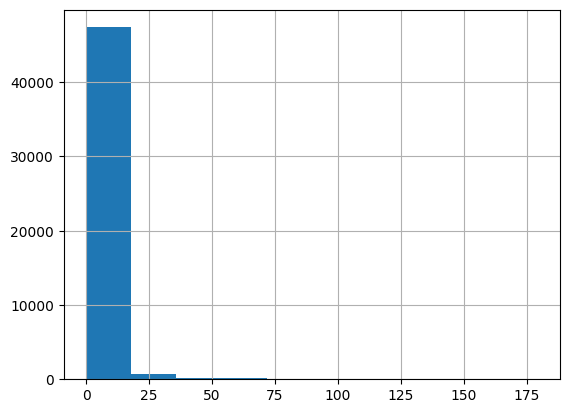

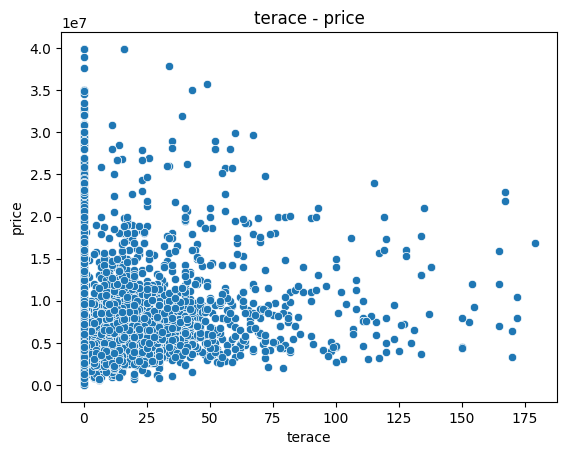

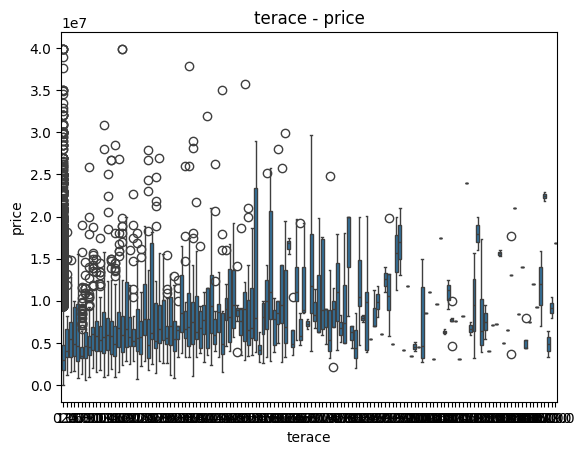

              min_      perc_5     perc_25     perc_50          mean  \
terace                                                                 
0.0         4400.0    699900.0   1790000.0   2990000.0  3.742577e+06   
1.0      1140000.0   2590000.0   3290000.0   3990000.0  5.600225e+06   
2.0      1535000.0   2139086.0   3299000.0   5500000.0  5.952599e+06   
3.0      1599000.0   1658000.0   3390000.0   4850000.0  5.732762e+06   
4.0       881326.0   1988000.0   2850000.0   4590000.0  5.535794e+06   
...            ...         ...         ...         ...           ...   
165.0    6990000.0   7490900.0   9494500.0  11999000.0  1.164665e+07   
167.0   21900000.0  21950000.0  22150000.0  22400000.0  2.240000e+07   
170.0    3280000.0   3438047.5   4070237.5   4860475.0  4.860475e+06   
172.0    7939000.0   8061550.0   8551750.0   9164500.0  9.164500e+06   
179.0   16900000.0  16900000.0  16900000.0  16900000.0  1.690000e+07   

           perc_75     perc_95        max_    _n_  
terace     

C:\Users\gracj\AppData\Local\Temp\ipykernel_12000\132873727.py:2: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  tmp = data.groupby(agg_feat).agg(
C:\Users\gracj\AppData\Local\Temp\ipykernel_12000\132873727.py:2: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  tmp = data.groupby(agg_feat).agg(


count    48589.000000
mean         8.235527
std        154.971333
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       9060.000000
Name: area_built_up, dtype: float64

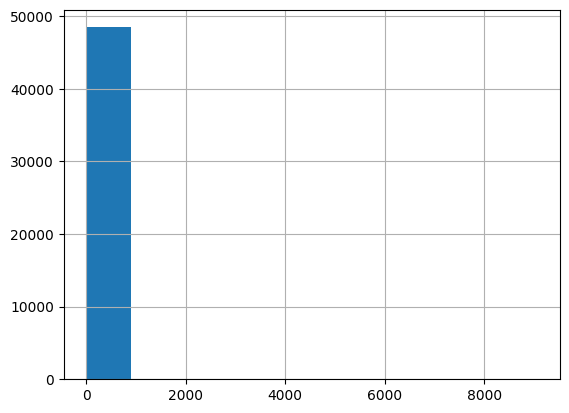

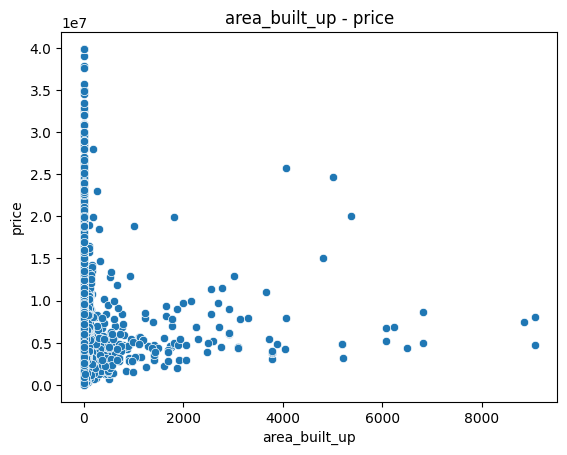

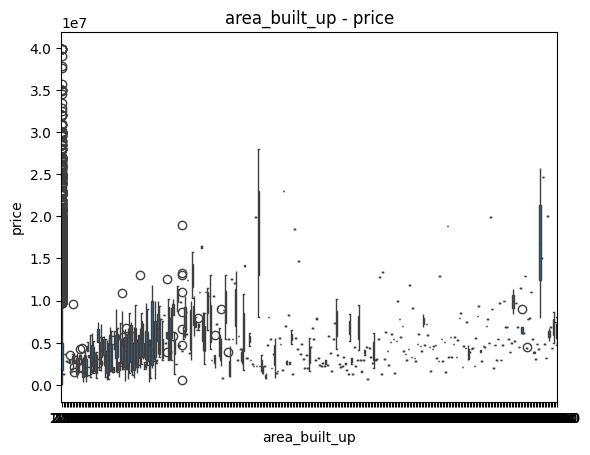

C:\Users\gracj\AppData\Local\Temp\ipykernel_12000\132873727.py:2: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  tmp = data.groupby(agg_feat).agg(


                    min_     perc_5    perc_25    perc_50          mean  \
area_built_up                                                             
0.0               4400.0   720000.0  1810000.0  3099000.0  3.919095e+06   
17.0           1290000.0  1290000.0  1290000.0  1290000.0  1.290000e+06   
20.0           3700000.0  3700000.0  3700000.0  3700000.0  3.700000e+06   
21.0           2800000.0  2800000.0  2800000.0  2800000.0  2.800000e+06   
23.0           2690000.0  2690000.0  2690000.0  2690000.0  2.690000e+06   
...                  ...        ...        ...        ...           ...   
6223.0         6880000.0  6880000.0  6880000.0  6880000.0  6.880000e+06   
6488.0         4400000.0  4400000.0  4400000.0  4400000.0  4.400000e+06   
6815.0         4990000.0  5175250.0  5916250.0  6842500.0  6.842500e+06   
8840.0         7500000.0  7500000.0  7500000.0  7500000.0  7.500000e+06   
9060.0         4700000.0  4870000.0  5550000.0  6400000.0  6.400000e+06   

                 perc_75

C:\Users\gracj\AppData\Local\Temp\ipykernel_12000\132873727.py:2: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  tmp = data.groupby(agg_feat).agg(


count    48589.000000
mean         3.157031
std         35.875294
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       1132.000000
Name: area_garden, dtype: float64

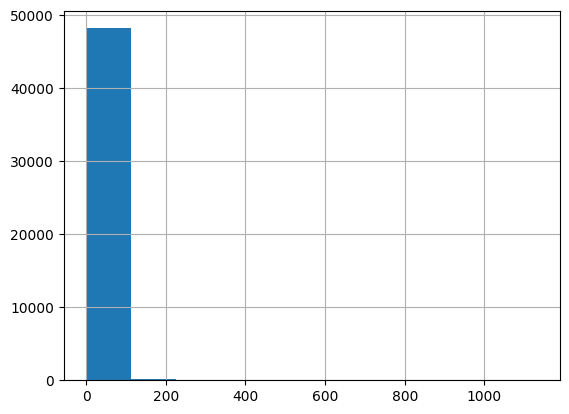

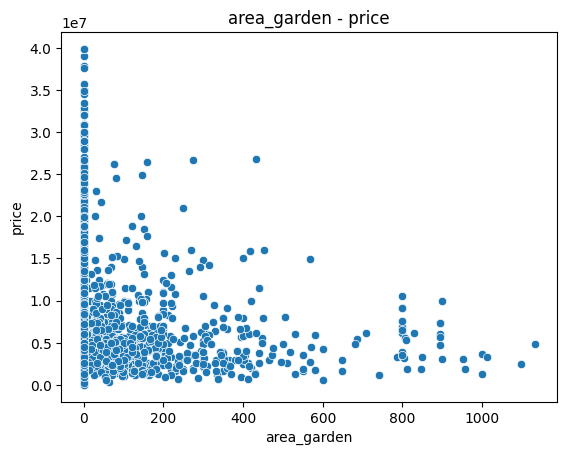

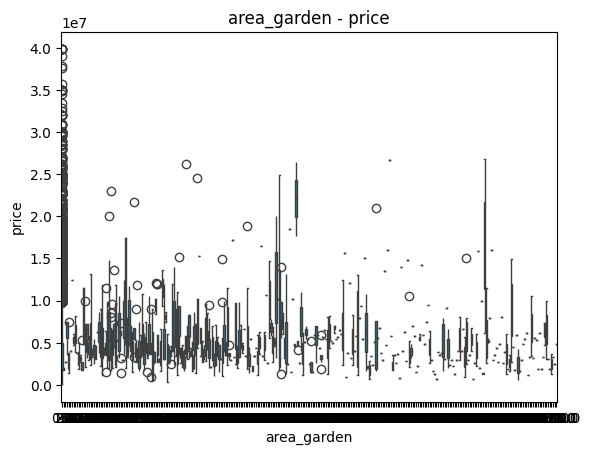

C:\Users\gracj\AppData\Local\Temp\ipykernel_12000\132873727.py:2: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  tmp = data.groupby(agg_feat).agg(
C:\Users\gracj\AppData\Local\Temp\ipykernel_12000\132873727.py:2: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  tmp = data.groupby(agg_feat).agg(


                  min_     perc_5    perc_25    perc_50          mean  \
area_garden                                                             
0.0             4400.0   720000.0  1800000.0  3090000.0  3.907457e+06   
1.0          1785000.0  1795500.0  1837500.0  1890000.0  1.890000e+06   
2.0          2690000.0  2690000.0  2690000.0  2690000.0  2.690000e+06   
3.0          3599000.0  3989100.0  5549500.0  7500000.0  6.199667e+06   
4.0          1450000.0  1526500.0  1832500.0  2280000.0  3.377500e+06   
...                ...        ...        ...        ...           ...   
957.0        1820000.0  1820000.0  1820000.0  1820000.0  1.820000e+06   
1000.0       1290000.0  1410495.0  1892475.0  2494950.0  2.494950e+06   
1013.0       3300000.0  3300000.0  3300000.0  3300000.0  3.300000e+06   
1098.0       2500000.0  2500000.0  2500000.0  2500000.0  2.500000e+06   
1132.0       4800000.0  4800000.0  4800000.0  4800000.0  4.800000e+06   

               perc_75    perc_95        max_    _

count    48589.000000
mean         0.088250
std          0.283662
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: garage_exist, dtype: float64

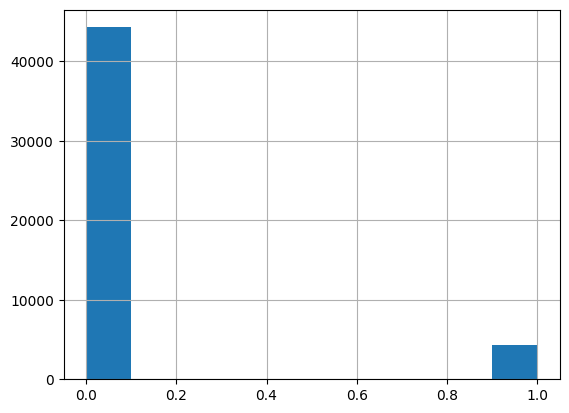

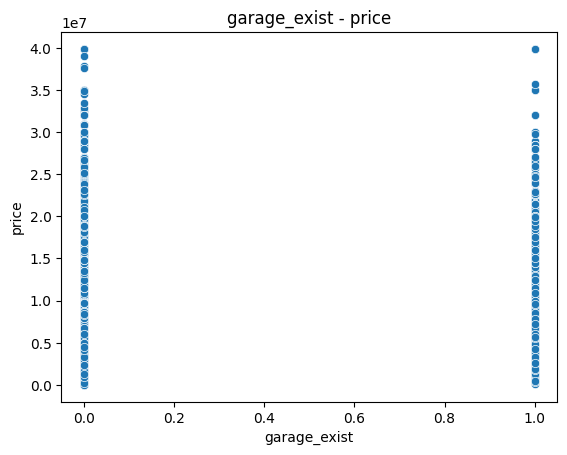

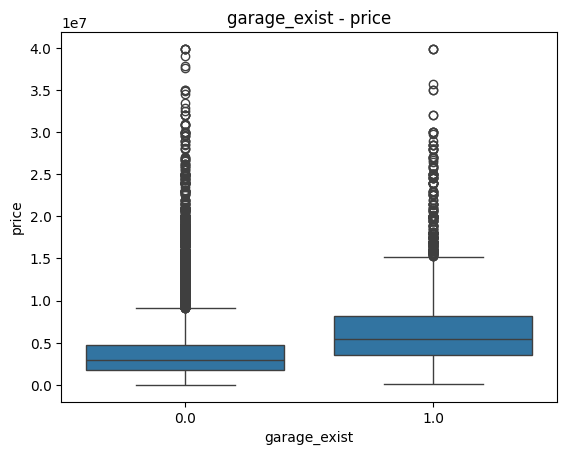

                  min_     perc_5    perc_25    perc_50          mean  \
garage_exist                                                            
0.0             4400.0   699000.0  1750000.0  2950000.0  3.682286e+06   
1.0           150000.0  1791750.0  3484425.0  5389312.0  6.542239e+06   

                perc_75     perc_95        max_    _n_  
garage_exist                                            
0.0           4710000.0   9000000.0  39900000.0  44301  
1.0           8199000.0  15145900.0  39900000.0   4288  
-------------------------------------------

garage


C:\Users\gracj\AppData\Local\Temp\ipykernel_12000\132873727.py:2: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  tmp = data.groupby(agg_feat).agg(
C:\Users\gracj\AppData\Local\Temp\ipykernel_12000\132873727.py:2: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  tmp = data.groupby(agg_feat).agg(


count    48589.000000
mean         0.134804
std          1.428614
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        215.000000
Name: garage, dtype: float64

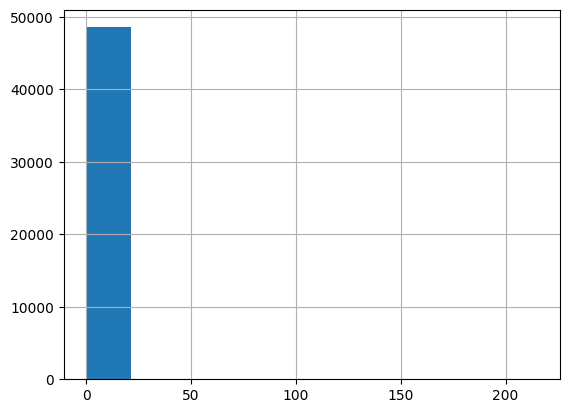

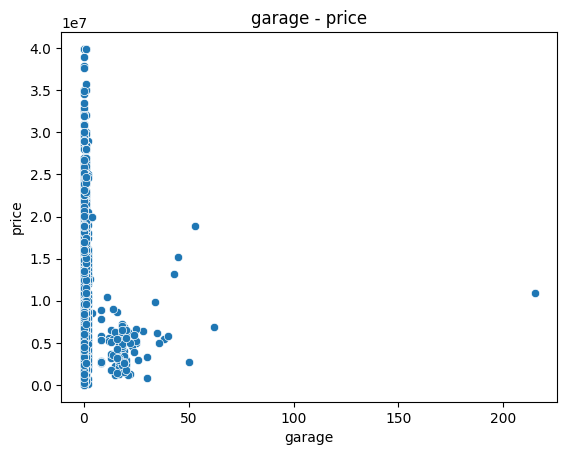

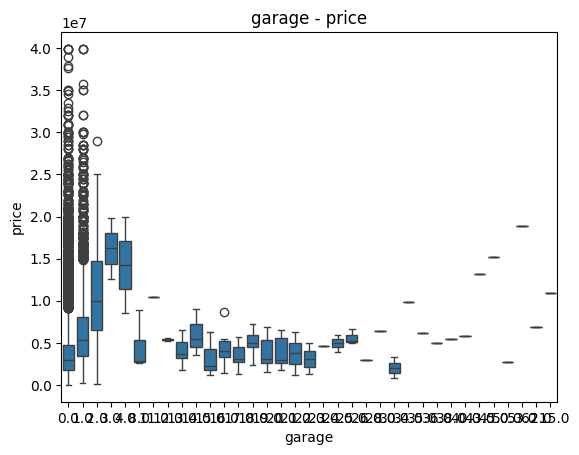

              min_       perc_5      perc_25     perc_50          mean  \
garage                                                                   
0.0         4400.0    699000.00   1750000.00   2950000.0  3.682286e+06   
1.0       270000.0   1800000.00   3489283.75   5327007.0  6.481684e+06   
2.0       150000.0   2276000.00   6524087.50   9999500.0  1.078405e+07   
3.0     12600000.0  12960420.70  14402103.50  16204207.0  1.620421e+07   
4.0      8590000.0   9155500.00  11417500.00  14245000.0  1.424500e+07   
8.0      2590000.0   2590000.00   2690000.00   2790000.0  4.307647e+06   
11.0    10500000.0  10500000.00  10500000.00  10500000.0  1.050000e+07   
12.0     5195000.0   5215250.00   5296250.00   5397500.0  5.397500e+06   
13.0     1790000.0   2082000.00   3250000.00   3690000.0  4.066000e+06   
14.0     3549000.0   3743500.00   4521500.00   5494000.0  6.014000e+06   
15.0     1190000.0   1300000.00   1740000.00   2290000.0  3.260000e+06   
16.0     1400000.0   1842303.75   3301

C:\Users\gracj\AppData\Local\Temp\ipykernel_12000\132873727.py:2: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  tmp = data.groupby(agg_feat).agg(
C:\Users\gracj\AppData\Local\Temp\ipykernel_12000\132873727.py:2: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  tmp = data.groupby(agg_feat).agg(


count         654
unique          3
top       Mezonet
freq          377
Name: flat_type, dtype: object

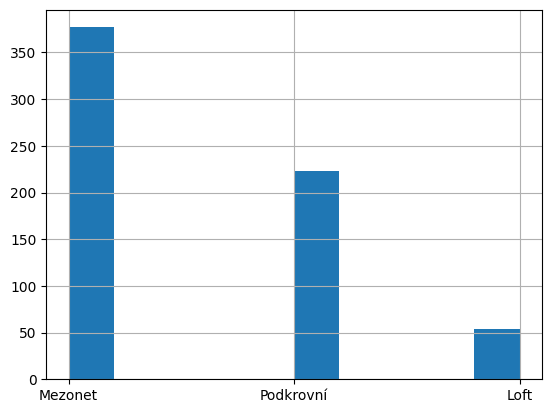

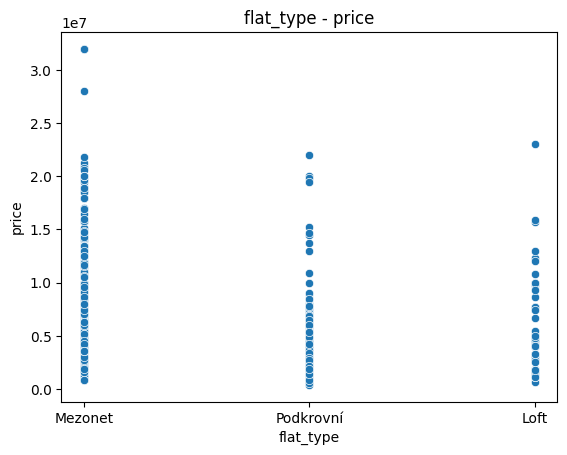

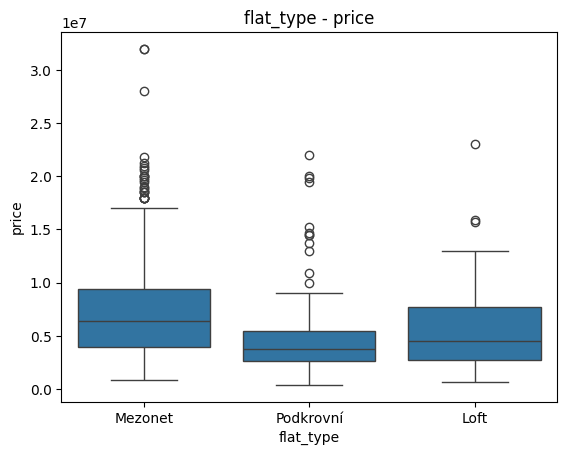

               min_     perc_5    perc_25    perc_50          mean    perc_75  \
flat_type                                                                       
Loft       690000.0  1241000.0  2705000.0  4490000.0  6.024791e+06  7680000.0   
Mezonet    805200.0  2183000.0  3990000.0  6422000.0  7.594790e+06  9400000.0   
Podkrovní  390000.0   904500.0  2672160.5  3800000.0  4.550159e+06  5428120.0   

              perc_95        max_  _n_  
flat_type                               
Loft       13931000.0  23000000.0   54  
Mezonet    18499200.0  32000000.0  377  
Podkrovní   9899000.0  22000000.0  223  
-------------------------------------------

latitude


C:\Users\gracj\AppData\Local\Temp\ipykernel_12000\132873727.py:2: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  tmp = data.groupby(agg_feat).agg(
C:\Users\gracj\AppData\Local\Temp\ipykernel_12000\132873727.py:2: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  tmp = data.groupby(agg_feat).agg(


count    48589.000000
mean        49.931756
std          0.452204
min         48.615063
25%         49.723526
50%         50.052627
75%         50.133717
max         51.002927
Name: latitude, dtype: float64

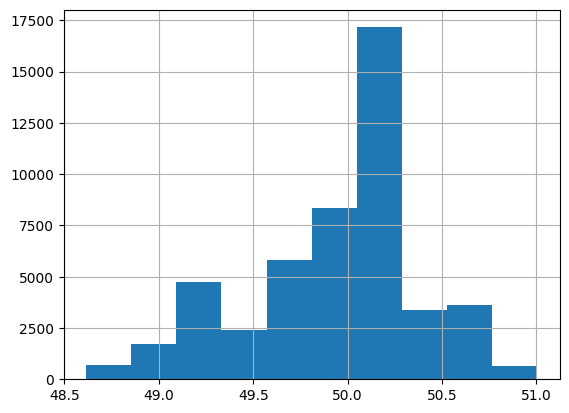

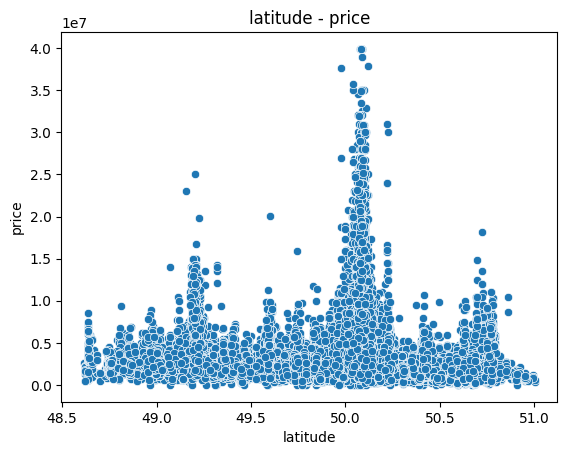

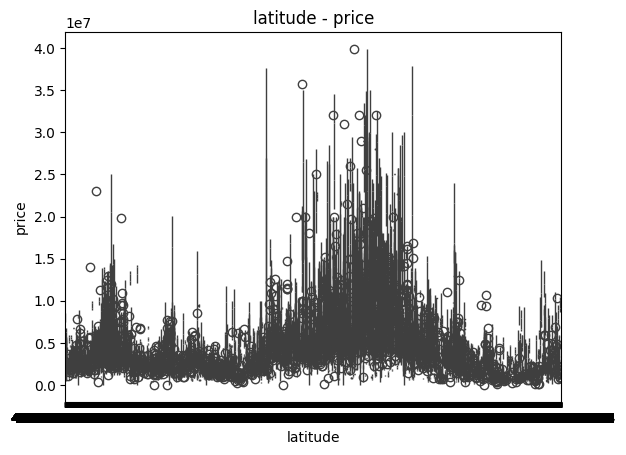

C:\Users\gracj\AppData\Local\Temp\ipykernel_12000\132873727.py:2: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  tmp = data.groupby(agg_feat).agg(


                min_     perc_5    perc_25    perc_50          mean  \
latitude                                                              
48.615063  2550000.0  2550000.0  2550000.0  2550000.0  2.550000e+06   
48.620189  1290000.0  1290000.0  1390000.0  1650000.0  1.628571e+06   
48.621283   502670.0   502670.0   502670.0   502670.0  5.026700e+05   
48.621842  1987000.0  1987000.0  1987000.0  1987000.0  1.987000e+06   
48.621920  2190000.0  2190000.0  2190000.0  2190000.0  2.190000e+06   
...              ...        ...        ...        ...           ...   
50.995139  1000000.0  1000000.0  1000000.0  1000000.0  1.000000e+06   
50.995956   950000.0   950000.0   950000.0   950000.0  9.500000e+05   
50.996144  1160000.0  1160000.0  1160000.0  1160000.0  1.160000e+06   
51.002399   340000.0   340000.0   340000.0   340000.0  3.400000e+05   
51.002927   580000.0   580000.0   580000.0   580000.0  5.800000e+05   

             perc_75    perc_95       max_  _n_  
latitude                  

C:\Users\gracj\AppData\Local\Temp\ipykernel_12000\132873727.py:2: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  tmp = data.groupby(agg_feat).agg(


count    48589.000000
mean        15.174653
std          1.537865
min         12.175032
25%         14.340703
50%         14.494988
75%         16.484631
max         18.774694
Name: longitude, dtype: float64

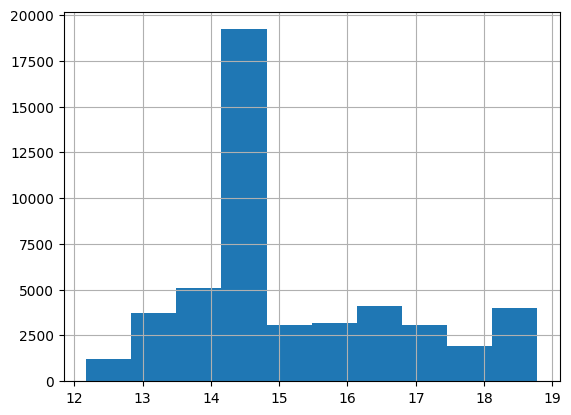

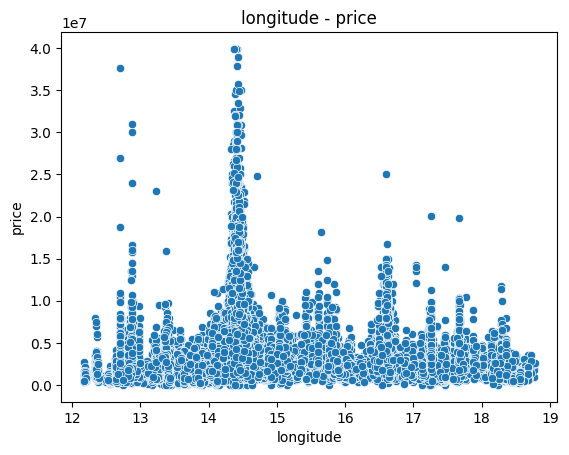

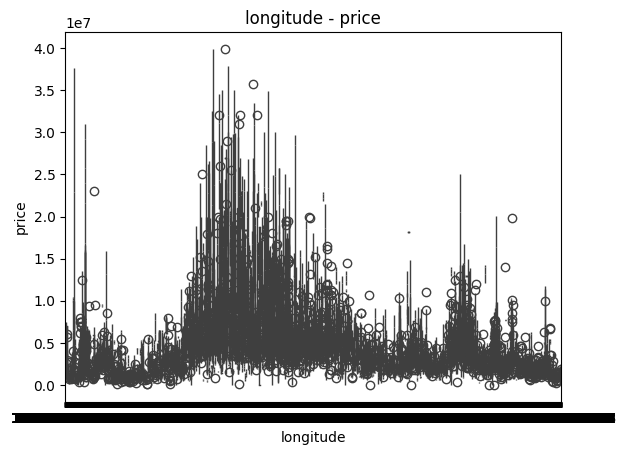

C:\Users\gracj\AppData\Local\Temp\ipykernel_12000\132873727.py:2: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  tmp = data.groupby(agg_feat).agg(


                min_     perc_5    perc_25    perc_50       mean    perc_75  \
longitude                                                                     
12.175032  1075000.0  1075000.0  1075000.0  1075000.0  1075000.0  1075000.0   
12.175795   547560.0   547560.0   547560.0   547560.0   547560.0   547560.0   
12.180959  1160000.0  1160000.0  1160000.0  1160000.0  1160000.0  1160000.0   
12.180963  1660000.0  1660000.0  1660000.0  1660000.0  1660000.0  1660000.0   
12.180972   360000.0   364500.0   382500.0   405000.0   405000.0   427500.0   
...              ...        ...        ...        ...        ...        ...   
18.720377  2890000.0  2890000.0  2890000.0  2890000.0  2890000.0  2890000.0   
18.759070   960000.0  1037000.0  1345000.0  1730000.0  1730000.0  2115000.0   
18.765051  1890000.0  1890000.0  1890000.0  1890000.0  1890000.0  1890000.0   
18.766016  1790000.0  1790000.0  1790000.0  1790000.0  1790000.0  1790000.0   
18.774694  2600000.0  2600000.0  2600000.0  2600000.

C:\Users\gracj\AppData\Local\Temp\ipykernel_12000\132873727.py:2: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  tmp = data.groupby(agg_feat).agg(


count    48589.000000
mean        14.898395
std          0.790767
min          8.389360
25%         14.430156
50%         14.946913
75%         15.422946
max         17.501887
Name: price_log, dtype: float64

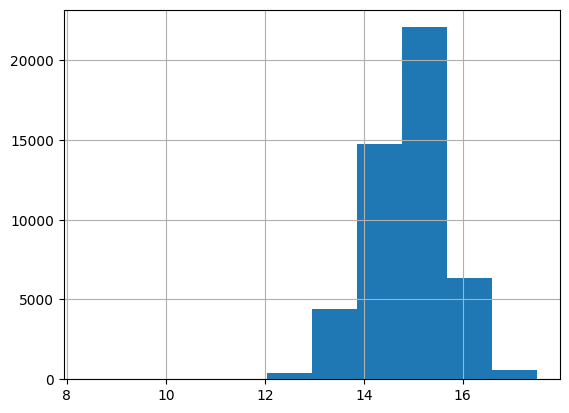

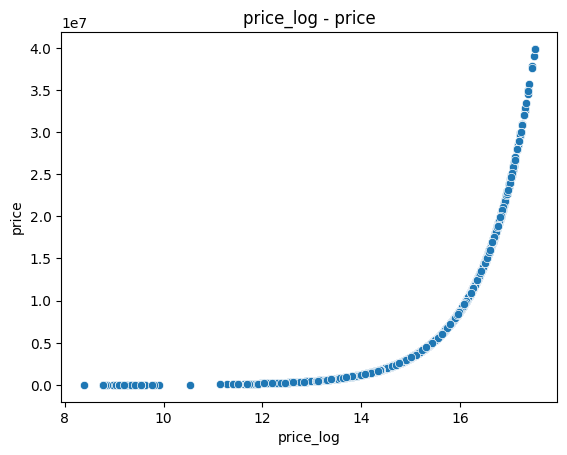

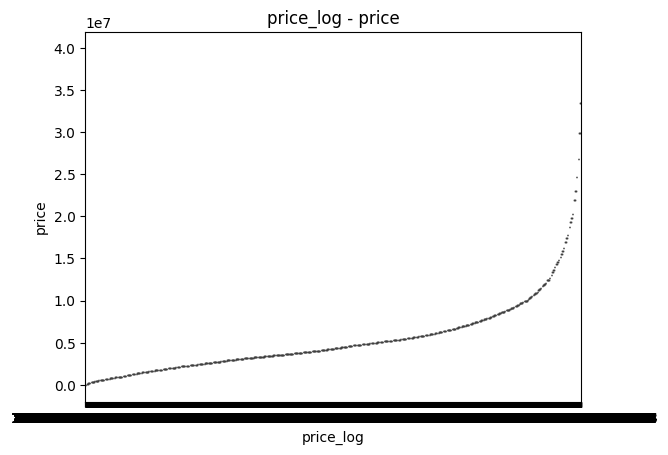

C:\Users\gracj\AppData\Local\Temp\ipykernel_12000\132873727.py:2: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  tmp = data.groupby(agg_feat).agg(


                 min_      perc_5     perc_25     perc_50        mean  \
price_log                                                               
8.389360       4400.0      4400.0      4400.0      4400.0      4400.0   
8.779557       6500.0      6500.0      6500.0      6500.0      6500.0   
8.824678       6800.0      6800.0      6800.0      6800.0      6800.0   
8.853665       7000.0      7000.0      7000.0      7000.0      7000.0   
8.987197       8000.0      8000.0      8000.0      8000.0      8000.0   
...               ...         ...         ...         ...         ...   
17.442781  37610000.0  37610000.0  37610000.0  37610000.0  37610000.0   
17.450462  37900000.0  37900000.0  37900000.0  37900000.0  37900000.0   
17.479072  39000000.0  39000000.0  39000000.0  39000000.0  39000000.0   
17.500457  39843000.0  39843000.0  39843000.0  39843000.0  39843000.0   
17.501887  39900000.0  39900000.0  39900000.0  39900000.0  39900000.0   

              perc_75     perc_95        max_  _n_

C:\Users\gracj\AppData\Local\Temp\ipykernel_12000\132873727.py:2: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  tmp = data.groupby(agg_feat).agg(


In [194]:
for col in df.columns:
    print()
    print(col)
    display(df[col].describe())
    df[col].hist()
    plt.figure()
    sns.scatterplot(x = col, y = 'price', data = df).set_title(f'{col} - price')
    plt.show()
    sns.boxplot(x = col, y = 'price', data = df).set_title(f'{col} - price')
    plt.show()
    print(agg_data_simple(df, col, 'price'))
    print('-------------------------------------------')


county


count        48589
unique         849
top       Praha 10
freq          2926
Name: county, dtype: object

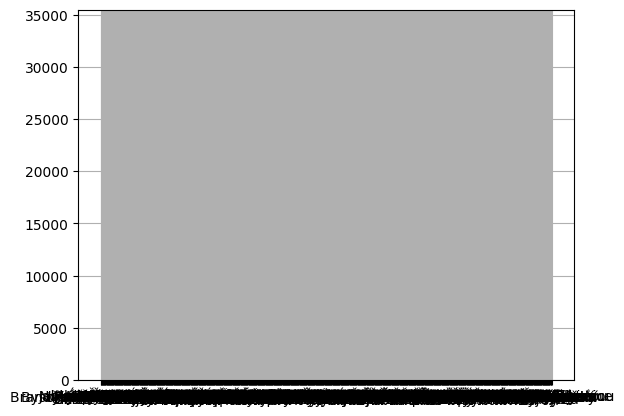

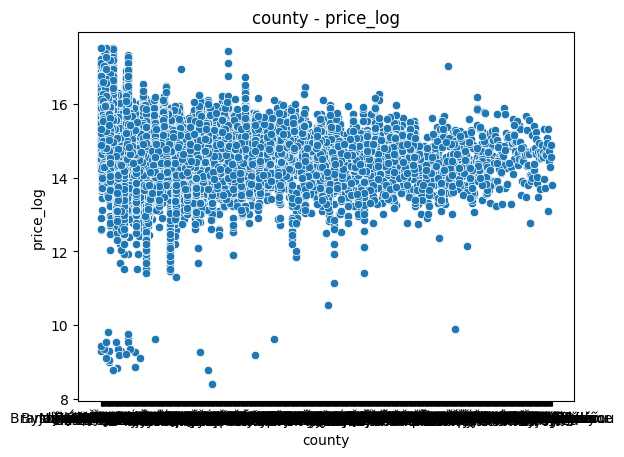

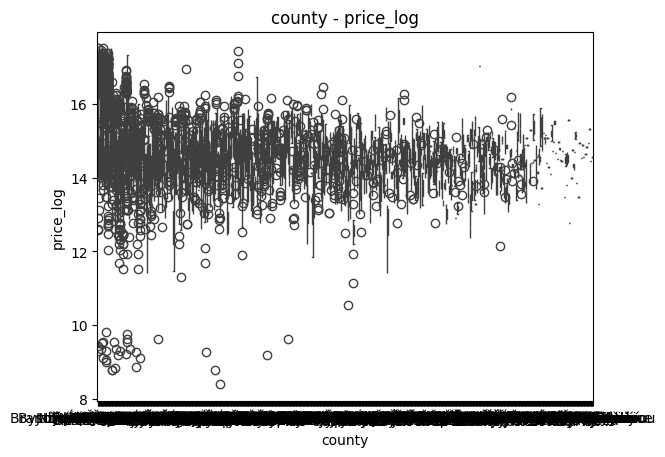

C:\Users\gracj\AppData\Local\Temp\ipykernel_12000\132873727.py:2: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  tmp = data.groupby(agg_feat).agg(


                        min_     perc_5    perc_25    perc_50       mean  \
county                                                                     
Abertamy           14.070153  14.102599  14.452087  14.978661  14.801938   
Adamov             13.445643  13.461806  13.729476  14.080521  14.167138   
Albrechtice        15.068274  15.068274  15.068274  15.068274  15.068274   
Aš                 12.793859  13.147126  13.503700  13.864301  13.777916   
Bakov nad Jizerou  14.346139  14.376367  14.497279  14.648420  14.635114   
...                      ...        ...        ...        ...        ...   
Železný Brod       13.527828  13.527828  13.537762  14.076734  14.085590   
Želešice           15.122491  15.149439  15.257229  15.391967  15.391967   
Židlochovice       13.235692  13.862381  14.573811  15.000282  14.791392   
Žlutice            12.899220  12.958784  13.197042  13.340522  13.299331   
Žďár nad Sázavou   14.077875  14.201826  14.552675  14.661379  14.642802   

           

C:\Users\gracj\AppData\Local\Temp\ipykernel_12000\132873727.py:2: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  tmp = data.groupby(agg_feat).agg(


count    48589.000000
mean         3.384758
std          0.950577
min         -1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          7.000000
Name: disposition, dtype: float64

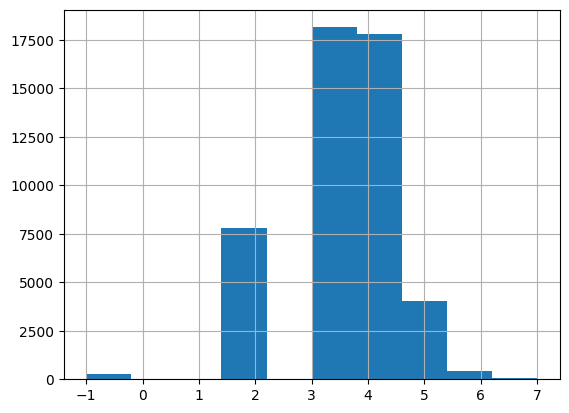

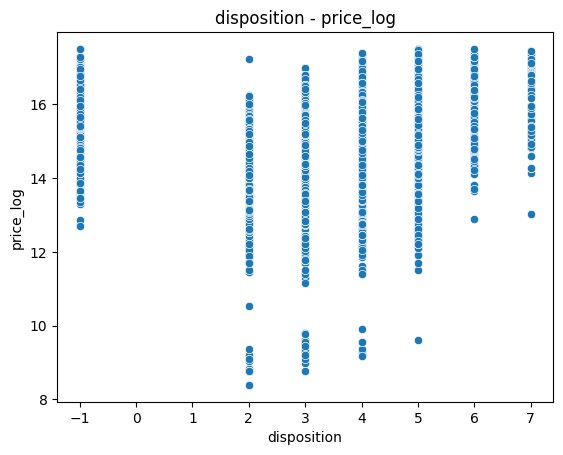

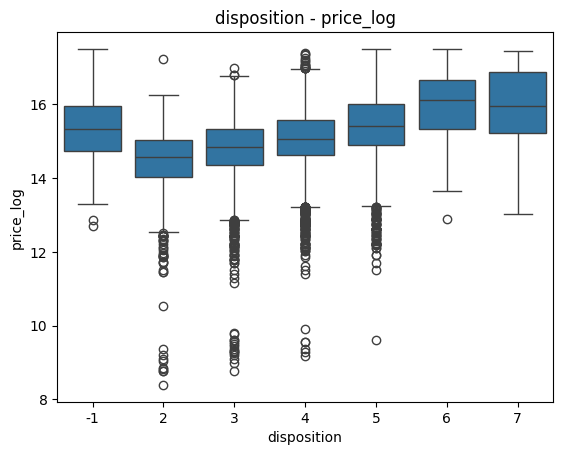

                  min_     perc_5    perc_25    perc_50       mean    perc_75  \
disposition                                                                     
-1           12.706848  13.652992  14.739699  15.317363  15.316535  15.945996   
 2            8.389360  13.118752  14.030622  14.557448  14.459605  15.039286   
 3            8.779557  13.444447  14.340239  14.845130  14.781481  15.319588   
 4            9.179881  13.753635  14.626441  15.065412  15.062822  15.564710   
 5            9.615805  13.864272  14.898162  15.424417  15.379721  16.007164   
 6           12.896717  14.508358  15.317363  16.108045  15.970543  16.648135   
 7           13.014778  14.459537  15.218430  15.955577  16.026996  16.883563   

               perc_95       max_    _n_  
disposition                               
-1           16.955257  17.501887    259  
 2           15.341317  17.215040   7797  
 3           15.746865  16.993564  18154  
 4           16.128684  17.390521  17823  
 5          

C:\Users\gracj\AppData\Local\Temp\ipykernel_12000\132873727.py:2: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  tmp = data.groupby(agg_feat).agg(
C:\Users\gracj\AppData\Local\Temp\ipykernel_12000\132873727.py:2: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  tmp = data.groupby(agg_feat).agg(


count    4.858900e+04
mean     3.934678e+06
std      3.287508e+06
min      4.400000e+03
25%      1.849000e+06
50%      3.100000e+06
75%      4.990000e+06
max      3.990000e+07
Name: price, dtype: float64

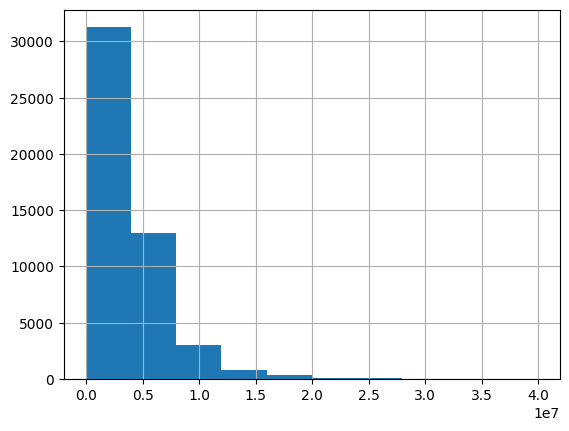

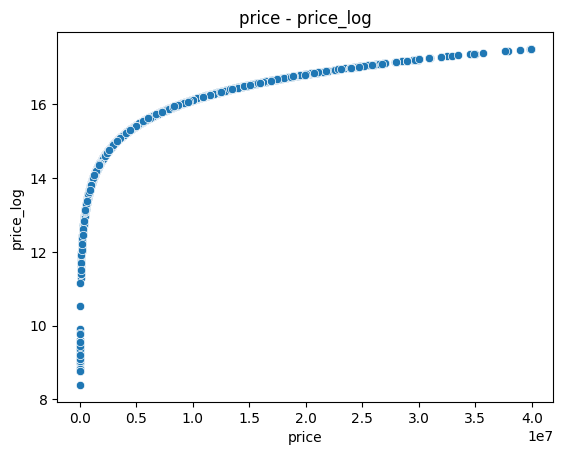

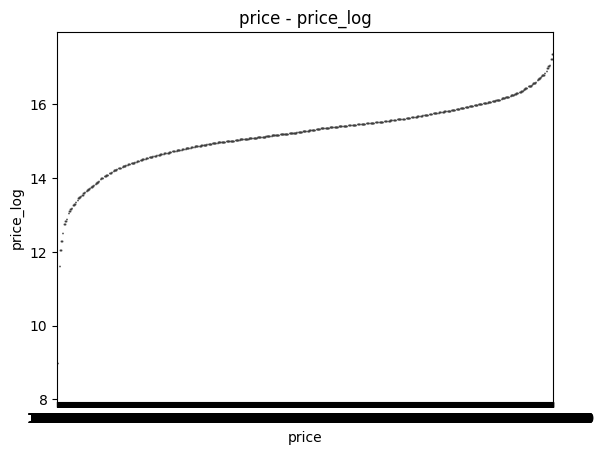

C:\Users\gracj\AppData\Local\Temp\ipykernel_12000\132873727.py:2: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  tmp = data.groupby(agg_feat).agg(


                 min_     perc_5    perc_25    perc_50       mean    perc_75  \
price                                                                          
4400.0       8.389360   8.389360   8.389360   8.389360   8.389360   8.389360   
6500.0       8.779557   8.779557   8.779557   8.779557   8.779557   8.779557   
6800.0       8.824678   8.824678   8.824678   8.824678   8.824678   8.824678   
7000.0       8.853665   8.853665   8.853665   8.853665   8.853665   8.853665   
8000.0       8.987197   8.987197   8.987197   8.987197   8.987197   8.987197   
...               ...        ...        ...        ...        ...        ...   
37610000.0  17.442781  17.442781  17.442781  17.442781  17.442781  17.442781   
37900000.0  17.450462  17.450462  17.450462  17.450462  17.450462  17.450462   
39000000.0  17.479072  17.479072  17.479072  17.479072  17.479072  17.479072   
39843000.0  17.500457  17.500457  17.500457  17.500457  17.500457  17.500457   
39900000.0  17.501887  17.501887  17.501

C:\Users\gracj\AppData\Local\Temp\ipykernel_12000\132873727.py:2: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  tmp = data.groupby(agg_feat).agg(


count       48589
unique          7
top       Cihlová
freq        23995
Name: structure, dtype: object

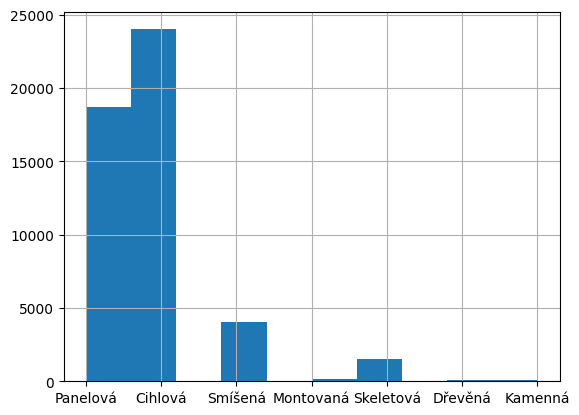

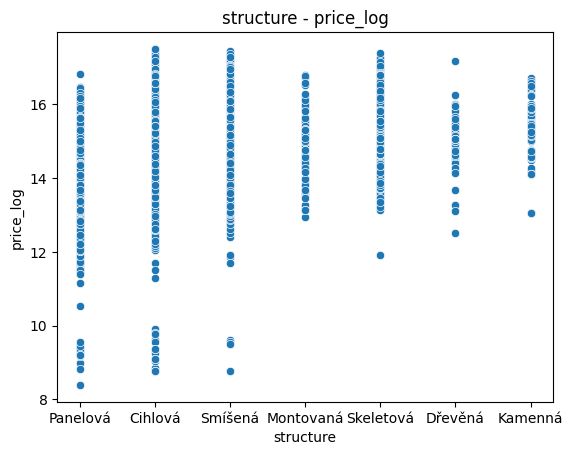

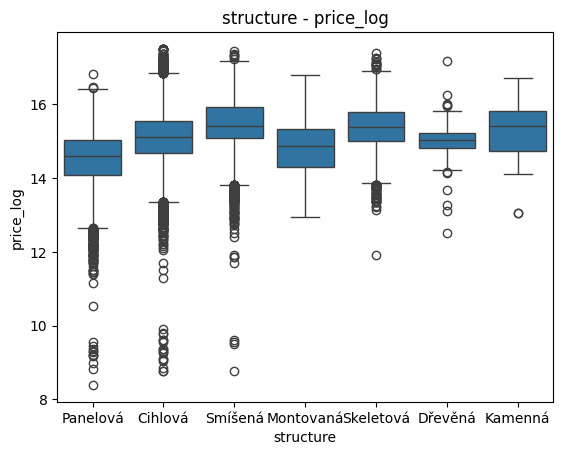

                min_     perc_5    perc_25    perc_50       mean    perc_75  \
structure                                                                     
Cihlová     8.779557  13.873779  14.669926  15.110238  15.091794  15.545395   
Dřevěná    12.506177  14.196439  14.805052  15.039286  14.989823  15.218908   
Kamenná    13.038982  14.115615  14.731801  15.422946  15.261316  15.827286   
Montovaná  12.948010  13.537455  14.293207  14.876767  14.850242  15.317363   
Panelová    8.389360  13.253392  14.070153  14.590238  14.506531  15.021481   
Skeletová  11.918391  14.158366  15.006398  15.387854  15.358429  15.783042   
Smíšená     8.779557  14.077875  15.083317  15.424748  15.385291  15.930561   

             perc_95       max_    _n_  
structure                               
Cihlová    16.245169  17.501887  23995  
Dřevěná    15.827369  17.165415    117  
Kamenná    16.511832  16.705882     59  
Montovaná  16.239748  16.801192    134  
Panelová   15.538277  16.810743  18719  
S

C:\Users\gracj\AppData\Local\Temp\ipykernel_12000\132873727.py:2: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  tmp = data.groupby(agg_feat).agg(
C:\Users\gracj\AppData\Local\Temp\ipykernel_12000\132873727.py:2: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  tmp = data.groupby(agg_feat).agg(


count    48589.000000
mean         7.199551
std          1.518384
min          1.000000
25%          6.000000
50%          8.000000
75%          8.000000
max          9.000000
Name: building_state, dtype: float64

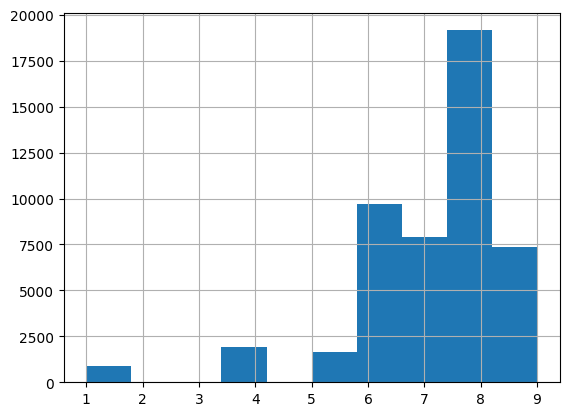

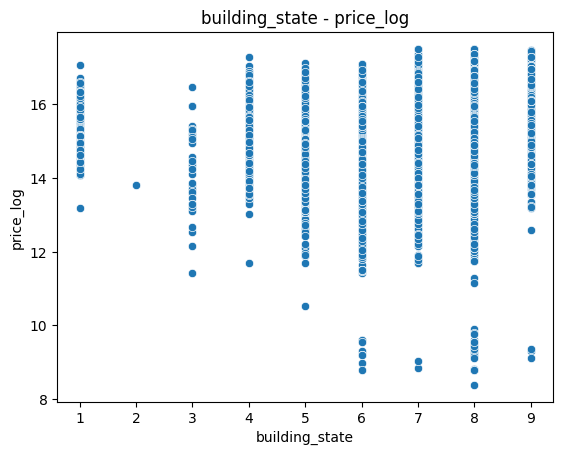

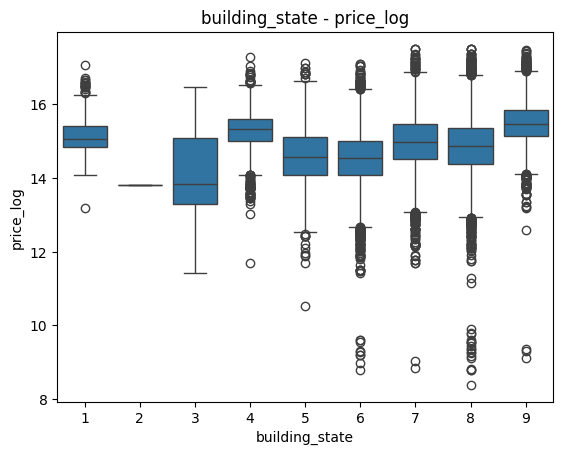

                     min_     perc_5    perc_25    perc_50       mean  \
building_state                                                          
1               13.171154  14.427197  14.841552  15.063896  15.144061   
2               13.815511  13.815511  13.815511  13.815511  13.815511   
3               11.407565  12.358140  13.287878  13.834544  14.076559   
4               11.695247  14.374753  14.994089  15.319588  15.299012   
5               10.532096  13.234888  14.077875  14.557448  14.560871   
6                8.779557  13.215854  14.070153  14.552675  14.507868   
7                8.853665  13.591116  14.503645  14.978661  14.936904   
8                8.389360  13.507626  14.375126  14.873301  14.839571   
9                9.104980  14.599412  15.149722  15.453276  15.472019   

                  perc_75    perc_95       max_    _n_  
building_state                                          
1               15.410339  16.101990  17.073222    864  
2               13.815511

C:\Users\gracj\AppData\Local\Temp\ipykernel_12000\132873727.py:2: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  tmp = data.groupby(agg_feat).agg(
C:\Users\gracj\AppData\Local\Temp\ipykernel_12000\132873727.py:2: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  tmp = data.groupby(agg_feat).agg(


count      48589
unique         3
top       Osobní
freq       41563
Name: ownership, dtype: object

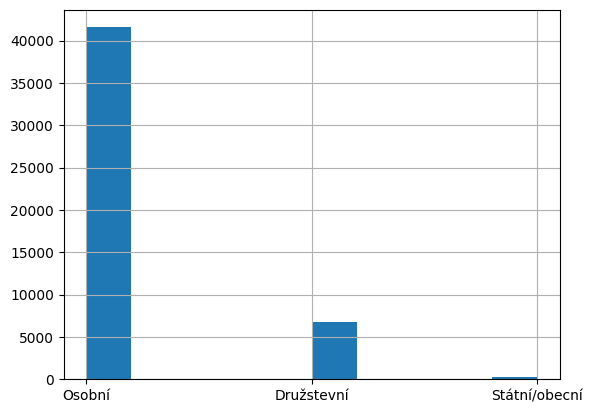

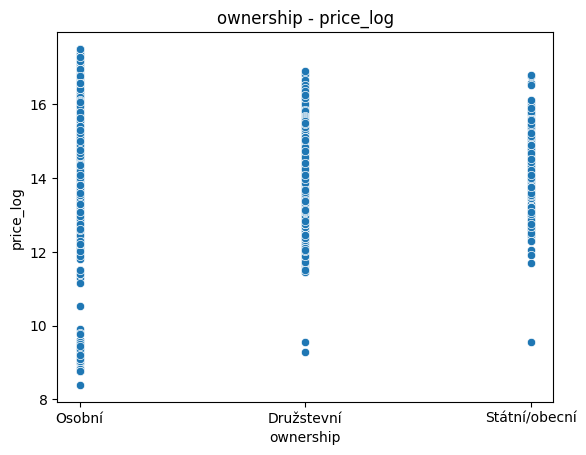

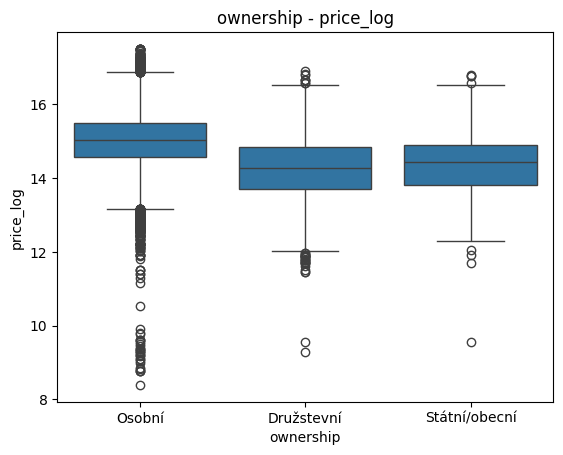

                   min_     perc_5    perc_25    perc_50       mean  \
ownership                                                             
Družstevní     9.287301  13.100118  13.709038  14.279245  14.289484   
Osobní         8.389360  13.698977  14.557448  15.036340  15.001076   
Státní/obecní  9.546813  12.594587  13.807979  14.430696  14.338962   

                 perc_75    perc_95       max_    _n_  
ownership                                              
Družstevní     14.845130  15.531378  16.906553   6815  
Osobní         15.481329  16.129911  17.501887  41563  
Státní/obecní  14.909043  15.816625  16.805225    211  
-------------------------------------------

floor


C:\Users\gracj\AppData\Local\Temp\ipykernel_12000\132873727.py:2: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  tmp = data.groupby(agg_feat).agg(
C:\Users\gracj\AppData\Local\Temp\ipykernel_12000\132873727.py:2: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  tmp = data.groupby(agg_feat).agg(


count    48589.000000
mean         3.446171
std          2.343972
min         -3.000000
25%          2.000000
50%          3.000000
75%          5.000000
max         24.000000
Name: floor, dtype: float64

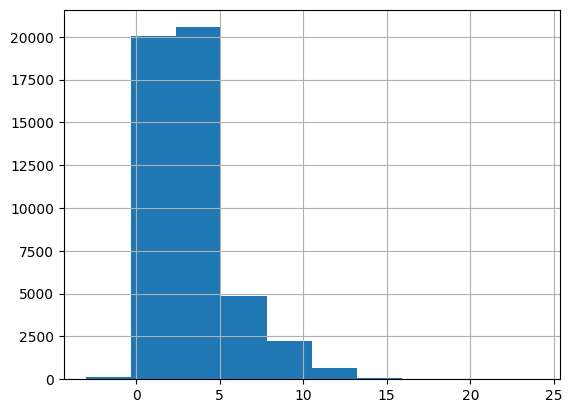

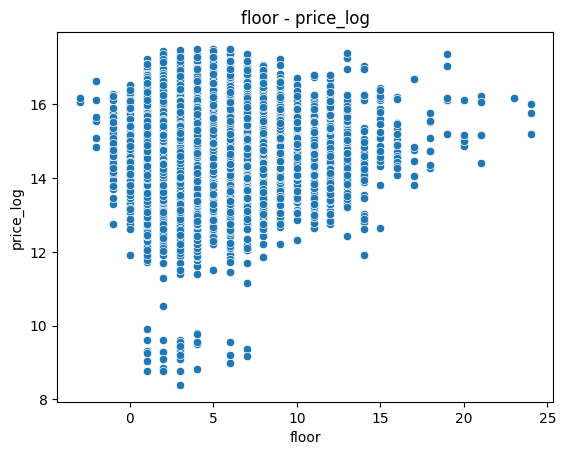

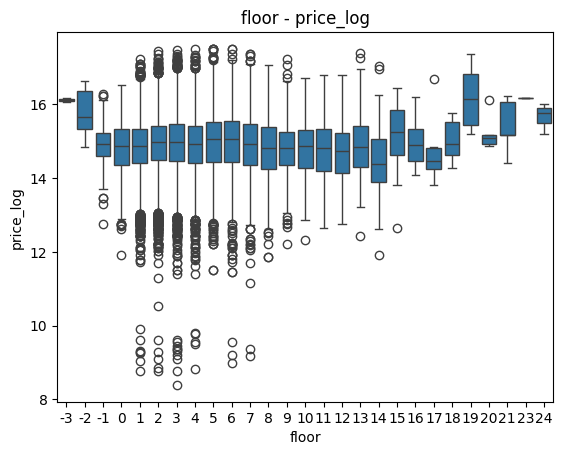

            min_     perc_5    perc_25    perc_50       mean    perc_75  \
floor                                                                     
-3     16.050789  16.056593  16.079813  16.108837  16.108837  16.137861   
-2     14.845130  14.917088  15.320483  15.647554  15.784102  16.365678   
-1     12.765688  13.781424  14.599412  14.910784  14.880356  15.216812   
 0     11.918391  13.301677  14.340239  14.876767  14.782662  15.341567   
 1      8.779557  13.554146  14.397726  14.880221  14.832955  15.319588   
 2      8.779557  13.579788  14.483340  14.977098  14.926043  15.422946   
 3      8.389360  13.527828  14.452087  14.978661  14.931483  15.454507   
 4      8.824678  13.457406  14.402742  14.930652  14.889971  15.422946   
 5     11.512925  13.384728  14.430696  15.065412  14.963656  15.520259   
 6      8.987197  13.444447  14.446782  15.048071  14.978862  15.554221   
 7      9.179881  13.384728  14.344579  14.910784  14.881694  15.465341   
 8     11.849398  13.2984

C:\Users\gracj\AppData\Local\Temp\ipykernel_12000\132873727.py:2: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  tmp = data.groupby(agg_feat).agg(
C:\Users\gracj\AppData\Local\Temp\ipykernel_12000\132873727.py:2: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  tmp = data.groupby(agg_feat).agg(


count    48589.000000
mean        67.361502
std         32.350657
min          2.000000
25%         50.000000
50%         63.000000
75%         78.000000
max        966.000000
Name: area, dtype: float64

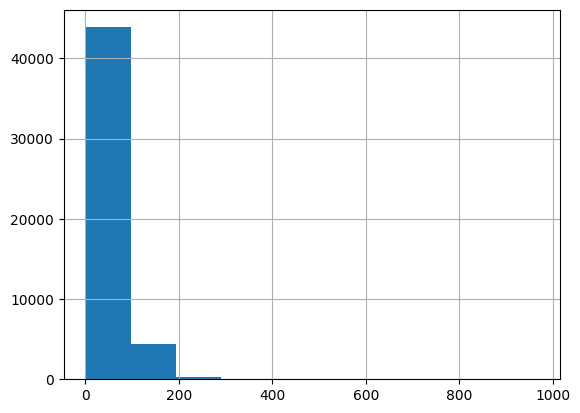

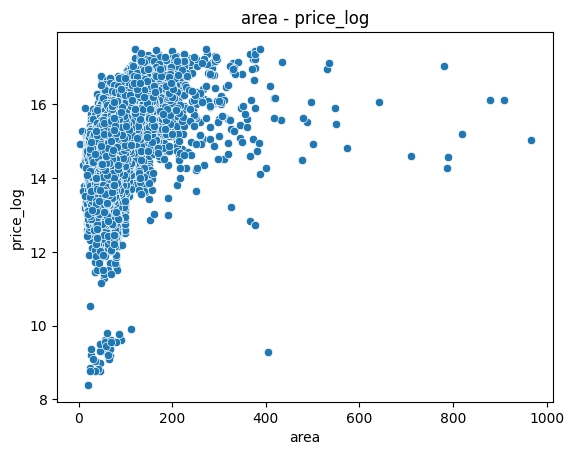

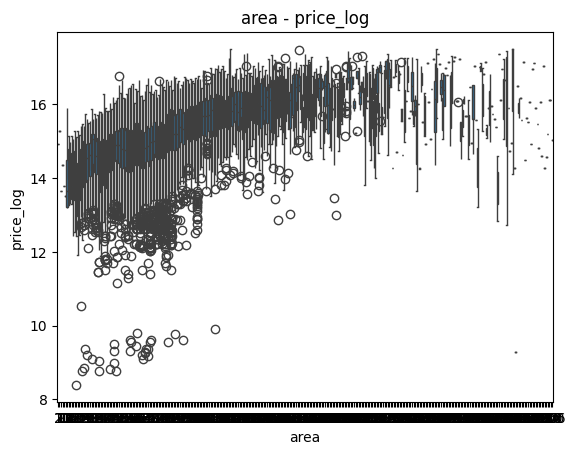

C:\Users\gracj\AppData\Local\Temp\ipykernel_12000\132873727.py:2: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  tmp = data.groupby(agg_feat).agg(


           min_     perc_5    perc_25    perc_50       mean    perc_75  \
area                                                                     
2     14.914123  14.914123  14.914123  14.914123  14.914123  14.914123   
7     15.280466  15.280466  15.280466  15.280466  15.280466  15.280466   
9     13.652992  13.652992  13.652992  13.652992  13.652992  13.652992   
10    14.346139  14.346139  14.346139  14.346139  14.346139  14.346139   
12    13.795308  13.795308  13.795308  13.795308  13.795308  13.795308   
...         ...        ...        ...        ...        ...        ...   
790   14.557448  14.557448  14.557448  14.557448  14.557448  14.557448   
820   15.201555  15.201555  15.201555  15.201555  15.201555  15.201555   
880   16.117095  16.117095  16.117095  16.117095  16.117095  16.117095   
910   16.108045  16.108045  16.108045  16.108045  16.108045  16.108045   
966   15.024471  15.024471  15.024471  15.024471  15.024471  15.024471   

        perc_95       max_  _n_  
are

C:\Users\gracj\AppData\Local\Temp\ipykernel_12000\132873727.py:2: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  tmp = data.groupby(agg_feat).agg(


count    48589.000000
mean         4.842475
std          2.495457
min          1.000000
25%          3.000000
50%          5.000000
75%          7.000000
max          8.000000
Name: energy_performance, dtype: float64

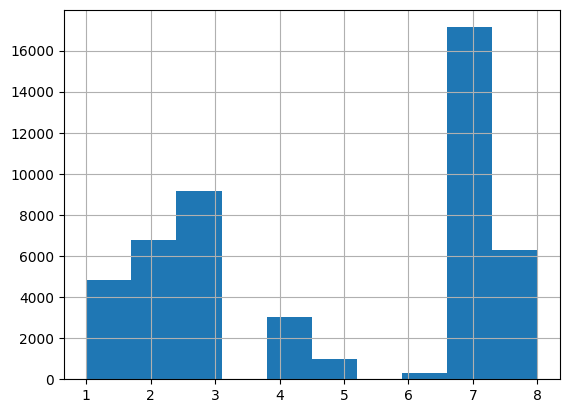

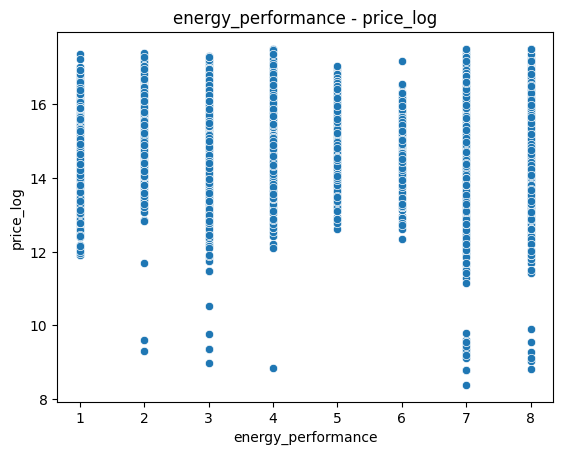

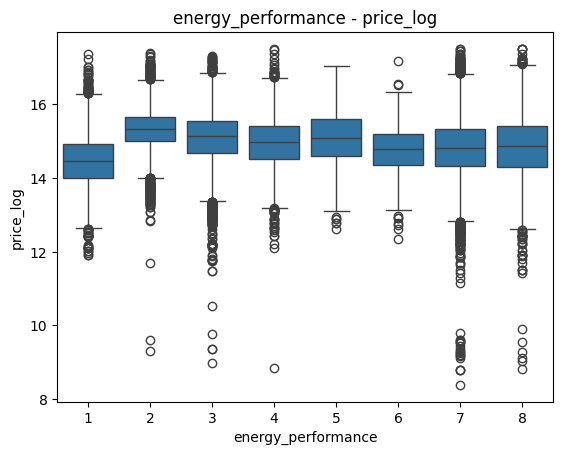

                         min_     perc_5    perc_25    perc_50       mean  \
energy_performance                                                          
1                   11.918391  13.253392  13.996998  14.457364  14.458954   
2                    9.305651  14.402742  14.995605  15.317363  15.322253   
3                    8.987197  13.764217  14.665661  15.147877  15.066399   
4                    8.853665  13.698977  14.508158  14.978661  14.937134   
5                   12.611538  13.666232  14.590195  15.082458  15.073934   
6                   12.341477  13.303017  14.339927  14.771022  14.765747   
7                    8.389360  13.429848  14.316286  14.805052  14.776507   
8                    8.824678  13.352535  14.285514  14.862830  14.824436   

                      perc_75    perc_95       max_    _n_  
energy_performance                                          
1                   14.914123  15.640060  17.356470   4830  
2                   15.663965  16.244728  17.3

C:\Users\gracj\AppData\Local\Temp\ipykernel_12000\132873727.py:2: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  tmp = data.groupby(agg_feat).agg(
C:\Users\gracj\AppData\Local\Temp\ipykernel_12000\132873727.py:2: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  tmp = data.groupby(agg_feat).agg(


count    48589.000000
mean         0.268559
std          0.443214
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: balcony_exist, dtype: float64

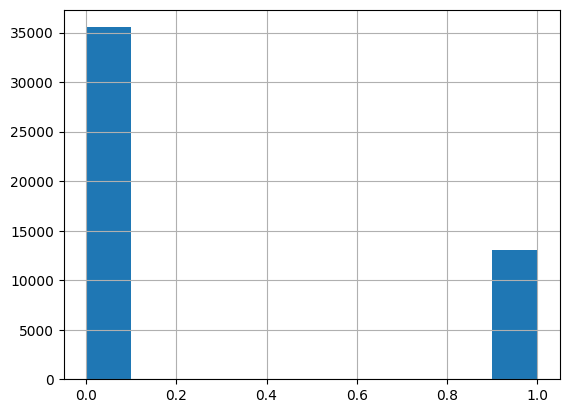

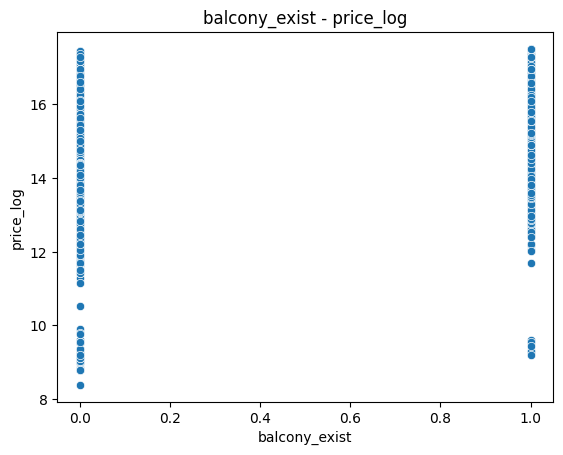

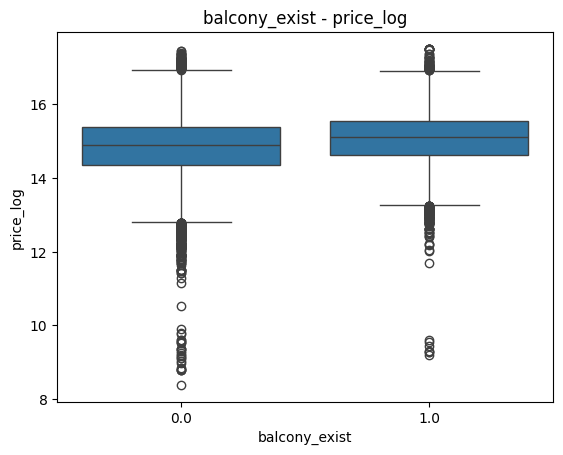

                   min_     perc_5    perc_25    perc_50       mean  \
balcony_exist                                                         
0.0            8.389360  13.429848  14.345550  14.897316  14.832762   
1.0            9.190138  13.864301  14.626441  15.096444  15.077149   

                 perc_75    perc_95       max_    _n_  
balcony_exist                                          
0.0            15.382041  16.055917  17.450462  35540  
1.0            15.547166  16.191810  17.501887  13049  
-------------------------------------------

balcony


C:\Users\gracj\AppData\Local\Temp\ipykernel_12000\132873727.py:2: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  tmp = data.groupby(agg_feat).agg(
C:\Users\gracj\AppData\Local\Temp\ipykernel_12000\132873727.py:2: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  tmp = data.groupby(agg_feat).agg(


count    48589.000000
mean         0.841981
std          4.909732
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        891.000000
Name: balcony, dtype: float64

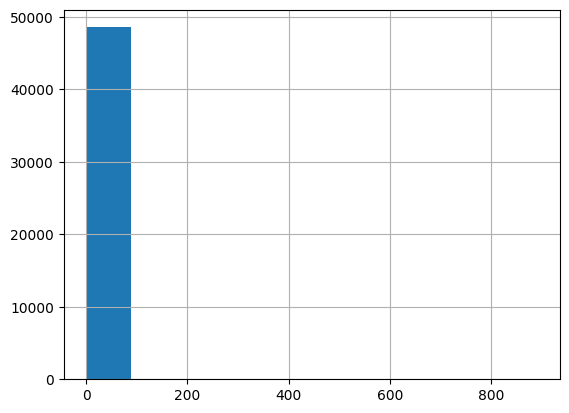

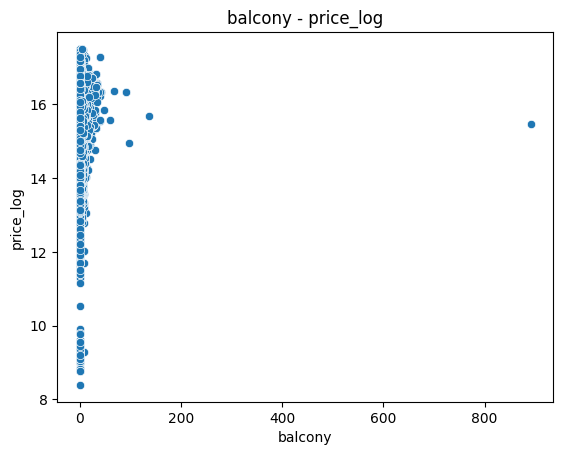

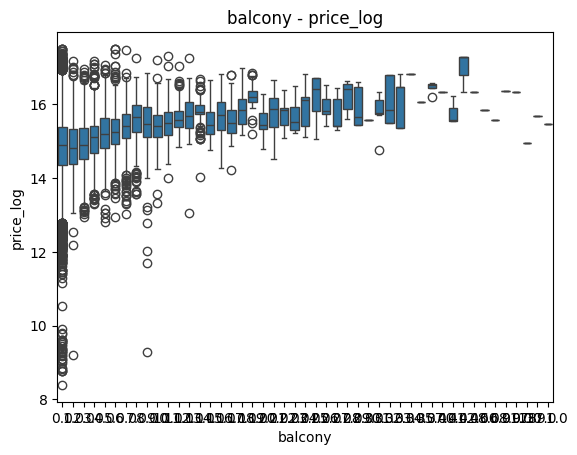

              min_     perc_5    perc_25    perc_50       mean    perc_75  \
balcony                                                                     
0.0       8.389360  13.444447  14.346139  14.887094  14.836967  15.373655   
1.0       9.190138  13.579151  14.374983  14.808762  14.835172  15.319588   
2.0      12.936034  13.864301  14.503645  14.897316  14.949615  15.360943   
3.0      13.303017  14.177337  14.669926  15.107737  15.076576  15.404584   
4.0      12.821258  14.220976  14.808762  15.204299  15.235151  15.618710   
5.0      12.948010  14.340239  14.910003  15.250595  15.269161  15.599540   
6.0      13.014778  14.399983  15.080272  15.414898  15.395034  15.736877   
7.0      13.565766  14.734995  15.251967  15.666725  15.557616  15.983289   
8.0       9.277999  14.447809  15.104743  15.454507  15.418973  15.930561   
9.0      13.321214  14.519961  15.123843  15.424948  15.395289  15.716871   
10.0     13.993657  14.603406  15.174811  15.500056  15.485597  15.803799   

C:\Users\gracj\AppData\Local\Temp\ipykernel_12000\132873727.py:2: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  tmp = data.groupby(agg_feat).agg(
C:\Users\gracj\AppData\Local\Temp\ipykernel_12000\132873727.py:2: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  tmp = data.groupby(agg_feat).agg(


count    48589.000000
mean         0.490193
std          0.499909
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: elevator, dtype: float64

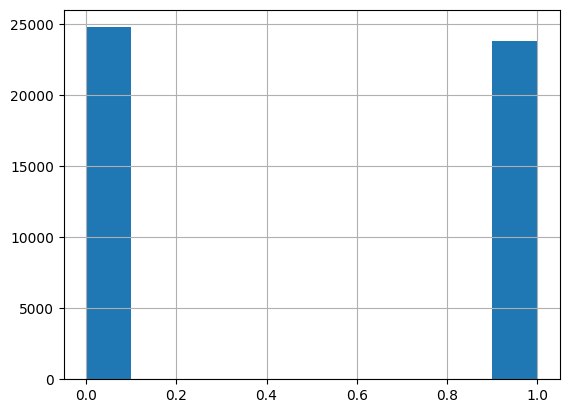

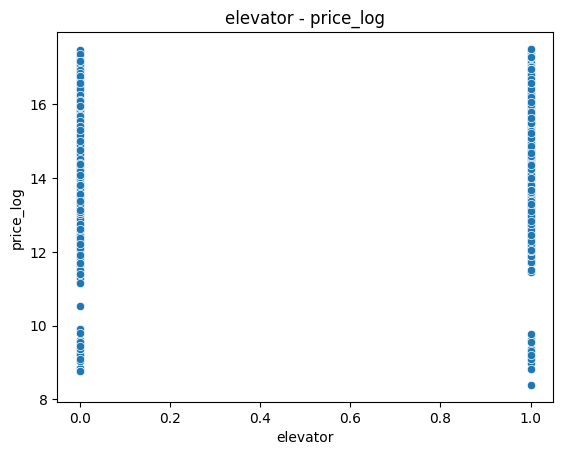

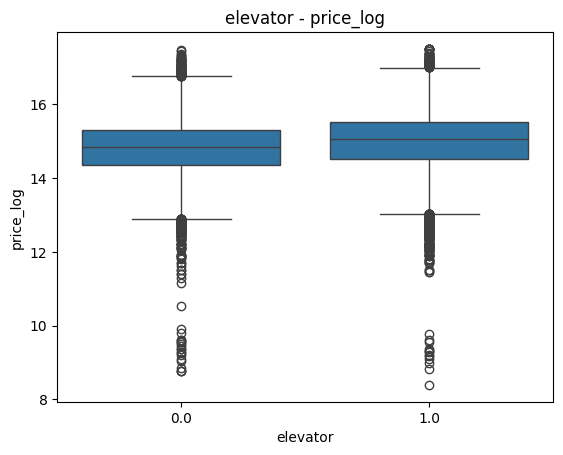

              min_     perc_5    perc_25    perc_50       mean    perc_75  \
elevator                                                                    
0.0       8.779557  13.526494  14.345550  14.837961  14.811867  15.310659   
1.0       8.389360  13.458813  14.518608  15.068274  14.988385  15.512936   

            perc_95       max_    _n_  
elevator                               
0.0       16.009268  17.479072  24771  
1.0       16.199499  17.501887  23818  
-------------------------------------------

cellar_exist


C:\Users\gracj\AppData\Local\Temp\ipykernel_12000\132873727.py:2: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  tmp = data.groupby(agg_feat).agg(
C:\Users\gracj\AppData\Local\Temp\ipykernel_12000\132873727.py:2: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  tmp = data.groupby(agg_feat).agg(


count    48589.000000
mean         0.660643
std          0.473496
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: cellar_exist, dtype: float64

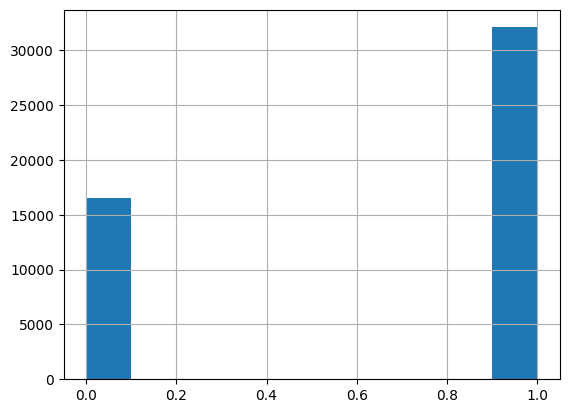

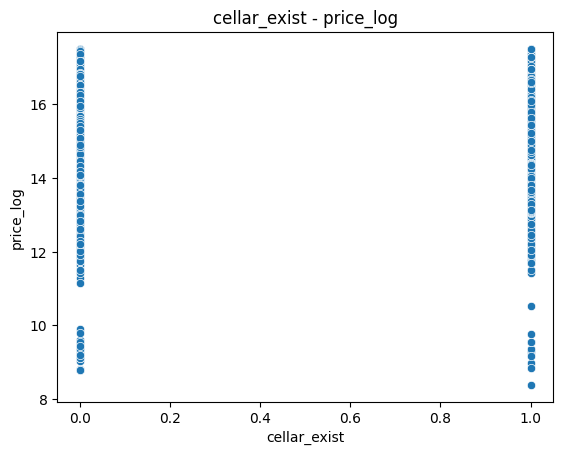

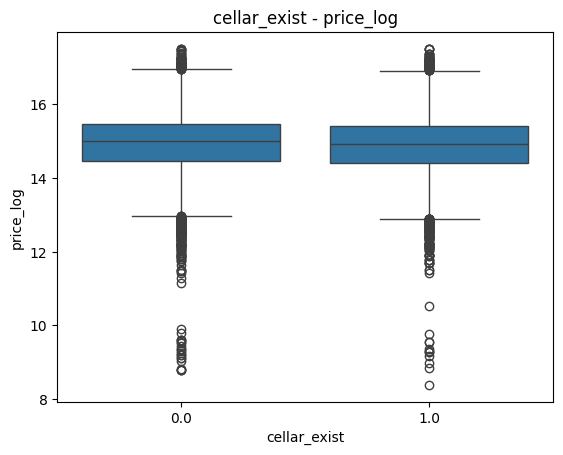

                  min_     perc_5    perc_25    perc_50       mean    perc_75  \
cellar_exist                                                                    
0.0           8.779557  13.444447  14.457364  15.009433  14.925682  15.454507   
1.0           8.389360  13.527828  14.402742  14.910784  14.884378  15.408819   

                perc_95       max_    _n_  
cellar_exist                               
0.0           16.147208  17.501887  16489  
1.0           16.083386  17.501887  32100  
-------------------------------------------

cellar


C:\Users\gracj\AppData\Local\Temp\ipykernel_12000\132873727.py:2: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  tmp = data.groupby(agg_feat).agg(
C:\Users\gracj\AppData\Local\Temp\ipykernel_12000\132873727.py:2: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  tmp = data.groupby(agg_feat).agg(


count    48589.000000
mean         1.364445
std          3.423013
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max         86.000000
Name: cellar, dtype: float64

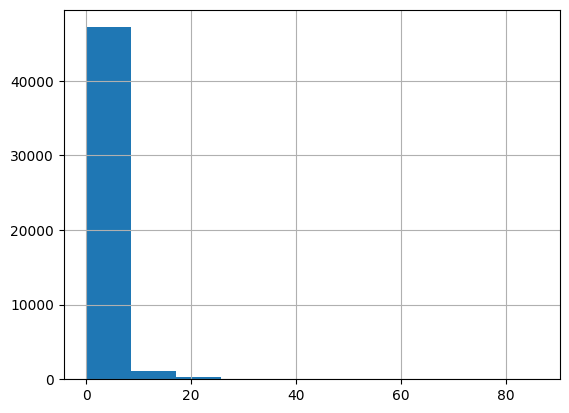

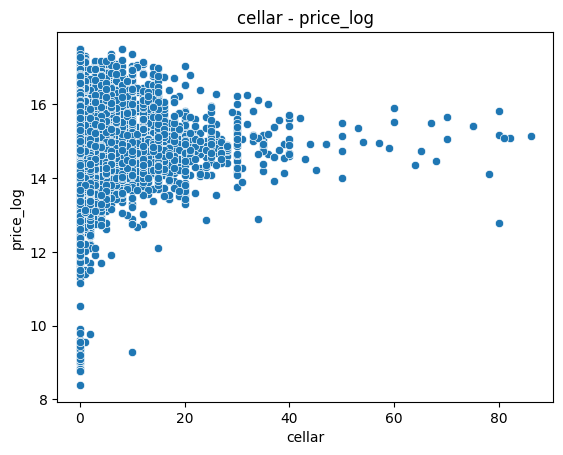

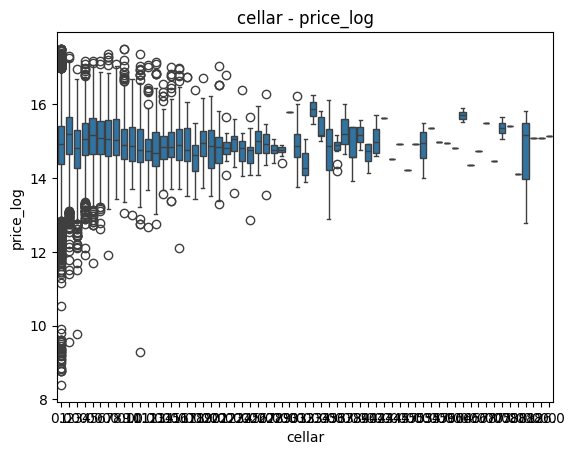

             min_     perc_5    perc_25    perc_50       mean    perc_75  \
cellar                                                                     
0.0      8.389360  13.444447  14.387055  14.913804  14.868229  15.418930   
1.0      9.546813  13.664688  14.644062  15.181602  15.072953  15.666725   
2.0      9.769956  13.398479  14.285514  14.827111  14.747740  15.297200   
3.0     11.918391  13.864301  14.626441  15.065412  15.022129  15.481707   
4.0     11.695247  13.858857  14.648420  15.163584  15.125766  15.631963   
...           ...        ...        ...        ...        ...        ...   
78.0    14.115615  14.115615  14.115615  14.115615  14.115615  14.115615   
80.0    12.793859  13.032122  13.985173  15.176487  14.593519  15.493349   
81.0    15.096167  15.096167  15.096167  15.096167  15.096167  15.096167   
82.0    15.096444  15.096444  15.096444  15.096444  15.096444  15.096444   
86.0    15.134596  15.134596  15.134596  15.134596  15.134596  15.134596   

          p

C:\Users\gracj\AppData\Local\Temp\ipykernel_12000\132873727.py:2: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  tmp = data.groupby(agg_feat).agg(
C:\Users\gracj\AppData\Local\Temp\ipykernel_12000\132873727.py:2: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  tmp = data.groupby(agg_feat).agg(


count    48589.000000
mean         0.228632
std          0.350605
min          0.000000
25%          0.000000
50%          0.000000
75%          0.500000
max          1.000000
Name: furnished, dtype: float64

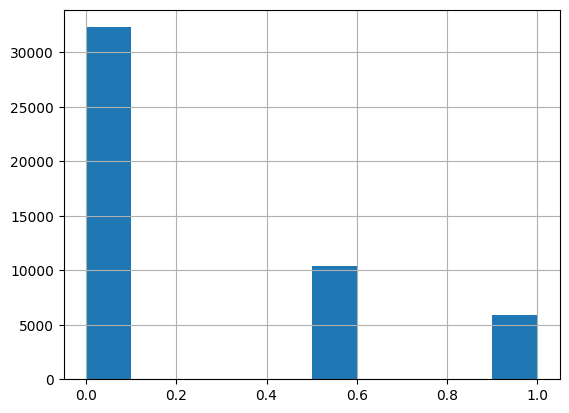

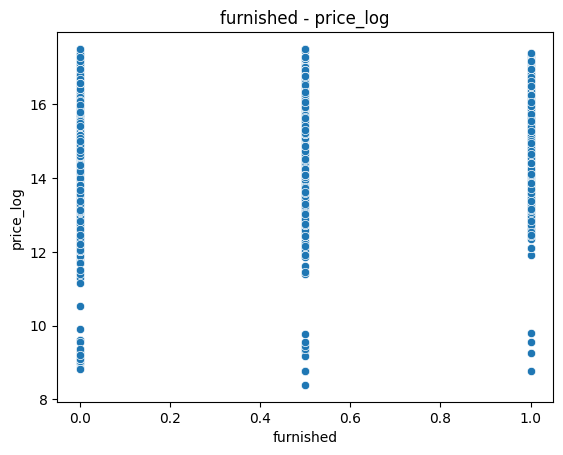

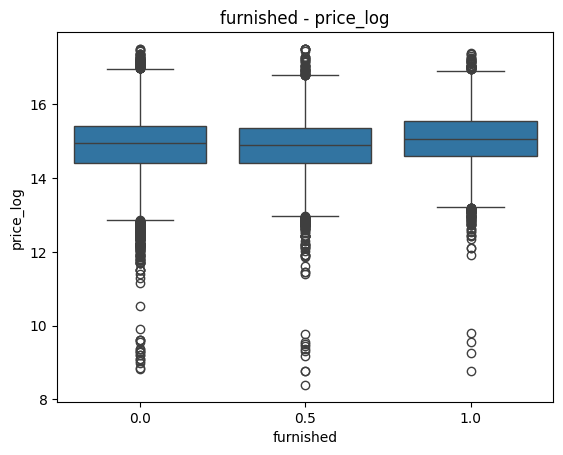

               min_     perc_5    perc_25    perc_50       mean    perc_75  \
furnished                                                                    
0.0        8.824678  13.457406  14.397726  14.946909  14.887568  15.422946   
0.5        8.389360  13.527828  14.403297  14.897316  14.849407  15.363073   
1.0        8.779557  13.641157  14.603968  15.068274  15.043481  15.538099   

             perc_95       max_    _n_  
furnished                               
0.0        16.097893  17.501887  32287  
0.5        15.955577  17.501887  10386  
1.0        16.291208  17.390521   5916  
-------------------------------------------

barrier_free


C:\Users\gracj\AppData\Local\Temp\ipykernel_12000\132873727.py:2: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  tmp = data.groupby(agg_feat).agg(
C:\Users\gracj\AppData\Local\Temp\ipykernel_12000\132873727.py:2: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  tmp = data.groupby(agg_feat).agg(


count    48589.000000
mean         0.141925
std          0.348977
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: barrier_free, dtype: float64

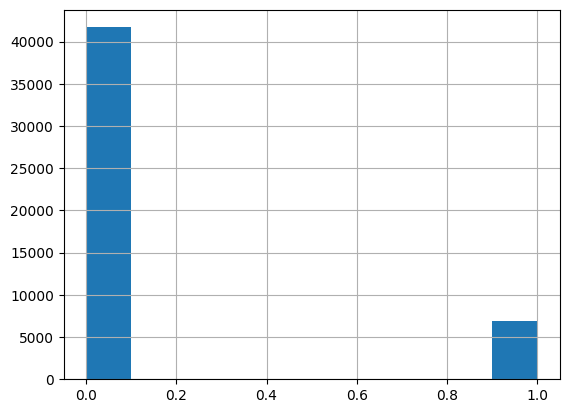

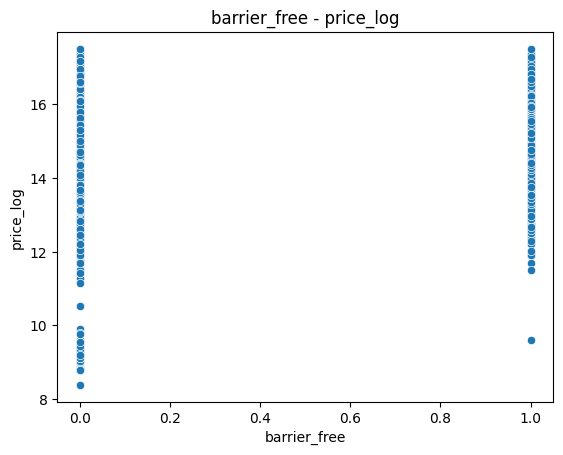

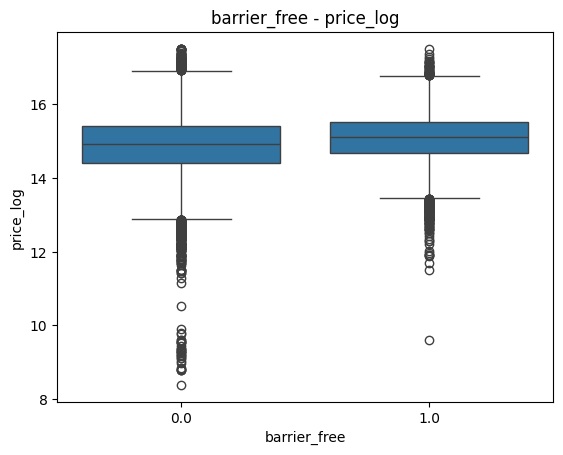

                  min_     perc_5    perc_25    perc_50       mean    perc_75  \
barrier_free                                                                    
0.0           8.389360  13.457406  14.392124  14.910784  14.869460  15.404746   
1.0           9.615805  13.752871  14.686804  15.121137  15.073331  15.518439   

                perc_95       max_    _n_  
barrier_free                               
0.0           16.089321  17.501887  41693  
1.0           16.174434  17.500457   6896  
-------------------------------------------

lodge_exist


C:\Users\gracj\AppData\Local\Temp\ipykernel_12000\132873727.py:2: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  tmp = data.groupby(agg_feat).agg(
C:\Users\gracj\AppData\Local\Temp\ipykernel_12000\132873727.py:2: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  tmp = data.groupby(agg_feat).agg(


count    48589.000000
mean         0.235897
std          0.424563
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: lodge_exist, dtype: float64

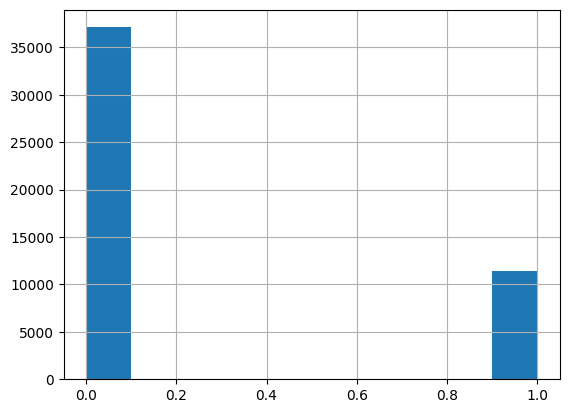

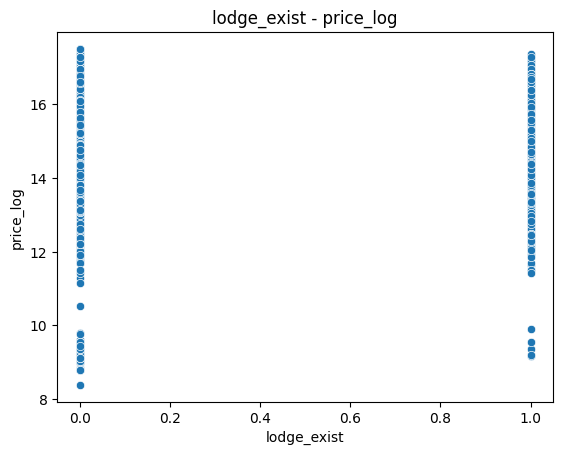

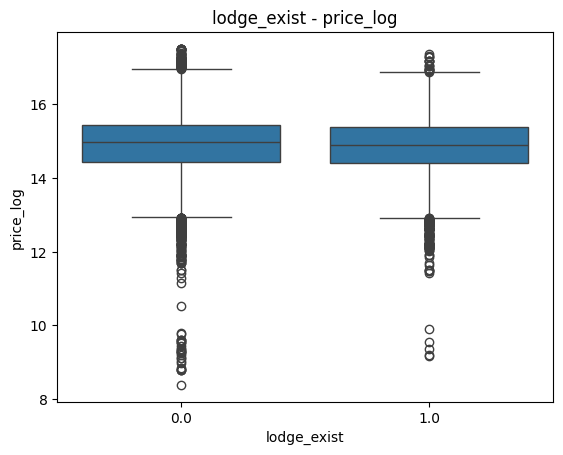

                 min_     perc_5    perc_25    perc_50       mean    perc_75  \
lodge_exist                                                                    
0.0          8.389360  13.500800  14.436087  14.975531  14.922673  15.444003   
1.0          9.179881  13.487006  14.391281  14.880221  14.819754  15.382041   

               perc_95       max_    _n_  
lodge_exist                               
0.0          16.130681  17.501887  37127  
1.0          15.883575  17.370859  11462  
-------------------------------------------

lodge


C:\Users\gracj\AppData\Local\Temp\ipykernel_12000\132873727.py:2: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  tmp = data.groupby(agg_feat).agg(
C:\Users\gracj\AppData\Local\Temp\ipykernel_12000\132873727.py:2: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  tmp = data.groupby(agg_feat).agg(


count    48589.000000
mean         0.566116
std          2.146133
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        111.000000
Name: lodge, dtype: float64

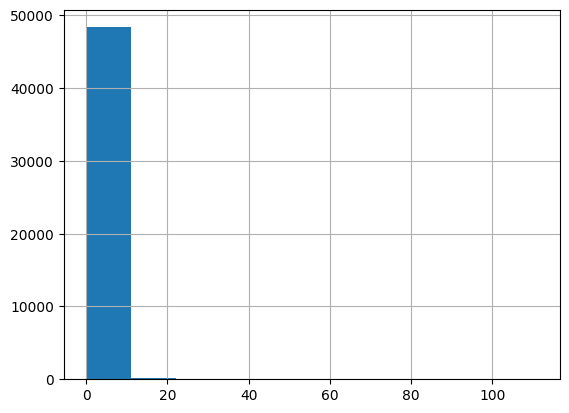

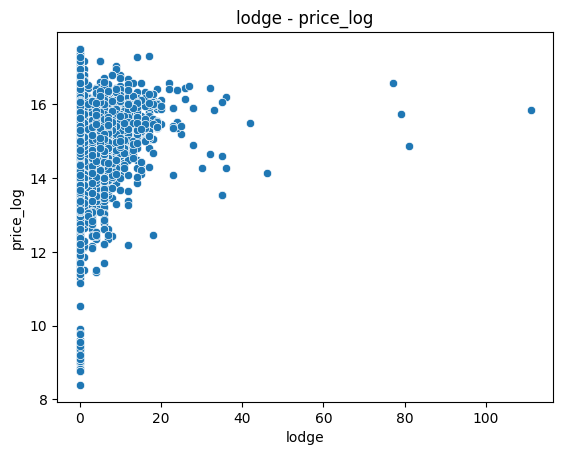

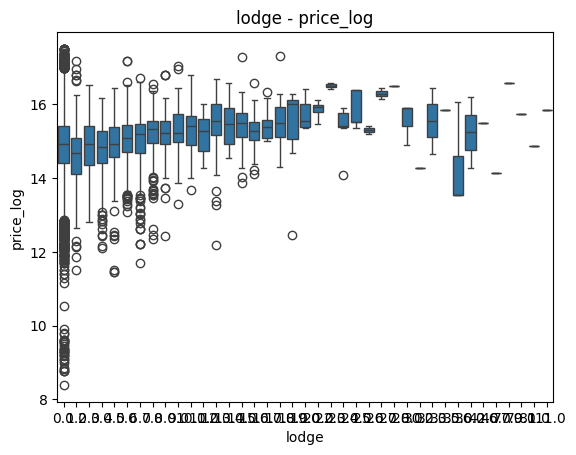

            min_     perc_5    perc_25    perc_50       mean    perc_75  \
lodge                                                                     
0.0     8.389360  13.458693  14.397726  14.930980  14.887900  15.422946   
1.0    11.512925  13.384728  14.096535  14.681017  14.616232  15.087375   
2.0    12.821258  13.607523  14.361748  14.912287  14.860841  15.424448   
3.0    12.095141  13.651814  14.402742  14.845130  14.787629  15.274126   
4.0    11.461632  13.861908  14.557448  14.912455  14.915961  15.373655   
5.0    13.081541  14.123359  14.701336  15.088060  15.069098  15.444751   
6.0    11.695247  13.760899  14.690979  15.198587  15.045759  15.464169   
7.0    12.341477  14.397726  14.962754  15.319588  15.228001  15.538277   
8.0    12.429216  14.132050  14.910784  15.226498  15.181430  15.555977   
9.0    13.303017  14.331818  14.985435  15.218919  15.327723  15.749204   
10.0   13.663524  14.295195  14.904073  15.404746  15.367174  15.687313   
11.0   14.283011  14.3259

C:\Users\gracj\AppData\Local\Temp\ipykernel_12000\132873727.py:2: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  tmp = data.groupby(agg_feat).agg(
C:\Users\gracj\AppData\Local\Temp\ipykernel_12000\132873727.py:2: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  tmp = data.groupby(agg_feat).agg(


count    48589.000000
mean         0.080121
std          0.271483
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: terace_exist, dtype: float64

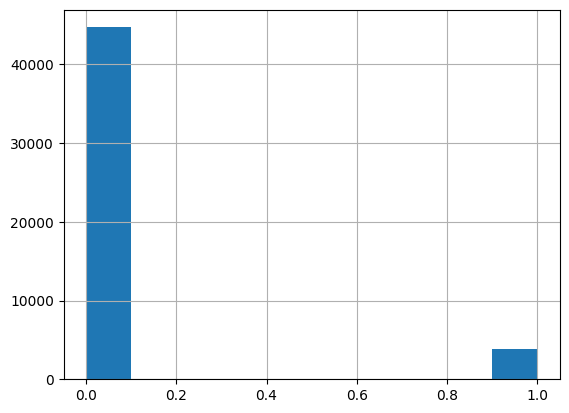

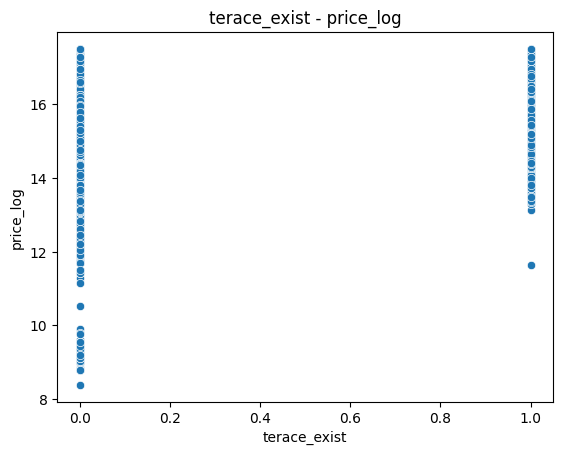

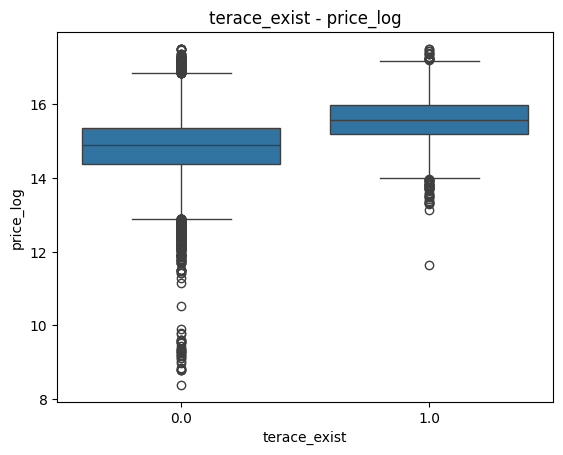

                   min_     perc_5    perc_25    perc_50       mean  \
terace_exist                                                          
0.0            8.389360  13.457406  14.375126  14.893853  14.837347   
1.0           11.626254  14.711599  15.189226  15.577608  15.599292   

                perc_75    perc_95       max_    _n_  
terace_exist                                          
0.0           15.363073  16.010427  17.501887  44696  
1.0           15.989125  16.642824  17.501887   3893  
-------------------------------------------

terace


C:\Users\gracj\AppData\Local\Temp\ipykernel_12000\132873727.py:2: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  tmp = data.groupby(agg_feat).agg(
C:\Users\gracj\AppData\Local\Temp\ipykernel_12000\132873727.py:2: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  tmp = data.groupby(agg_feat).agg(


count    48589.000000
mean         1.350532
std          8.012591
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        179.000000
Name: terace, dtype: float64

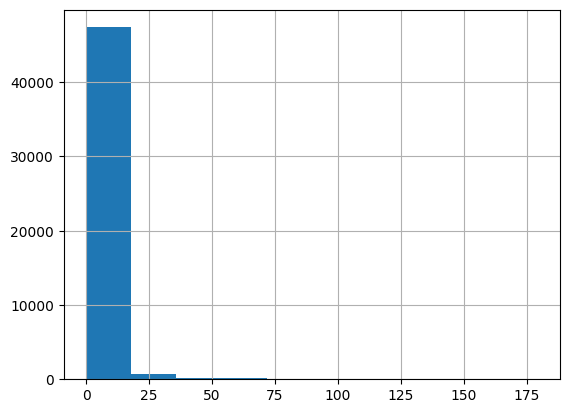

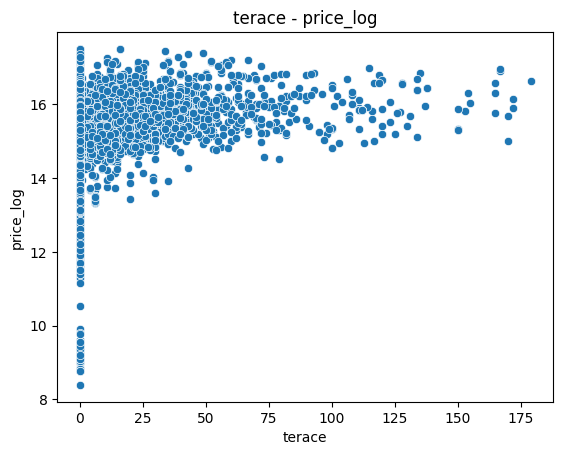

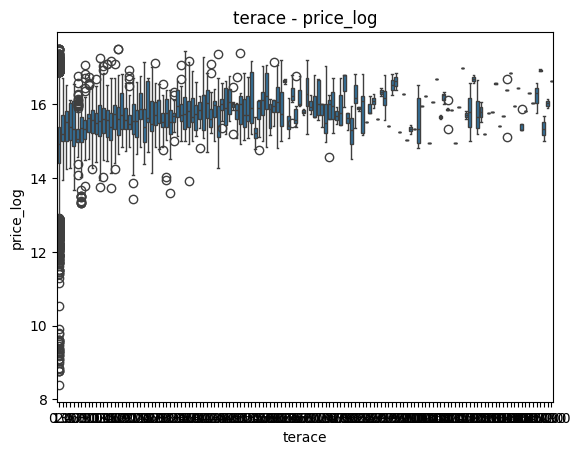

             min_     perc_5    perc_25    perc_50       mean    perc_75  \
terace                                                                     
0.0      8.389360  13.458693  14.397726  14.910784  14.854906  15.384126   
1.0     13.946539  14.767168  15.006398  15.199302  15.363226  15.717618   
2.0     14.244041  14.556308  15.009130  15.520259  15.422585  15.822359   
3.0     14.284889  14.321076  15.036340  15.394489  15.391216  16.044449   
4.0     13.689183  14.496727  14.862830  15.339391  15.345807  16.083386   
...           ...        ...        ...        ...        ...        ...   
165.0   15.759991  15.814025  16.030162  16.300334  16.215118  16.442681   
167.0   16.901997  16.904230  16.913160  16.924322  16.924322  16.935485   
170.0   15.003354  15.037096  15.172062  15.340770  15.340770  15.509478   
172.0   15.887298  15.900751  15.954562  16.021826  16.021826  16.089090   
179.0   16.642824  16.642824  16.642824  16.642824  16.642824  16.642824   

          p

C:\Users\gracj\AppData\Local\Temp\ipykernel_12000\132873727.py:2: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  tmp = data.groupby(agg_feat).agg(
C:\Users\gracj\AppData\Local\Temp\ipykernel_12000\132873727.py:2: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  tmp = data.groupby(agg_feat).agg(


count    48589.000000
mean         8.235527
std        154.971333
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       9060.000000
Name: area_built_up, dtype: float64

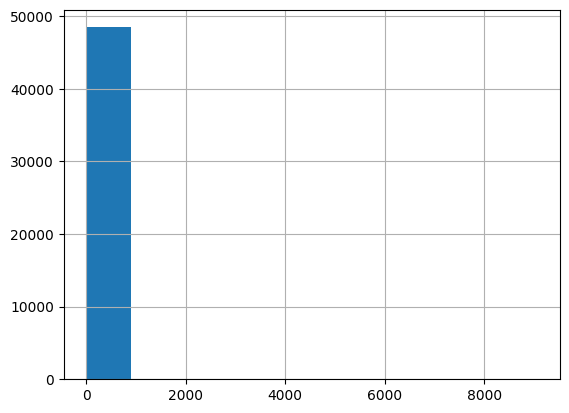

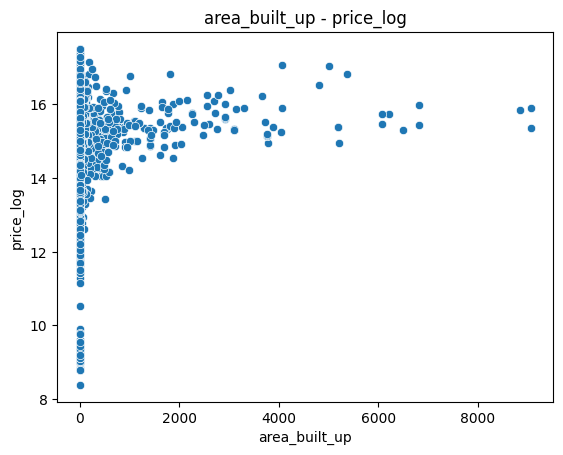

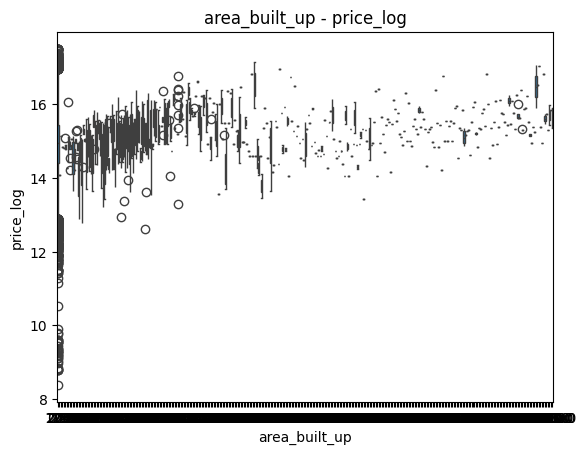

C:\Users\gracj\AppData\Local\Temp\ipykernel_12000\132873727.py:2: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  tmp = data.groupby(agg_feat).agg(


                    min_     perc_5    perc_25    perc_50       mean  \
area_built_up                                                          
0.0             8.389360  13.487006  14.408837  14.946590  14.893437   
17.0           14.070153  14.070153  14.070153  14.070153  14.070153   
20.0           15.123843  15.123843  15.123843  15.123843  15.123843   
21.0           14.845130  14.845130  14.845130  14.845130  14.845130   
23.0           14.805052  14.805052  14.805052  14.805052  14.805052   
...                  ...        ...        ...        ...        ...   
6223.0         15.744129  15.744129  15.744129  15.744129  15.744129   
6488.0         15.297115  15.297115  15.297115  15.297115  15.297115   
6815.0         15.422946  15.450712  15.561775  15.700603  15.700603   
8840.0         15.830414  15.830414  15.830414  15.830414  15.830414   
9060.0         15.363073  15.390288  15.499148  15.635224  15.635224   

                 perc_75    perc_95       max_    _n_  
area_bu

C:\Users\gracj\AppData\Local\Temp\ipykernel_12000\132873727.py:2: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  tmp = data.groupby(agg_feat).agg(


count    48589.000000
mean         3.157031
std         35.875294
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       1132.000000
Name: area_garden, dtype: float64

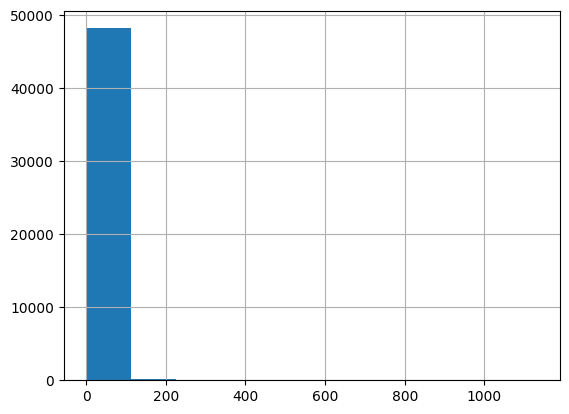

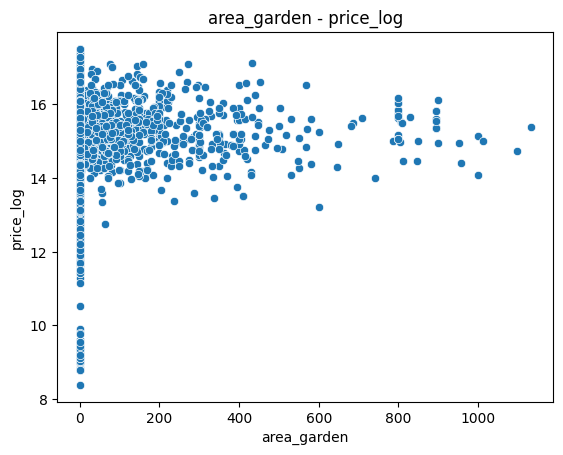

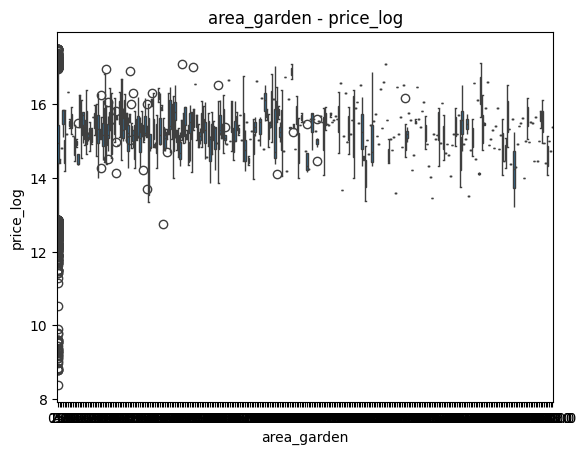

C:\Users\gracj\AppData\Local\Temp\ipykernel_12000\132873727.py:2: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  tmp = data.groupby(agg_feat).agg(
C:\Users\gracj\AppData\Local\Temp\ipykernel_12000\132873727.py:2: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  tmp = data.groupby(agg_feat).agg(


                  min_     perc_5    perc_25    perc_50       mean    perc_75  \
area_garden                                                                     
0.0           8.389360  13.487006  14.403297  14.943682  14.890738  15.422946   
1.0          14.394929  14.400490  14.422735  14.450542  14.450542  14.478348   
2.0          14.805052  14.805052  14.805052  14.805052  14.805052  14.805052   
3.0          15.096167  15.169591  15.463290  15.830414  15.585665  15.830414   
4.0          14.187074  14.232281  14.413110  14.629739  14.819241  15.035870   
...                ...        ...        ...        ...        ...        ...   
957.0        14.414347  14.414347  14.414347  14.414347  14.414347  14.414347   
1000.0       14.070153  14.122836  14.333569  14.596985  14.596985  14.860400   
1013.0       15.009433  15.009433  15.009433  15.009433  15.009433  15.009433   
1098.0       14.731801  14.731801  14.731801  14.731801  14.731801  14.731801   
1132.0       15.384126  15.3

count    48589.000000
mean         0.088250
std          0.283662
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: garage_exist, dtype: float64

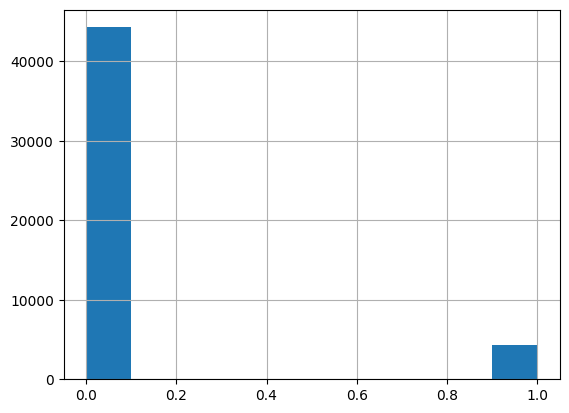

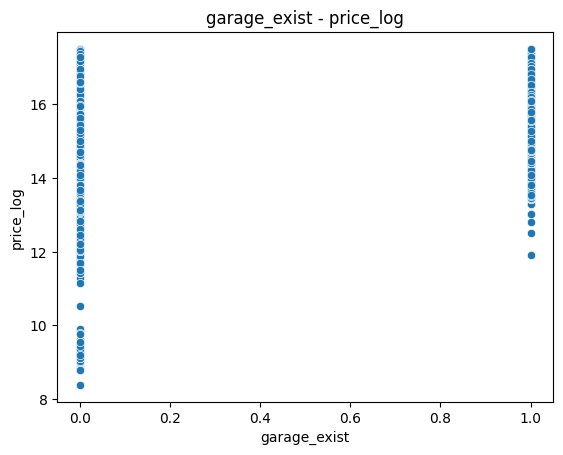

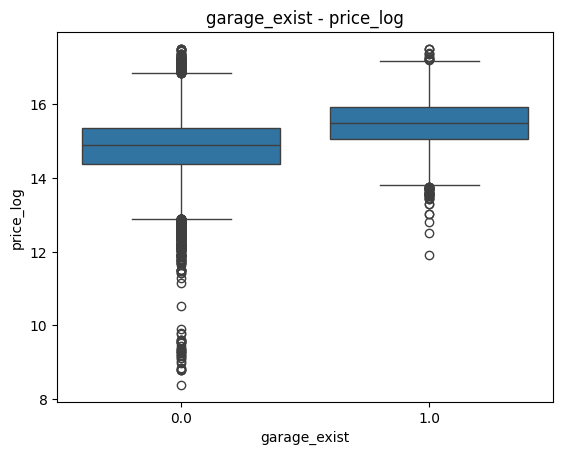

                   min_     perc_5    perc_25    perc_50       mean  \
garage_exist                                                          
0.0            8.389360  13.457406  14.375126  14.897316  14.841086   
1.0           11.918391  14.398702  15.063814  15.499928  15.490473   

                perc_75    perc_95       max_    _n_  
garage_exist                                          
0.0           15.365198  16.012735  17.501887  44301  
1.0           15.919523  16.533240  17.501887   4288  
-------------------------------------------

garage


C:\Users\gracj\AppData\Local\Temp\ipykernel_12000\132873727.py:2: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  tmp = data.groupby(agg_feat).agg(
C:\Users\gracj\AppData\Local\Temp\ipykernel_12000\132873727.py:2: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  tmp = data.groupby(agg_feat).agg(


count    48589.000000
mean         0.134804
std          1.428614
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        215.000000
Name: garage, dtype: float64

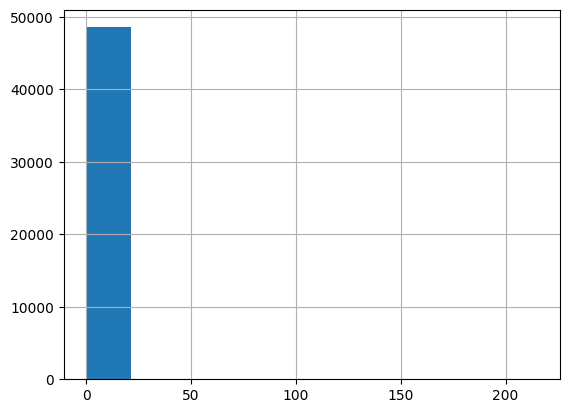

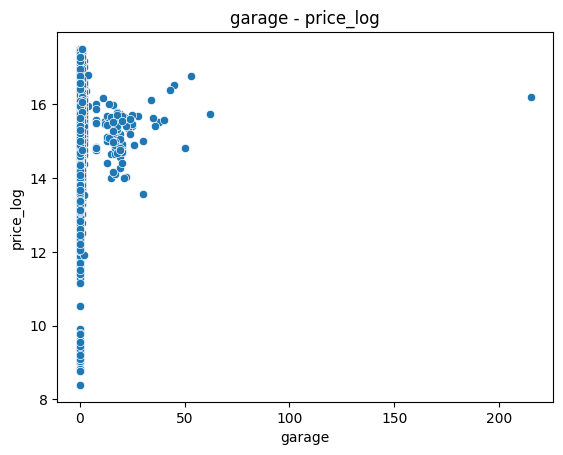

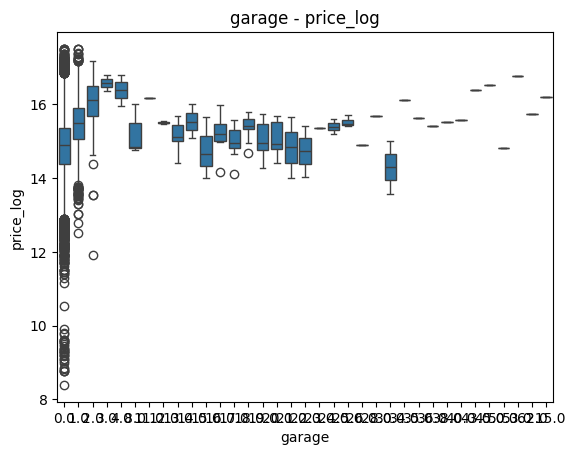

             min_     perc_5    perc_25    perc_50       mean    perc_75  \
garage                                                                     
0.0      8.389360  13.457406  14.375126  14.897316  14.841086  15.365198   
1.0     12.506177  14.403297  15.065207  15.488300  15.485077  15.900300   
2.0     11.918391  14.637895  15.690991  16.118046  15.970923  16.505612   
3.0     16.349207  16.371828  16.462310  16.575412  16.575412  16.688515   
4.0     15.966109  16.008115  16.176140  16.386170  16.386170  16.596200   
8.0     14.767168  14.767168  14.805052  14.841552  15.181456  15.481329   
11.0    16.166886  16.166886  16.166886  16.166886  16.166886  16.166886   
12.0    15.463207  15.466961  15.481975  15.500742  15.500742  15.519510   
13.0    14.397726  14.517014  14.994166  15.121137  15.129019  15.444751   
14.0    15.082176  15.125876  15.300672  15.519167  15.537989  15.765896   
15.0    13.989464  14.054924  14.316763  14.644062  14.763195  15.150061   
16.0    14.1

C:\Users\gracj\AppData\Local\Temp\ipykernel_12000\132873727.py:2: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  tmp = data.groupby(agg_feat).agg(
C:\Users\gracj\AppData\Local\Temp\ipykernel_12000\132873727.py:2: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  tmp = data.groupby(agg_feat).agg(


count         654
unique          3
top       Mezonet
freq          377
Name: flat_type, dtype: object

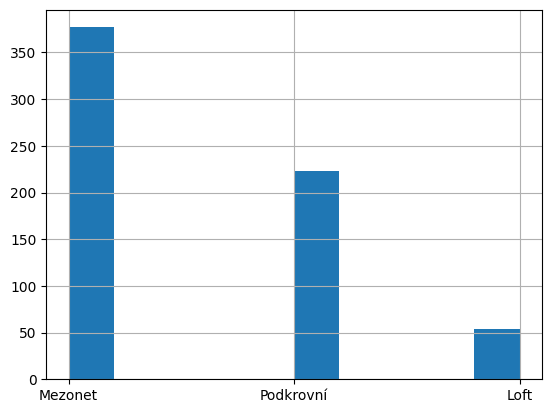

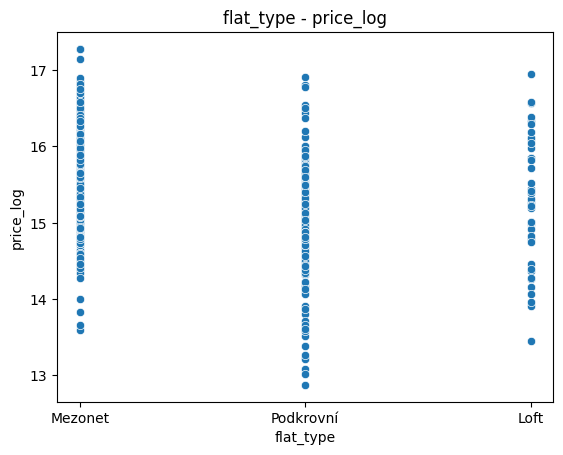

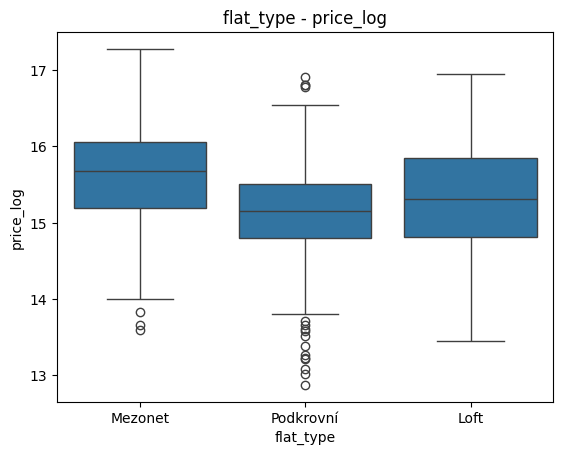

                min_     perc_5    perc_25    perc_50       mean    perc_75  \
flat_type                                                                     
Loft       13.444447  14.029945  14.810567  15.317363  15.336176  15.854130   
Mezonet    13.598846  14.596190  15.199302  15.675240  15.646240  16.056220   
Podkrovní  12.873902  13.714667  14.798376  15.150512  15.107743  15.507086   

             perc_95       max_  _n_  
flat_type                             
Loft       16.445616  16.951005   54  
Mezonet    16.733238  17.281246  377  
Podkrovní  16.107448  16.906553  223  
-------------------------------------------

latitude


C:\Users\gracj\AppData\Local\Temp\ipykernel_12000\132873727.py:2: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  tmp = data.groupby(agg_feat).agg(
C:\Users\gracj\AppData\Local\Temp\ipykernel_12000\132873727.py:2: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  tmp = data.groupby(agg_feat).agg(


count    48589.000000
mean        49.931756
std          0.452204
min         48.615063
25%         49.723526
50%         50.052627
75%         50.133717
max         51.002927
Name: latitude, dtype: float64

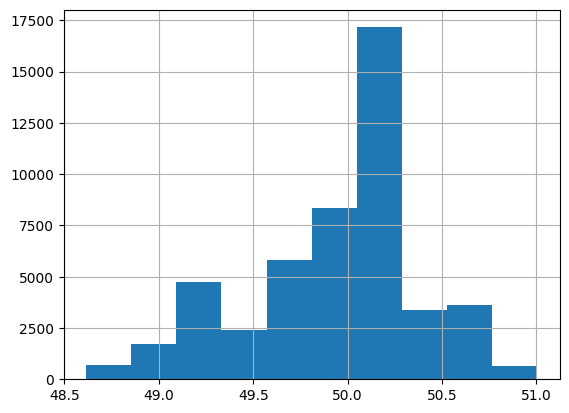

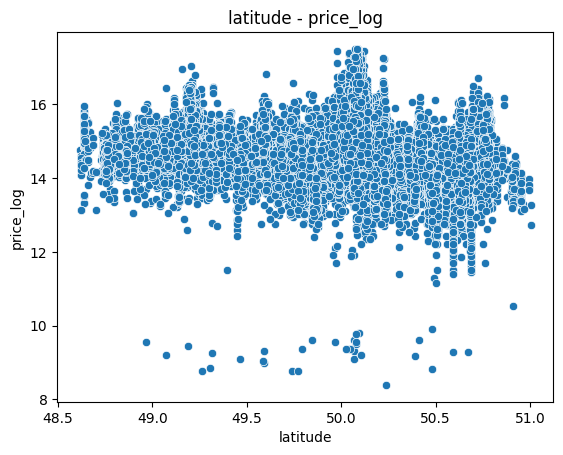

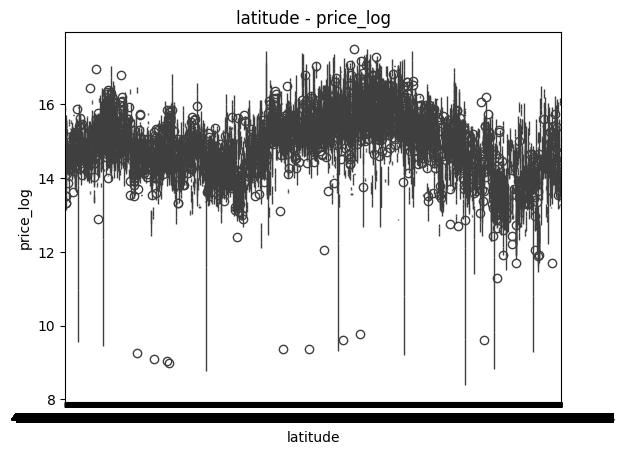

C:\Users\gracj\AppData\Local\Temp\ipykernel_12000\132873727.py:2: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  tmp = data.groupby(agg_feat).agg(


                min_     perc_5    perc_25    perc_50       mean    perc_75  \
latitude                                                                      
48.615063  14.751604  14.751604  14.751604  14.751604  14.751604  14.751604   
48.620189  14.070153  14.070153  14.142220  14.316286  14.287544  14.368983   
48.621283  13.127689  13.127689  13.127689  13.127689  13.127689  13.127689   
48.621842  14.502137  14.502137  14.502137  14.502137  14.502137  14.502137   
48.621920  14.599412  14.599412  14.599412  14.599412  14.599412  14.599412   
...              ...        ...        ...        ...        ...        ...   
50.995139  13.815511  13.815511  13.815511  13.815511  13.815511  13.815511   
50.995956  13.764217  13.764217  13.764217  13.764217  13.764217  13.764217   
50.996144  13.963931  13.963931  13.963931  13.963931  13.963931  13.963931   
51.002399  12.736701  12.736701  12.736701  12.736701  12.736701  12.736701   
51.002927  13.270783  13.270783  13.270783  13.27078

C:\Users\gracj\AppData\Local\Temp\ipykernel_12000\132873727.py:2: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  tmp = data.groupby(agg_feat).agg(


count    48589.000000
mean        15.174653
std          1.537865
min         12.175032
25%         14.340703
50%         14.494988
75%         16.484631
max         18.774694
Name: longitude, dtype: float64

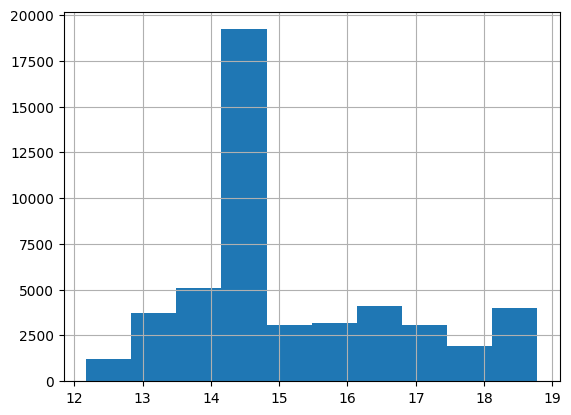

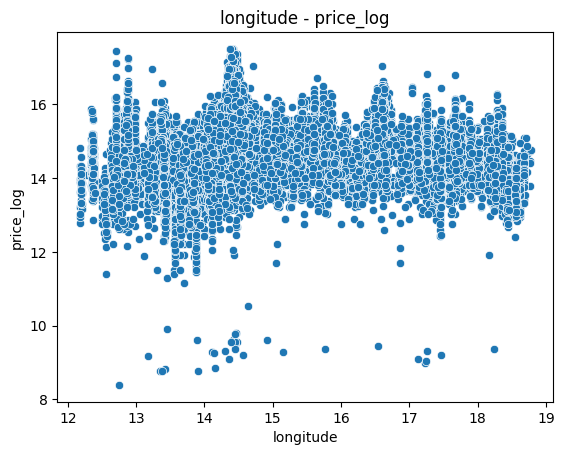

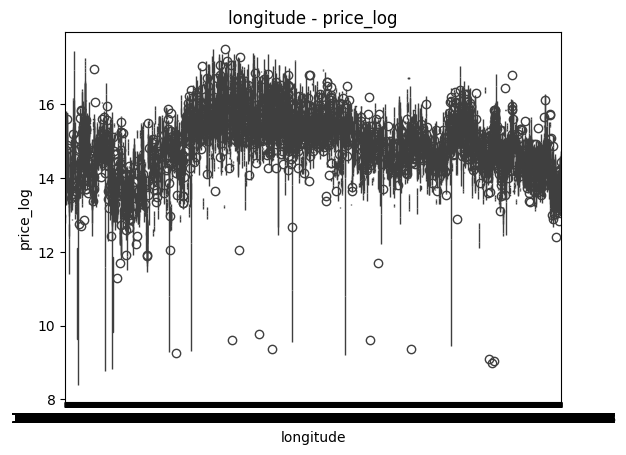

C:\Users\gracj\AppData\Local\Temp\ipykernel_12000\132873727.py:2: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  tmp = data.groupby(agg_feat).agg(


                min_     perc_5    perc_25    perc_50       mean    perc_75  \
longitude                                                                     
12.175032  13.887831  13.887831  13.887831  13.887831  13.887831  13.887831   
12.175795  13.213227  13.213227  13.213227  13.213227  13.213227  13.213227   
12.180959  13.963931  13.963931  13.963931  13.963931  13.963931  13.963931   
12.180963  14.322328  14.322328  14.322328  14.322328  14.322328  14.322328   
12.180972  12.793859  12.805016  12.849645  12.905431  12.905431  12.961217   
...              ...        ...        ...        ...        ...        ...   
18.720377  14.876767  14.876767  14.876767  14.876767  14.876767  14.876767   
18.759070  13.774689  13.822544  14.013967  14.253245  14.253245  14.492523   
18.765051  14.452087  14.452087  14.452087  14.452087  14.452087  14.452087   
18.766016  14.397726  14.397726  14.397726  14.397726  14.397726  14.397726   
18.774694  14.771022  14.771022  14.771022  14.77102

C:\Users\gracj\AppData\Local\Temp\ipykernel_12000\132873727.py:2: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  tmp = data.groupby(agg_feat).agg(


count    48589.000000
mean        14.898395
std          0.790767
min          8.389360
25%         14.430156
50%         14.946913
75%         15.422946
max         17.501887
Name: price_log, dtype: float64

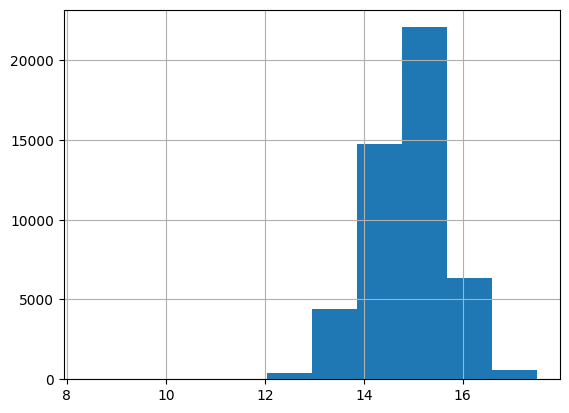

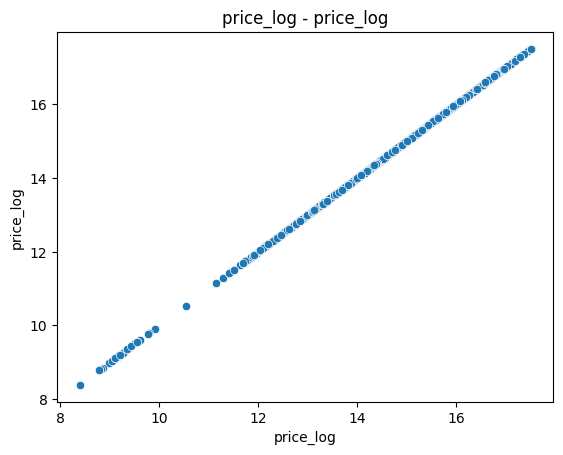

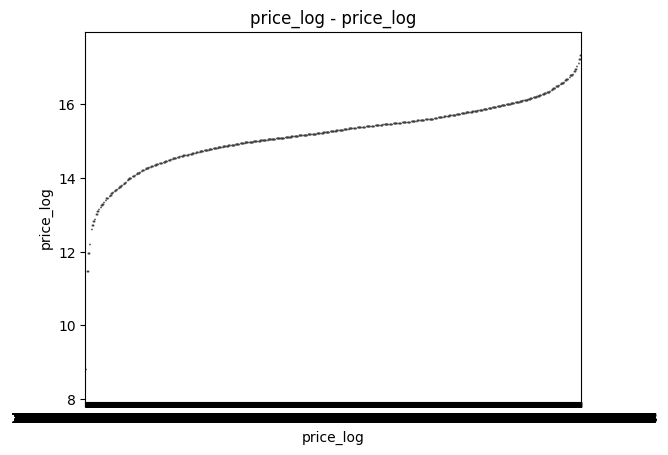

C:\Users\gracj\AppData\Local\Temp\ipykernel_12000\132873727.py:2: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  tmp = data.groupby(agg_feat).agg(


                min_     perc_5    perc_25    perc_50       mean    perc_75  \
price_log                                                                     
8.389360    8.389360   8.389360   8.389360   8.389360   8.389360   8.389360   
8.779557    8.779557   8.779557   8.779557   8.779557   8.779557   8.779557   
8.824678    8.824678   8.824678   8.824678   8.824678   8.824678   8.824678   
8.853665    8.853665   8.853665   8.853665   8.853665   8.853665   8.853665   
8.987197    8.987197   8.987197   8.987197   8.987197   8.987197   8.987197   
...              ...        ...        ...        ...        ...        ...   
17.442781  17.442781  17.442781  17.442781  17.442781  17.442781  17.442781   
17.450462  17.450462  17.450462  17.450462  17.450462  17.450462  17.450462   
17.479072  17.479072  17.479072  17.479072  17.479072  17.479072  17.479072   
17.500457  17.500457  17.500457  17.500457  17.500457  17.500457  17.500457   
17.501887  17.501887  17.501887  17.501887  17.50188

C:\Users\gracj\AppData\Local\Temp\ipykernel_12000\132873727.py:2: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  tmp = data.groupby(agg_feat).agg(


In [195]:
for col in df.columns:
    print()
    print(col)
    display(df[col].describe())
    df[col].hist()
    plt.figure()
    sns.scatterplot(x = col, y = 'price_log', data = df).set_title(f'{col} - price_log')
    plt.show()
    sns.boxplot(x = col, y = 'price_log', data = df).set_title(f'{col} - price_log')
    plt.show()
    print(agg_data_simple(df, col, 'price_log'))
    print('-------------------------------------------')

### Czyszczenie dla czyszczenia

In [196]:
# df=df[df['area'] < 1000] 
# df = df[df['price'] < 40000000.0] 
# df = df[df['floor'] < 25] 
# df = df[df['cellar'] < 100]  
# df = df[df['terace'] < 190] 
# df = df[df['area_garden'] < 1200] 

In [197]:
from sklearn.model_selection import train_test_split

In [198]:
y = df['price'] 
X = df.drop(columns=['price']).copy()

In [199]:
X.columns

Index(['county', 'disposition', 'structure', 'building_state', 'ownership',
       'floor', 'area', 'energy_performance', 'balcony_exist', 'balcony',
       'elevator', 'cellar_exist', 'cellar', 'furnished', 'barrier_free',
       'lodge_exist', 'lodge', 'terace_exist', 'terace', 'area_built_up',
       'area_garden', 'garage_exist', 'garage', 'flat_type', 'latitude',
       'longitude', 'price_log'],
      dtype='object')

In [200]:
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import (
#     StandardScaler,
#     OrdinalEncoder,
#     OneHotEncoder
# )
# from sklearn.impute import SimpleImputer

# num_pipeline = Pipeline([
#     ('imputer', SimpleImputer(strategy='median')),
#     ('scaler', StandardScaler())
# ])

# tx_pipeline = Pipeline([
#         ("ordinal_encoder", OrdinalEncoder()),    
#         ("imputer", SimpleImputer(strategy="most_frequent")),
#         ("tx_encoder", OneHotEncoder(sparse_output=False)),
#     ])

In [201]:
# from sklearn.compose import ColumnTransformer

# num_attribs = ['disposition', 'building_state',
#        'floor', 'area', 'energy_performance', 'balcony_exist', 'balcony',
#        'elevator', 'cellar_exist', 'cellar', 'furnished', 'barrier_free',
#        'lodge_exist', 'lodge', 'terace_exist', 'terace', 'area_built_up',
#        'area_garden', 'garage_exist', 'garage', 'latitude',
#        'longitude']

# tx_attribs = ['county', 'structure', 'ownership', 'flat_type']

# prepprocess_pipeline = ColumnTransformer([
#         ('num', num_pipeline, num_attribs),
#         ('tx', tx_pipeline, tx_attribs)
# ])

In [202]:
# X = prepprocess_pipeline.fit(X)

In [203]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape,y_train.shape, X_test.shape, y_test.shape

((38871, 27), (38871,), (9718, 27), (9718,))

In [204]:
X_train['okres'] = 'train'
X_test['okres'] = 'test'

df = pd.concat([X_train, X_test])
df['price'] = pd.concat([y_train, y_test])

In [205]:
def rand_var(data = None, prefix = 'rand_'):
    data_size = data.shape[0]
    data[prefix + 'binary']  = np.random.randint(0, 2, data_size)
    data[prefix + 'cat']     = np.random.randint(0, 5, data_size)
    data[prefix + 'uniform'] = np.random.uniform(0, 1, data_size)
    data[prefix + 'normal']  = np.random.normal(0, 1, data_size)
    return(data)

In [206]:
df = rand_var(df)

In [207]:
df.head(20)

county  disposition  structure  building_state  \
4769                     Praha 9            4   Panelová               8   
1413                     Praha 7            3    Cihlová               8   
16255                    Teplice            3   Panelová               8   
13997                      Praha            4   Panelová               6   
26259              okres Liberec            4    Cihlová               4   
46795             Mladá Boleslav            4    Cihlová               8   
44037                      Praha            4   Panelová               7   
227             České Budějovice            3    Cihlová               6   
30884                    Praha 3            3    Cihlová               9   
35311                    Teplice            7    Smíšená               6   
21371                      Kolín            4   Panelová               5   
5134                    Chomutov            2   Panelová               8   
29090                   Vrchlabí            3  Skeletová               9   
43333                      Plzeň            3    Cihlová               8   
23402                       Brno            3    Cihlová               6   
23772                   Praha 10            4    Cihlová               6   
8638                     Příbram            2   Panelová               8   
2953                     Olomouc            4   Panelová               8   
1177            okres Prachatice            3    Cihlová               9   
7909   okres Rychnov nad Kněžnou            3    Cihlová               4   

        ownership  floor  area  energy_performance  balcony_exist  balcony  \
4769       Osobní      1    61                   4            0.0      0.0   
1413       Osobní      7    49                   7            0.0      0.0   
16255  Družstevní      5    39                   1            0.0      0.0   
13997  Družstevní      3    72                   8            0.0      0.0   
26259      Osobní      5    85                   2            1.0      9.0   
46795      Osobní      4    95                   3            1.0      1.0   
44037      Osobní      5    53                   7            0.0      0.0   
227        Osobní      2    65                   7            0.0      0.0   
30884      Osobní      7    57                   1            0.0      0.0   
35311      Osobní      1   163                   7            0.0      0.0   
21371      Osobní      2    78                   7            0.0      0.0   
5134   Družstevní      5    36                   1            0.0      0.0   
29090      Osobní      4    51                   3            1.0      0.0   
43333      Osobní      5    50                   3            0.0      0.0   
23402      Osobní      4    53                   2            0.0      0.0   
23772      Osobní      1    77                   5            0.0      0.0   
8638       Osobní      5    53                   4            0.0      0.0   
2953       Osobní      5    62                   7            1.0      0.0   
1177       Osobní      2    46                   3            0.0      0.0   
7909       Osobní      1    55                   8            0.0      0.0   

       elevator  cellar_exist  cellar  furnished  barrier_free  lodge_exist  \
4769        1.0           0.0     0.0        0.0           0.0          1.0   
1413        1.0           0.0     0.0        0.5           0.0          0.0   
16255       1.0           1.0     2.0        0.5           0.0          0.0   
13997       1.0           1.0     0.0        0.0           0.0          1.0   
26259       1.0           1.0     0.0        0.0           0.0          0.0   
46795       0.0           1.0     6.0        0.5           0.0          0.0   
44037       0.0           0.0     0.0        0.0           0.0          0.0   
227         0.0           1.0    11.0        0.0           0.0          0.0   
30884       1.0           0.0     0.0        0.5           0.0          0.0   


In [208]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from tqdm import tqdm

In [209]:
def RF_importance(data, features, YCOL, iteration = 3, sample = 0.1):
    importances_all = np.array([0.00]*len(features))
    imporances_all_plot = pd.DataFrame()

    for i in tqdm(range(iteration)):
 
        df_sample = data.sample(np.ceil(data.shape[0] * sample).astype(int))
        X_train = df_sample[df_sample['okres'] == "train"][features]
        y_train = df_sample[df_sample['okres'] == "train"][YCOL]
 
        X_test = df_sample[df_sample['okres'] != "train"][features]
        y_test = df_sample[df_sample['okres'] != "train"][YCOL]
        
        ### model change params every iteration
        RF_params = {"max_depth": 4 + i, "n_estimators": 100 + (25 * i), "random_state": i}
        model = RandomForestClassifier(**RF_params)
        
        if y_train.nunique() > REGRESSION_TRESH:
            model = RandomForestRegressor(**RF_params)
            
        model_name = model.__class__.__name__
        model.fit(X_train, y_train)
        ### importance
        importances = model.feature_importances_
        importances_all += importances
        ###importance for plot
        iteration_importance = pd.DataFrame({"Feat": X_train[features].columns,f"Importance_{model_name}": importances} )
        imporances_all_plot = pd.concat([imporances_all_plot, iteration_importance ])
 
    importance = pd.DataFrame({"Feat": X_train.columns,
                                 f"Importance_{model_name}":importances_all/iteration}).sort_values(f"Importance_{model_name}", ascending= False).reset_index(drop = True)
    importance = importance.reset_index().rename(columns = {"index":f"rank_Importance_{model_name}"})
    
    plt.figure(figsize = (10, len(features)/4))
    sns.boxplot(x = f"Importance_{model_name}", y = 'Feat', data = imporances_all_plot, order = importance['Feat'])
    plt.title(f"{model_name} importance")
    plt.show()
    
    return importance

In [210]:
df.columns

Index(['county', 'disposition', 'structure', 'building_state', 'ownership',
       'floor', 'area', 'energy_performance', 'balcony_exist', 'balcony',
       'elevator', 'cellar_exist', 'cellar', 'furnished', 'barrier_free',
       'lodge_exist', 'lodge', 'terace_exist', 'terace', 'area_built_up',
       'area_garden', 'garage_exist', 'garage', 'flat_type', 'latitude',
       'longitude', 'price_log', 'okres', 'price', 'rand_binary', 'rand_cat',
       'rand_uniform', 'rand_normal'],
      dtype='object')

100%|██████████| 3/3 [00:25<00:00,  8.60s/it]


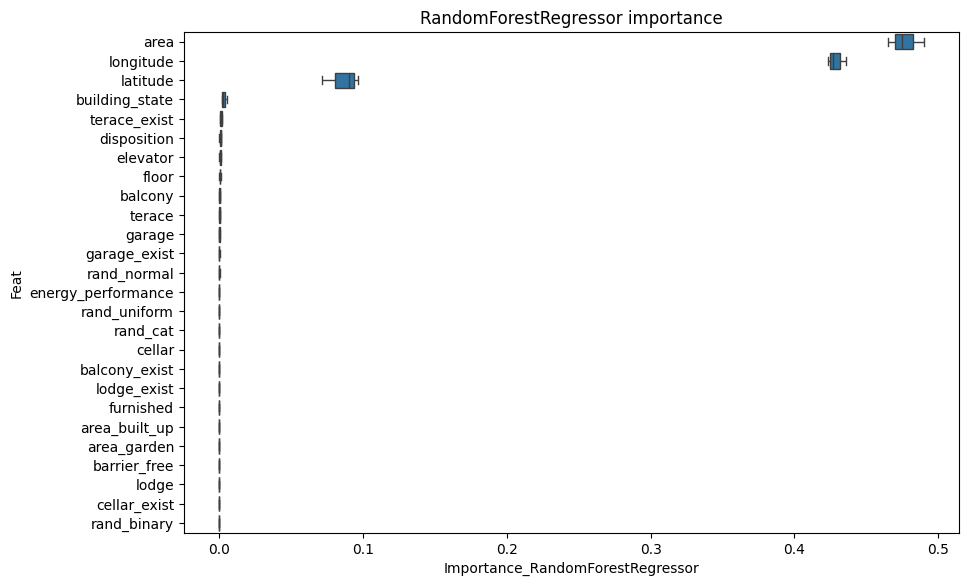

In [211]:
CATEGORICAL_TRESH = 10
REGRESSION_TRESH = 5
YCOL = 'price'
features = ['disposition', 'building_state',
       'floor', 'area', 'energy_performance', 'balcony_exist', 'balcony',
       'elevator', 'cellar_exist', 'cellar', 'furnished', 'barrier_free',
       'lodge_exist', 'lodge', 'terace_exist', 'terace', 'area_built_up',
       'area_garden', 'garage_exist', 'garage', 'latitude','rand_binary', 'rand_cat',
       'rand_uniform', 'rand_normal','longitude']
importance_RF = RF_importance(df, features, YCOL, sample = 0.8)

In [212]:
# CATEGORICAL_TRESH = 10
# REGRESSION_TRESH = 5
# YCOL = 'log_price'
# features = ['disposition', 'building_state',
#        'floor', 'area', 'energy_performance', 'balcony_exist', 'balcony',
#        'elevator', 'cellar_exist', 'cellar', 'furnished', 'barrier_free',
#        'lodge_exist', 'lodge', 'terace_exist', 'terace', 'area_built_up',
#        'area_garden', 'garage_exist', 'garage', 'latitude','rand_binary', 'rand_cat',
#        'rand_uniform', 'rand_normal','longitude']
# importance_RF = RF_importance(df, features, YCOL, sample = 0.8)